In [424]:
import pandas as pd
import numpy as np
import os
os.getcwd()

'/Users/praveen/MSDS/MachineLearning/KaggleChallenges/Challenge2/Data'

In [425]:
train = pd.read_csv("./train_data_new.csv")
test = pd.read_csv("./test_data_new.csv")

/var/folders/h5/yfvk0l4921v0kg94n8qt42wc0000gn/T/ipykernel_59575/2922911961.py:1: DtypeWarning: Columns (31,38,40) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv("./train_data_new.csv")


In [426]:
train = pd.read_csv("./train_data_new.csv")
test = pd.read_csv("./test_data_new.csv")
cat_vars = ['general_sector', 'city', 'zip_code', 'specific_sector', 'state',
       'contributor_type']
train_num_vars = ['winner_ratio', 'candidacy_count',
       'candidacy_democratic_count', 'candidacy_republican_count',
       'contribution_count', 'contribution_democratic_count',
       'contribution_republican_count', 'politician_challenger_count',
       'politician_count', 'politician_democratic_count',
       'politician_incumbency_count', 'politician_open_pos_count',
       'politician_republican_count', 'contribution_democratic_sum_2010_usd',
       'contribution_republican_sum_2010_usd', 'contribution_sum_2010_usd',
       'governor_contributions_sum_2010_usd',
       'house_and_assembly_contributions_sum_2010_usd',
       'senate_contributions_sum_2010_usd',
       'us_house_contributions_sum_2010_usd',
       'us_senate_contributions_sum_2010_usd', 'candidacy_democratic_ratio',
       'candidacy_republican_ratio', 'contribution_democratic_count_ratio',
       'contribution_republican_count_ratio', 'governor_contribution_ratio',
       'house_and_assembly_contribution_ratio', 'politician_challenger_ratio',
       'politician_democratic_ratio', 'politician_incumbency_ratio',
       'politician_open_pos_ratio', 'politician_republican_ratio',
       'senate_contribution_ratio', 'us_house_contribution_ratio',
       'us_senate_contribution_ratio', 'contrib_state_deg',
       'contrib_state_wdeg', 'contrib_state_pr', 'contrib_state_comm',
       'contrib_fed_deg', 'contrib_fed_wdeg', 'contrib_fed_pr',
       'contrib_fed_comm', 'state_all_deg', 'state_all_wdeg', 'state_all_pr',
       'state_all_comm', 'state_win_deg', 'state_win_wdeg', 'state_win_pr',
       'state_win_comm']
test_num_vars = [col for col in train_num_vars if col != "winner_ratio"]



/var/folders/h5/yfvk0l4921v0kg94n8qt42wc0000gn/T/ipykernel_59575/1325753709.py:1: DtypeWarning: Columns (31,38,40) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv("./train_data_new.csv")


# Missing Values analysis:

In [427]:
# fake_missing_values = ['0', '0.0', 'Uncoded', 'None', '']
# for col in cat_vars:
#     col_values = train[col].astype(str)
#     value_counts = col_values[col_values.isin(fake_missing_values)].value_counts()

#     if not value_counts.empty:
#         print(f"\nColumn '{col}':")
#         print(value_counts.rename("count").to_frame())
#         print(f"→ Replacing total {value_counts.sum()} entries with 'Other_{col}'")
        
#         train.loc[col_values.isin(fake_missing_values), col] = f"Other_{col}"
#     else:
#         print(f"\nColumn '{col}': No fake-missing values found.")


In [428]:
fake_missing_values = ['0', '0.0', 'None', '']

# To keep track of all rows with fake-missing values
rows_to_drop = set()

for col in cat_vars:
    col_values = train[col].astype(str)
    mask = col_values.isin(fake_missing_values)
    value_counts = col_values[mask].value_counts()

    if not value_counts.empty:
        print(f"\nColumn '{col}':")
        print(value_counts.rename("count").to_frame())
        print(f"→ Found {mask.sum()} rows with fake-missing values — marking for drop")
        
        # Add row indices to the drop set
        rows_to_drop.update(train[mask].index)
    else:
        print(f"\nColumn '{col}': No fake-missing values found.")

# Drop all affected rows once
print(f"\n🚨 Dropping total {len(rows_to_drop)} rows from train DataFrame.")
train.drop(index=rows_to_drop, inplace=True)
train.reset_index(drop=True, inplace=True)  # Optional: clean index after drop



Column 'general_sector': No fake-missing values found.

Column 'city':
      count
city       
0      1468
→ Found 1468 rows with fake-missing values — marking for drop

Column 'zip_code':
          count
zip_code       
0.0        4431
→ Found 4431 rows with fake-missing values — marking for drop

Column 'specific_sector': No fake-missing values found.

Column 'state': No fake-missing values found.

Column 'contributor_type': No fake-missing values found.

🚨 Dropping total 4447 rows from train DataFrame.


In [429]:
### Check fake missing values for test data

fake_missing_values = ['0', '0.0', 'None', '']

# To keep track of all rows with fake-missing values
rows_to_drop = set()

for col in cat_vars:
    col_values = test[col].astype(str)
    mask = col_values.isin(fake_missing_values)
    value_counts = col_values[mask].value_counts()

    if not value_counts.empty:
        print(f"\nColumn '{col}':")
        print(value_counts.rename("count").to_frame())
        print(f"→ Found {mask.sum()} rows with fake-missing values — marking for drop")
        
        # Add row indices to the drop set
        rows_to_drop.update(test[mask].index)
    else:
        print(f"\nColumn '{col}': No fake-missing values found.")

# Drop all affected rows once
print(f"\n🚨 Dropping total {len(rows_to_drop)} rows from train DataFrame.")
test.drop(index=rows_to_drop, inplace=True)
test.reset_index(drop=True, inplace=True)  # Optional: clean index after drop



Column 'general_sector': No fake-missing values found.

Column 'city':
      count
city       
0       952
→ Found 952 rows with fake-missing values — marking for drop

Column 'zip_code':
          count
zip_code       
0.0        2895
→ Found 2895 rows with fake-missing values — marking for drop

Column 'specific_sector': No fake-missing values found.

Column 'state': No fake-missing values found.

Column 'contributor_type': No fake-missing values found.

🚨 Dropping total 2910 rows from train DataFrame.


In [430]:
print(train.shape, test.shape)

(168401, 57) (112322, 58)


In [431]:
cols = ["governor_contribution_ratio",  "governor_contributions_sum_2010_usd",   "contribution_sum_2010_usd",
        "house_and_assembly_contribution_ratio","house_and_assembly_contributions_sum_2010_usd","contribution_sum_2010_usd",
        "senate_contribution_ratio",    "senate_contributions_sum_2010_usd", "contribution_sum_2010_usd",
        "us_house_contribution_ratio",  "us_house_contributions_sum_2010_usd",    "contribution_sum_2010_usd",
        "us_senate_contribution_ratio", "us_senate_contributions_sum_2010_usd",   "contribution_sum_2010_usd"
        ]
train[cols].iloc[1435:1438]


,governor_contribution_ratio,governor_contributions_sum_2010_usd,contribution_sum_2010_usd,house_and_assembly_contribution_ratio,house_and_assembly_contributions_sum_2010_usd,contribution_sum_2010_usd,senate_contribution_ratio,senate_contributions_sum_2010_usd,contribution_sum_2010_usd,us_house_contribution_ratio,us_house_contributions_sum_2010_usd,contribution_sum_2010_usd,us_senate_contribution_ratio,us_senate_contributions_sum_2010_usd,contribution_sum_2010_usd
1435,0.139877,2284.93,16335.31,0.215339,3517.63,16335.31,0.644784,10532.75,16335.31,0.0,0.0,16335.31,0.0,0.00,16335.31
1436,0.0,0.00,8065.60,0.000000,0.00,8065.60,0.0,0.00,8065.60,1.0,8065.6,8065.60,0.0,0.00,8065.60
1437,0.0,0.00,1497.66,0.000000,0.00,1497.66,0.0,0.00,1497.66,0.0,0.0,1497.66,1.0,1497.66,1497.66


In [432]:
train[train_num_vars] = train[train_num_vars].apply(pd.to_numeric, errors='coerce')
test[test_num_vars] = test[test_num_vars].apply(pd.to_numeric, errors='coerce')

In [433]:

# cols_with_negatives = ['contribution_democratic_sum_2010_usd','contribution_republican_sum_2010_usd','contribution_sum_2010_usd',
# 'governor_contributions_sum_2010_usd',
# 'house_and_assembly_contributions_sum_2010_usd','senate_contributions_sum_2010_usd','us_house_contributions_sum_2010_usd',
# 'us_senate_contributions_sum_2010_usd','governor_contribution_ratio','house_and_assembly_contribution_ratio','senate_contribution_ratio',
# 'us_house_contribution_ratio','us_senate_contribution_ratio']

# ### Treat these descrepent columns
# for col in cols_with_negatives:
#     train[col] = train[col].clip(lower=0)
#     test[col] = test[col].clip(lower=0)

In [434]:
# Drop states with count less than 5
state_counts = train['state'].value_counts()

# Filter to keep only states with at least 5 records
train = train[train['state'].isin(state_counts[state_counts >= 10].index)]


In [435]:
# 1. Check how many duplicate rows exist
num_duplicates_train = train.duplicated().sum()
num_duplicates_test = train.duplicated().sum()

print(f"🔍 Number of duplicate rows in train: {num_duplicates_train}")
print(f"🔍 Number of duplicate rows in test: {num_duplicates_test}")

# 2. Drop duplicate records
train = train.drop_duplicates()
test = test.drop_duplicates()

print(f"✅ Duplicates removed for train. New shape: {train.shape}")
print(f"✅ Duplicates removed for test. New shape: {test.shape}")

🔍 Number of duplicate rows in train: 2172
🔍 Number of duplicate rows in test: 2172
✅ Duplicates removed for train. New shape: (166203, 57)
✅ Duplicates removed for test. New shape: (112322, 58)


# Check association between categorical variables and target variable

In [436]:
from scipy.stats import ttest_ind, f_oneway
import pandas as pd

# Ensure winner_ratio is numeric
train["winner_ratio"] = pd.to_numeric(train["winner_ratio"], errors="coerce")

results = []

for col in cat_vars:
    unique_vals = train[col].nunique()
    
    if unique_vals < 2:
        print(f"⚠️ Skipping '{col}' — only one category")
        continue

    print(f"\n📊 Analyzing '{col}' with {unique_vals} categories:")

    # Drop rows with missing or bad values in current column
    df = train[[col, "winner_ratio"]].dropna()
    
    # Binary case: t-test
    if unique_vals == 2:
        groups = list(df[col].unique())
        g1 = df[df[col] == groups[0]]["winner_ratio"]
        g2 = df[df[col] == groups[1]]["winner_ratio"]
        stat, pval = ttest_ind(g1, g2, equal_var=False)
        test_type = "t-test"
    else:
        # Multi-category case: ANOVA
        group_list = [group["winner_ratio"].values for _, group in df.groupby(col)]
        stat, pval = f_oneway(*group_list)
        test_type = "ANOVA"

    print(f"🧪 {test_type} → F/t-stat = {stat:.4f}, p-value = {pval:.4e}")
    results.append({"column": col, "test": test_type, "stat": stat, "p_value": pval})

# Convert to DataFrame for sorting or exporting
test_results = pd.DataFrame(results).sort_values("p_value")

print("\n✅ Summary of most statistically associated categorical variables:")
print(test_results.head(10))



📊 Analyzing 'general_sector' with 135 categories:
🧪 ANOVA → F/t-stat = 19.0330, p-value = 0.0000e+00

📊 Analyzing 'city' with 8778 categories:
🧪 ANOVA → F/t-stat = 1.6992, p-value = 6.5575e-301

📊 Analyzing 'zip_code' with 15454 categories:
🧪 ANOVA → F/t-stat = 1.5328, p-value = 1.2756e-314

📊 Analyzing 'specific_sector' with 408 categories:
🧪 ANOVA → F/t-stat = 8.4620, p-value = 0.0000e+00

📊 Analyzing 'state' with 35 categories:
🧪 ANOVA → F/t-stat = 107.5214, p-value = 0.0000e+00

📊 Analyzing 'contributor_type' with 3 categories:
🧪 ANOVA → F/t-stat = 1056.4242, p-value = 0.0000e+00

✅ Summary of most statistically associated categorical variables:
             column   test         stat        p_value
0    general_sector  ANOVA    19.032950   0.000000e+00
3   specific_sector  ANOVA     8.461971   0.000000e+00
4             state  ANOVA   107.521373   0.000000e+00
5  contributor_type  ANOVA  1056.424172   0.000000e+00
2          zip_code  ANOVA     1.532842  1.275586e-314
1          

### Dropping zip_code and city columns, since they're found to be least significant and with high cardinallity

In [437]:
train.drop(["city", "zip_code"], axis=1, inplace= True)
test.drop(["city", "zip_code"], axis=1, inplace= True)

for col in ["city", "zip_code","specific_sector","general_sector"]:
    if col in cat_vars:
        cat_vars.remove(col)

In [438]:
train.general_sector.value_counts().to_clipboard()

## Bucketize different general sector categories into bigger category

In [439]:

# 1) define umbrella buckets and list the exact sectors that go into each
umbrella_map = {
    "Unknown / Uncoded": [
        "Uncoded",
        "No Employer Listed or Found",
        "Employer Listed/Category Unknown",
        "Generic Occupation/Category Unknown",
        "Other",
        "Other/Single Issue Groups",
        "Non-Contribution",
        "Unitemized Contributions",
        "Balance Forward",
    ],
    "Retired / Homemakers": [
        "Retired",
        "Homemakers/Non-income earners",
    ],
    "Legal & Lobbying": [
        "Lawyers & Lobbyists",
        "Accountants",
    ],
    "Public Sector & Campaigns": [
        "Civil Servants/Public Officials",
        "Candidate Contributions",
        "Candidate Committees",
        "Joint Candidate Committee",
        "Party Committees",
        "Leadership PACs",
        "Public Sector Unions",
        "Transportation Unions",
    ],
    "Health & Pharma": [
        "Health Professionals",
        "Health Services",
        "Hospitals & Nursing Homes",
        "Pharmaceuticals & Health Products",
        "Health & Welfare Policy",
        "Miscellaneous Health",
    ],
    "Education & Nonprofit": [
        "Education",
        "Nonprofit Institutions",
        "Public Education Policy",
    ],
    "Finance & Real Estate": [
        "Commercial Banks",
        "Credit Unions",
        "Insurance",
        "Savings & Loans",
        "Securities & Investment",
        "Miscellaneous Finance",
        "Finance & Credit Companies",
        "Banks & Lending Institutions",
        "Real Estate",
        "Miscellaneous Finance, Insurance & Real Estate",
    ],
    "Construction & Manufacturing": [
        "Construction Services",
        "General Contractors",
        "Home Builders",
        "Building Materials & Equipment",
        "Miscellaneous Manufacturing & Distributing",
        "Chemical & Related Manufacturing",
        "Electronics Manufacturing & Services",
        "Miscellaneous Business",
    ],
    "Energy & Resources": [
        "Oil & Gas",
        "Electric Utilities",
        "Water Utilities",
        "Nuclear Energy",
        "Mining",
        "Aluminum Mining & Processing",
        "Smelting & Refining",
        "Miscellaneous Energy",
        "Waste Management",
        "Agricultural Services & Products",
        "Crop Production & Basic Processing",
        "Livestock",
        "Dairy",
        "Poultry & Eggs",
    ],
    "Technology & Telecom": [
        "Computer Equipment & Services",
        "Telecom Services & Equipment",
        "Cable TV",
        "Miscellaneous Communications & Electronics",
    ],
    "Retail, Food & Hospitality": [
        "Retail Sales",
        "Food & Beverage",
        "Beer, Wine & Liquor",
        "Food Processing & Sales",
        "Lodging & Tourism",
        "Recreation & Live Entertainment",
        "Movie Theaters",
    ],
    "Transport & Logistics": [
        "Air Transport",
        "Sea Transport",
        "Railroads",
        "Trucking",
        "Miscellaneous Transport",
        "Commercial Fishing",
    ],
    "Entertainment & Media": [
        "TV & Movie Production/Distribution",
        "Recorded Music Production",
        "Live Theater/Other Entertainment Productions",
        "Bands, Orchestras & Other Live Music Production",
        "Gambling & Casinos",
    ],
    "Labor & Trade": [
        "Special Trade Contractors",
        "General Trade Unions",
        "Public Sector Unions",
        "Transportation Unions",
        "Miscellaneous Services",
    ],
    "Policy & Single‑Issue": [
        "Pro-Environmental Policy",
        "Liberal Policy Organization",
        "Conservative Policy Organization",
        "Foreign & Defense Policy",
        "Gun Control",
        "Abortion Policy",
        "Drug Policy",
        "Tax Issues",
        "Animal Rights",
        "Gay/Lesbian Rights & Issues",
        "Women's Issues",
        "Human Rights",
        "Right to Die",
        "Welfare/Social Work",
        "Elderly/Social Security",
        "Tribal Governments",
    ],
    "Defense & Military": [
        "Military",
        "Defense Aerospace",
        "Defense Electronics",
        "Miscellaneous Defense",
    ],
}

# 2) invert that dict so we can map each raw label to its umbrella
flat_map = { raw: umbrella
             for umbrella, raws in umbrella_map.items()
             for raw in raws }

# 3) assign; any label not in our map goes into “Other / Misc”
train["general_sector_new"] = train["general_sector"].map(flat_map).fillna("Other / Misc")
test["general_sector_new"] = test["general_sector"].map(flat_map).fillna("Other / Misc")

train.drop(["general_sector"], axis=1, inplace=True)
test.drop(["general_sector"], axis=1, inplace=True)

# 4) see how many per umbrella
print(train["general_sector_new"].value_counts())


general_sector_new
Unknown / Uncoded               48747
Legal & Lobbying                30269
Retired / Homemakers            23453
Finance & Real Estate           15270
Health & Pharma                 10766
Public Sector & Campaigns        7305
Construction & Manufacturing     5374
Education & Nonprofit            5124
Other / Misc                     4266
Energy & Resources               3988
Retail, Food & Hospitality       3498
Labor & Trade                    2772
Technology & Telecom             1927
Transport & Logistics            1412
Policy & Single‑Issue             772
Entertainment & Media             665
Defense & Military                595
Name: count, dtype: int64


In [440]:
cat_vars.append('general_sector_new')

In [441]:
train.specific_sector.value_counts().to_clipboard()

## Drop specific sector column, since we already have bigger sector categories

In [442]:

train.drop(["specific_sector"], axis=1, inplace=True)
test.drop(["specific_sector"], axis=1, inplace=True)

## Drop redundant columns:
##### Since we're already capturing essential information in ratio columns, so dropping base columns

#### Candidacy Ratios-
- candidacy_democratic_ratio = candidacy_democratic_count / candidacy_count
- candidacy_republican_ratio = candidacy_republican_count / candidacy_count

#### Politician Ratios- 
- politician_democratic_ratio = politician_democratic_count / politician_count
- politician_republican_ratio = politician_republican_count / politician_count
- politician_challenger_ratio = politician_challenger_count / politician_count
- politician_open_pos_ratio = politician_open_pos_count / politician_count
- politician_incumbency_ratio = politician_incumbency_count / politician_count

#### Contribution Count Ratios-
- contribution_democratic_count_ratio = contribution_democratic_count / contribution_count
- contribution_republican_count_ratio = contribution_republican_count / contribution_count

#### Contribution Sum Ratios (Money) -
- house_and_assembly_contribution_ratio = house_and_assembly_contributions_sum_2010_usd / contribution_sum_2010_usd
- senate_contribution_ratio = senate_contributions_sum_2010_usd / contribution_sum_2010_usd
- us_house_contribution_ratio = us_house_contributions_sum_2010_usd / contribution_sum_2010_usd
- us_senate_contribution_ratio = us_senate_contributions_sum_2010_usd / contribution_sum_2010_usd
- governor_contribution_ratio = governor_contributions_sum_2010_usd / contribution_sum_2010_usd

In [443]:
# 1) Define the ratios you want to keep
ratio_cols = [

    ## ratio cols
    'candidacy_democratic_ratio',
    'candidacy_republican_ratio',
    'politician_democratic_ratio',
    'politician_republican_ratio',
    'politician_challenger_ratio',
    'politician_open_pos_ratio',
    'politician_incumbency_ratio',
    'contribution_democratic_count_ratio',
    'contribution_republican_count_ratio',
    'house_and_assembly_contribution_ratio',
    'senate_contribution_ratio',
    'us_house_contribution_ratio',
    'us_senate_contribution_ratio',
    'governor_contribution_ratio',
]

count_total_cols =[
    # total counts
    'candidacy_count',
    'politician_count',
    'contribution_count',

    # contribution sum columns
    'contribution_sum_2010_usd',
]

ratio_total_cols = ratio_cols + count_total_cols

# 2) List all “base” columns to drop
# 2) List all “base” columns to drop
drop_cols = [
    # candidacy counts
    'candidacy_democratic_count',
    'candidacy_republican_count',

    # politician counts
    'politician_democratic_count',
    'politician_republican_count',
    'politician_challenger_count',
    'politician_open_pos_count',
    'politician_incumbency_count',

    # contribution counts
    'contribution_democratic_count',
    'contribution_republican_count',

    # money sums
    'house_and_assembly_contributions_sum_2010_usd',
    'senate_contributions_sum_2010_usd',
    'us_house_contributions_sum_2010_usd',
    'us_senate_contributions_sum_2010_usd',
    'governor_contributions_sum_2010_usd',
]

# 3) Keep your target, label/index, any categoricals you still need, plus the ratios
keep_cols = ratio_total_cols + [
    'winner_ratio',   # target
    'train_label',
    'index',
] + cat_vars       # your list of categorical variables

# 4) Compute final drop list = everything not in keep_cols
all_cols = train.columns.tolist()
to_drop = [c for c in all_cols if c in drop_cols]

print("→ Dropping these base columns:\n", to_drop)

# 5) Create the reduced DataFrame
train.drop(columns=to_drop, inplace= True)
print("\nRemaining columns:")
print(train.columns.tolist())


→ Dropping these base columns:
 ['candidacy_democratic_count', 'candidacy_republican_count', 'contribution_democratic_count', 'contribution_republican_count', 'politician_challenger_count', 'politician_democratic_count', 'politician_incumbency_count', 'politician_open_pos_count', 'politician_republican_count', 'governor_contributions_sum_2010_usd', 'house_and_assembly_contributions_sum_2010_usd', 'senate_contributions_sum_2010_usd', 'us_house_contributions_sum_2010_usd', 'us_senate_contributions_sum_2010_usd']

Remaining columns:
['state', 'contributor_type', 'winner_ratio', 'candidacy_count', 'contribution_count', 'politician_count', 'contribution_democratic_sum_2010_usd', 'contribution_republican_sum_2010_usd', 'contribution_sum_2010_usd', 'candidacy_democratic_ratio', 'candidacy_republican_ratio', 'contribution_democratic_count_ratio', 'contribution_republican_count_ratio', 'governor_contribution_ratio', 'house_and_assembly_contribution_ratio', 'politician_challenger_ratio', 'politi

In [444]:
## Remove those columns from list
train_num_vars = [col for col in train_num_vars if col not in drop_cols]
test_num_vars = [col for col in test_num_vars if col not in drop_cols]


In [445]:
## Check which columns have infinite(inf) values
for col in train_num_vars:
    if not np.all(np.isfinite(train[col])):
        print(f"{col} has non-finite values.")


governor_contribution_ratio has non-finite values.
house_and_assembly_contribution_ratio has non-finite values.
senate_contribution_ratio has non-finite values.
us_house_contribution_ratio has non-finite values.
us_senate_contribution_ratio has non-finite values.


In [446]:
import numpy as np
import pandas as pd

import numpy as np

def drop_nonfinite_rows(df, cols):
    # Create a boolean mask for rows with any non-finite value in specified columns
    mask = ~np.isfinite(df[cols]).all(axis=1)

    # Count and print how many rows will be dropped
    num_bad_rows = mask.sum()
    print(f"→ Dropping {num_bad_rows} rows with NaN, inf, or -inf in columns: {cols}")

    # Drop those rows
    df_clean = df[~mask].copy()

    return df_clean


train= drop_nonfinite_rows(train, train_num_vars)
test = drop_nonfinite_rows(test, test_num_vars)

→ Dropping 3 rows with NaN, inf, or -inf in columns: ['winner_ratio', 'candidacy_count', 'contribution_count', 'politician_count', 'contribution_democratic_sum_2010_usd', 'contribution_republican_sum_2010_usd', 'contribution_sum_2010_usd', 'candidacy_democratic_ratio', 'candidacy_republican_ratio', 'contribution_democratic_count_ratio', 'contribution_republican_count_ratio', 'governor_contribution_ratio', 'house_and_assembly_contribution_ratio', 'politician_challenger_ratio', 'politician_democratic_ratio', 'politician_incumbency_ratio', 'politician_open_pos_ratio', 'politician_republican_ratio', 'senate_contribution_ratio', 'us_house_contribution_ratio', 'us_senate_contribution_ratio', 'contrib_state_deg', 'contrib_state_wdeg', 'contrib_state_pr', 'contrib_state_comm', 'contrib_fed_deg', 'contrib_fed_wdeg', 'contrib_fed_pr', 'contrib_fed_comm', 'state_all_deg', 'state_all_wdeg', 'state_all_pr', 'state_all_comm', 'state_win_deg', 'state_win_wdeg', 'state_win_pr', 'state_win_comm']
→ Dro

## Check distribution of the different features

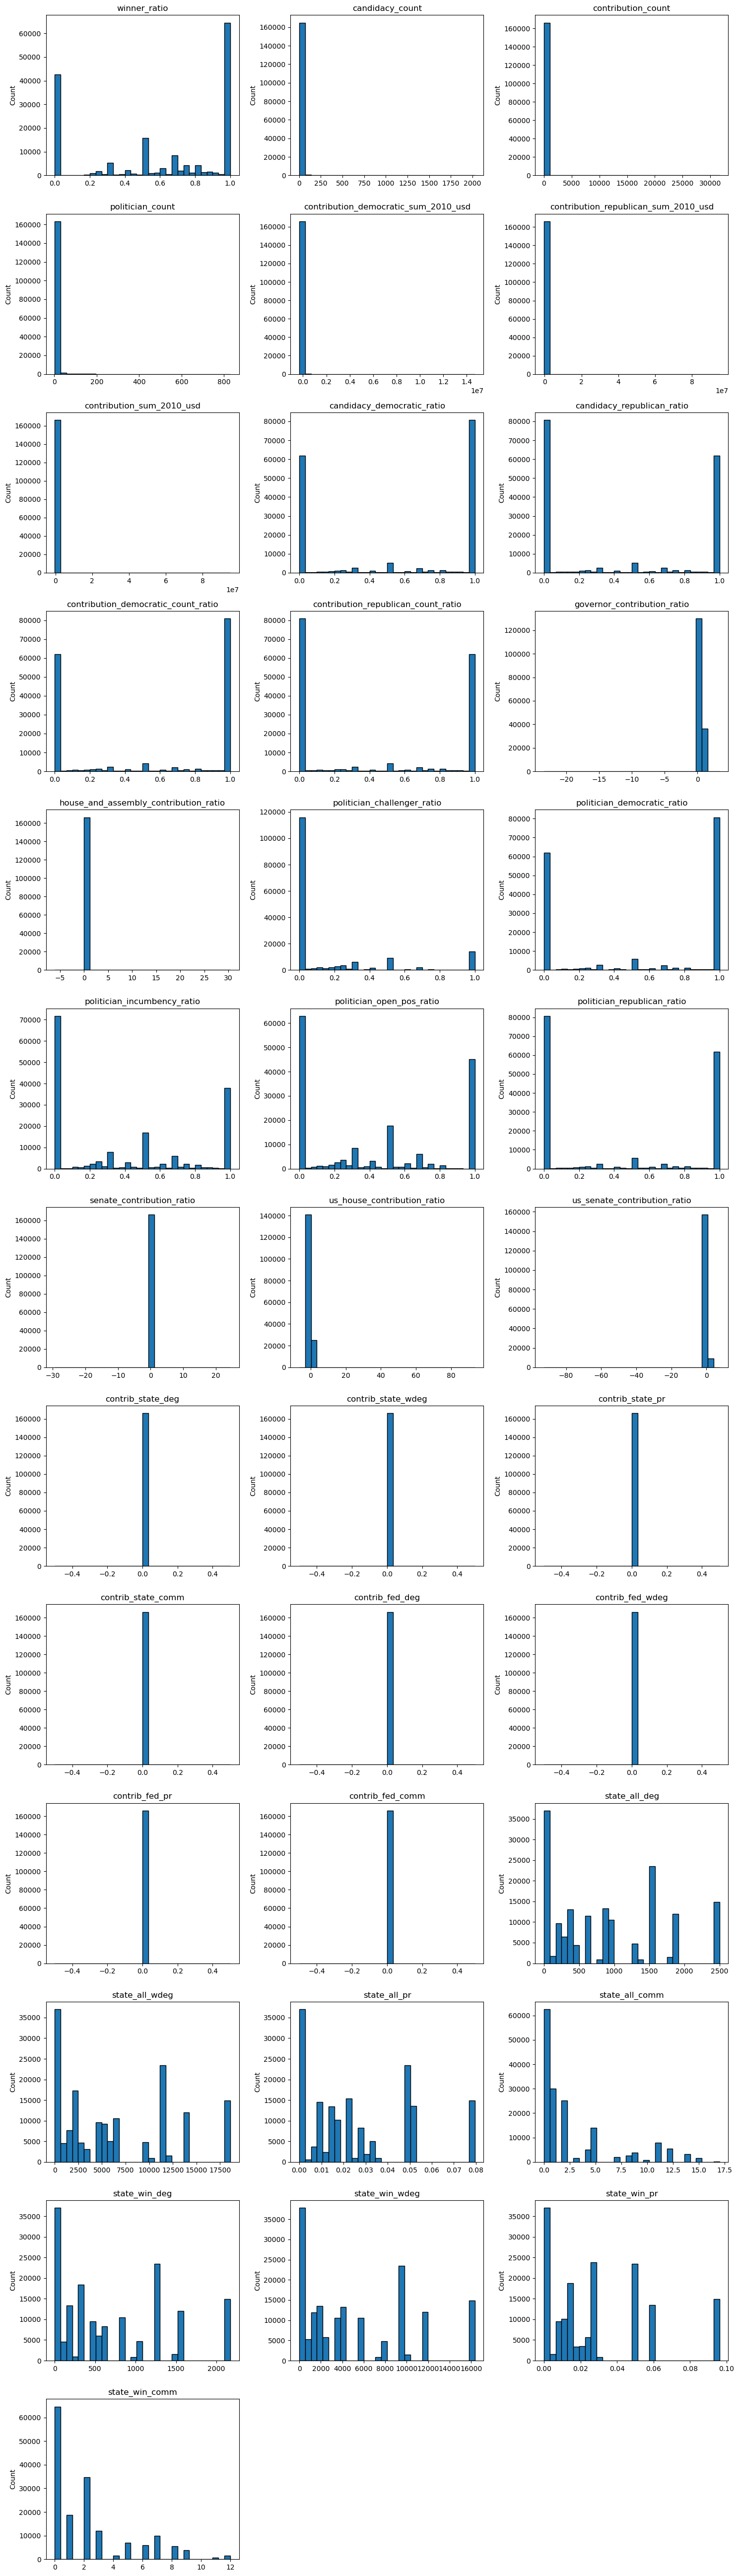

In [447]:
import matplotlib.pyplot as plt

def plot_histograms(df, train_num_vars, bins=30, cols=3, figsize=(15, 4)):
    n = len(train_num_vars)
    rows = (n + cols - 1) // cols
    fig, axes = plt.subplots(rows, cols, figsize=(figsize[0], figsize[1] * rows))
    axes = axes.flatten()
    
    for ax, col in zip(axes, train_num_vars):
        ax.hist(df[col].dropna(), bins=bins, edgecolor='black')
        ax.set_title(col)
        ax.set_xlabel('')
        ax.set_ylabel('Count')
    
    # remove any unused subplots
    for ax in axes[n:]:
        fig.delaxes(ax)
    
    plt.tight_layout()
    plt.show()
    
plot_histograms(train, train_num_vars)


In [448]:
import numpy as np
import matplotlib.pyplot as plt

def plot_histograms(df, cols, bins=30, cols_per_row=3, figsize=(15, 4), wide_range_factor=100):
   
    n = len(cols)
    rows = (n + cols_per_row - 1) // cols_per_row
    fig, axes = plt.subplots(rows, cols_per_row, figsize=(figsize[0], figsize[1]*rows), squeeze=False)
    axes = axes.flatten()

    for ax, col in zip(axes, cols):
        data = df[col].dropna()
        # drop non-finite
        data = data[np.isfinite(data)]
        if data.empty:
            ax.set_title(f"{col}\n(no data)")
            continue

        mn, mx = data.min(), data.max()

        # decide linear vs log
        if mn >= 0 and mx/mn if mn>0 else np.inf > wide_range_factor:
            # log‐scale histogram
            # protect against zeros by starting at a small positive epsilon
            low = mn if mn>0 else data[data>0].min()
            edges = np.logspace(np.log10(low), np.log10(mx), bins)
            ax.hist(data, bins=edges, edgecolor='black')
            ax.set_xscale('log')
            ax.set_title(f"{col}\n(log scale)")
        else:
            # linear histogram
            ax.hist(data, bins=bins, range=(mn, mx), edgecolor='black')
            ax.set_title(col)

        ax.set_ylabel("Count")
        ax.tick_params(axis='x', rotation=30)

    # remove any extra subplots
    for ax in axes[n:]:
        fig.delaxes(ax)

    plt.tight_layout()
    plt.show()


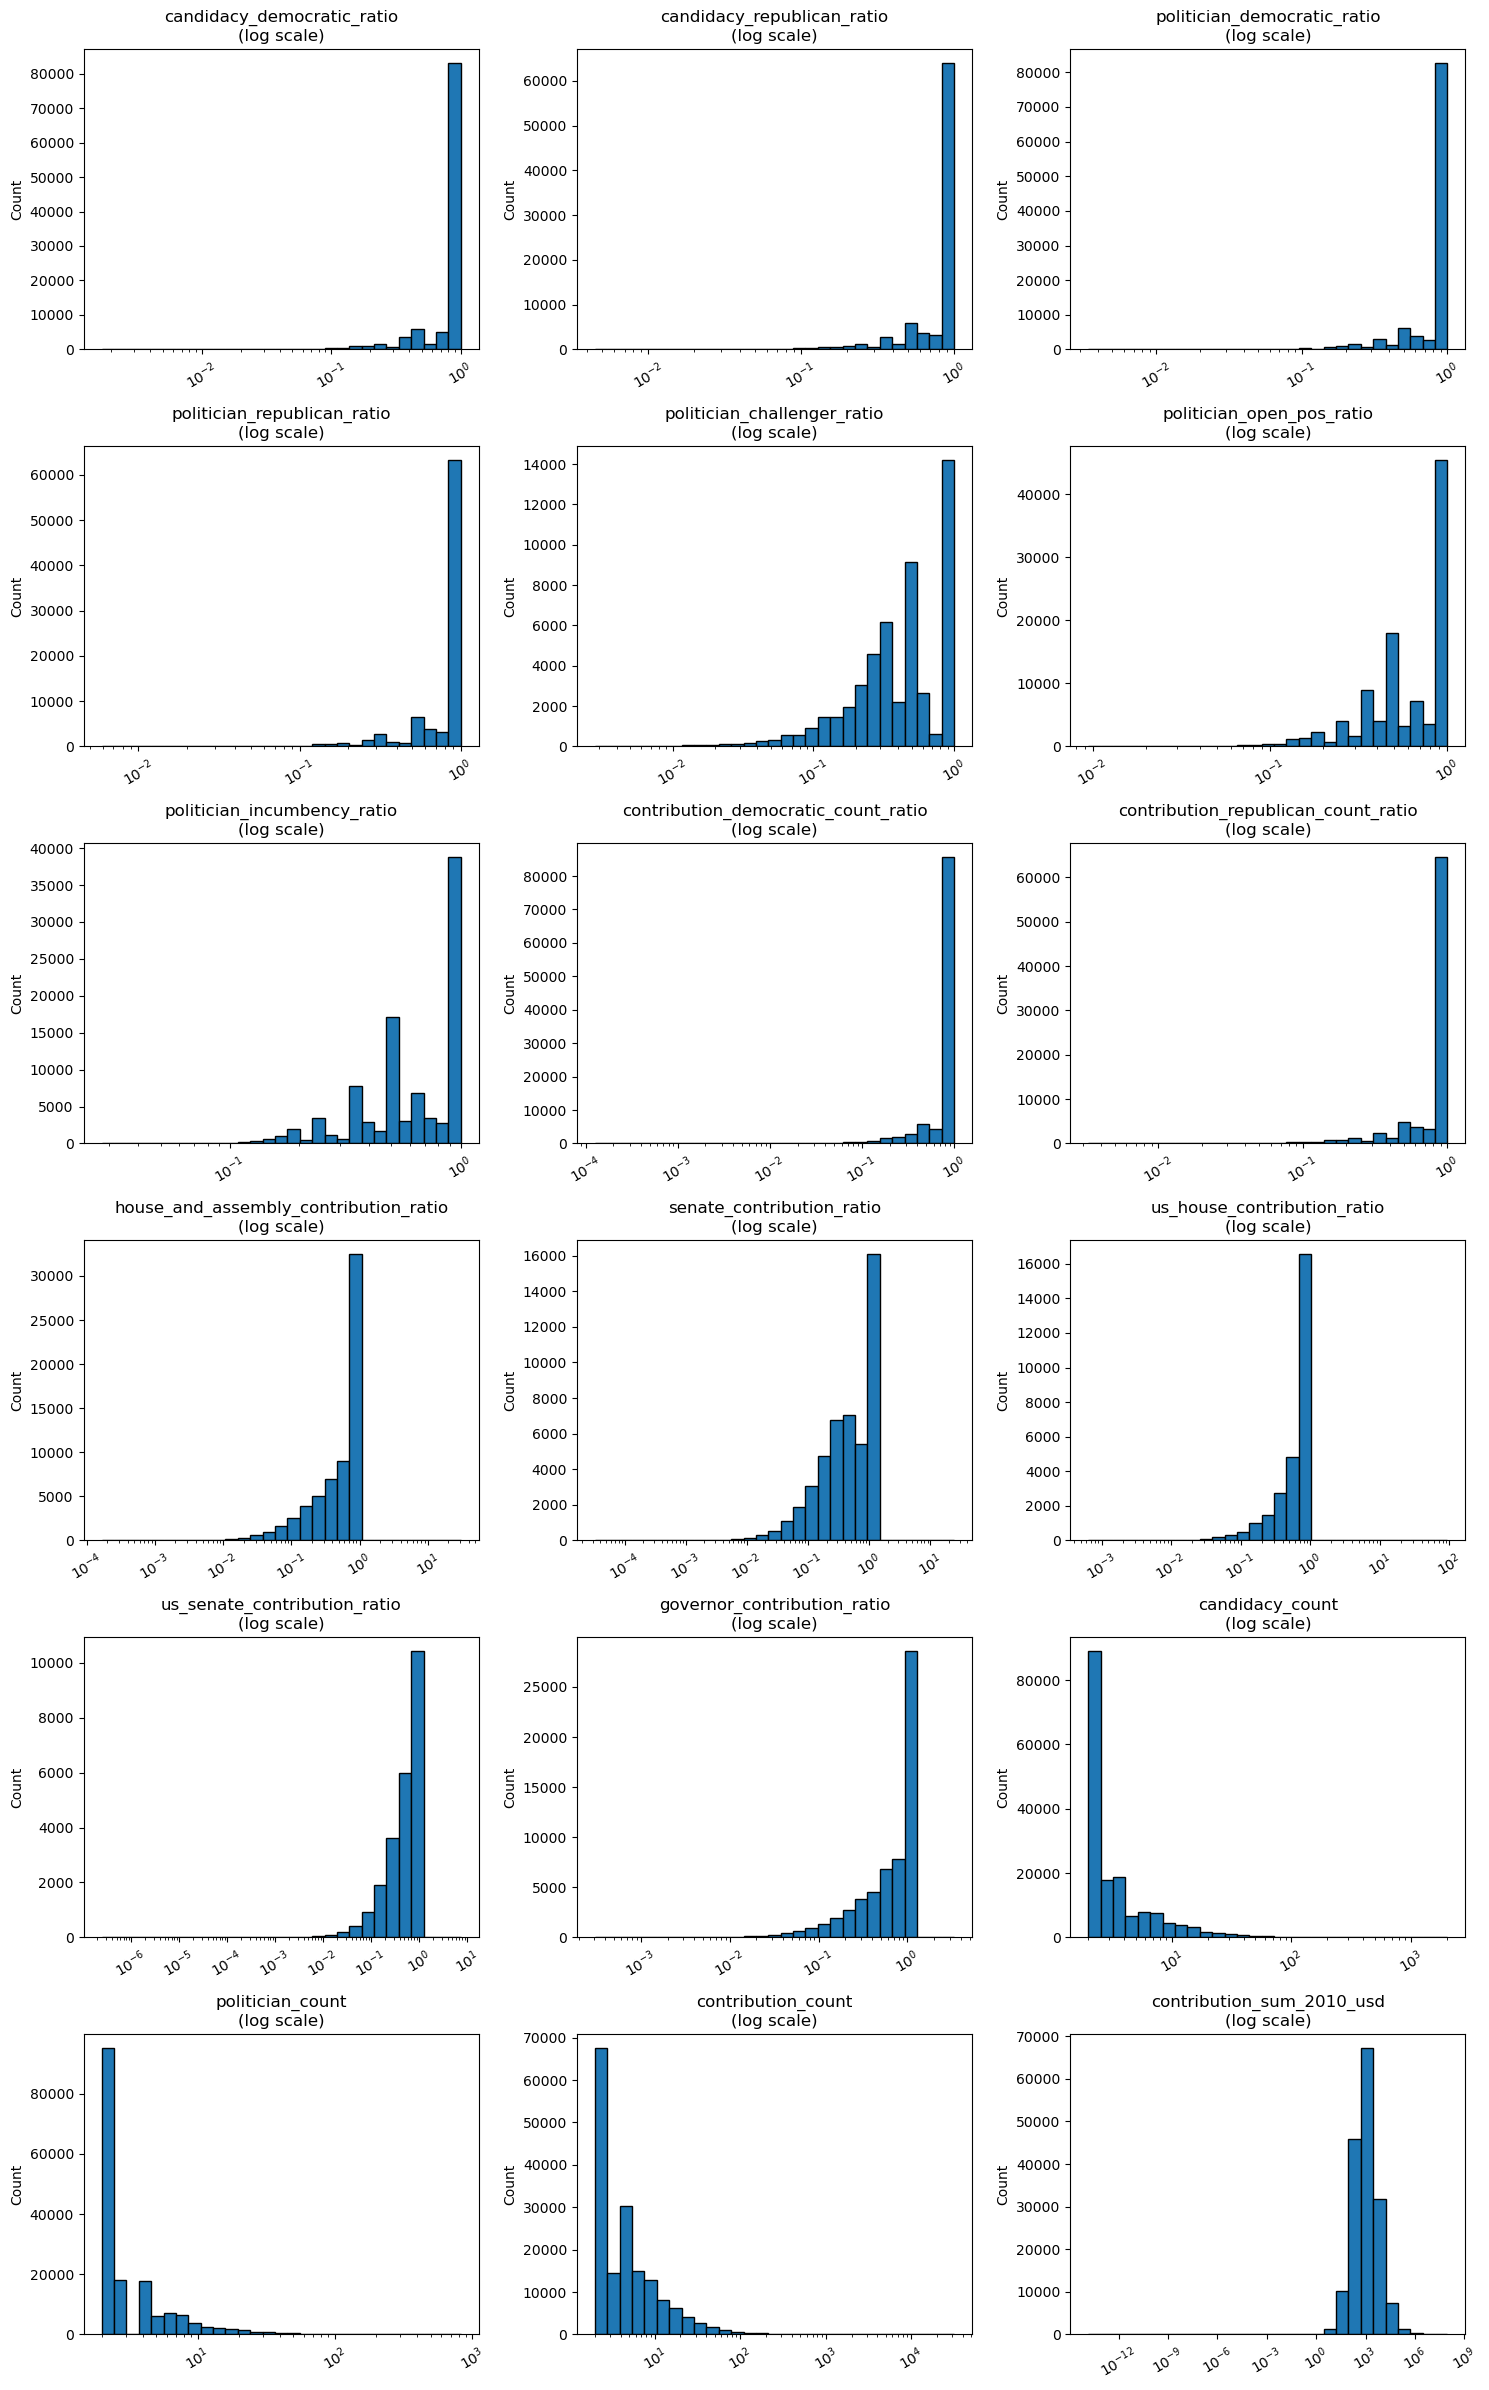

In [449]:

plot_histograms(train, ratio_total_cols, bins=30, cols_per_row=3, figsize=(15, 4), wide_range_factor=100)


## Treat ratio columns to fix skewness or zero and 1 inflated data

In [450]:
import numpy as np
import pandas as pd

THRESH = 0.10
target = "winner_ratio"

# ── 1) Correlation on raw ratios ───────────────────────────────────────
corr_df = train[ratio_cols + [target]].corr(method='spearman')
spearman = corr_df[target].abs().drop(target)

# pick those above threshold
selected_raw = spearman[spearman > THRESH].index.tolist()
print("Keeping these ratio_cols (|ρ| > 0.10):", selected_raw)

# ── 2) Engineer flags/logits only for selected ratios ──────────────────
EPS = 1e-4
def engineer_selected(df, selected):
    out = df.copy()
    for col in selected:
        out[f"{col}_is_zero"] = (out[col] <= 0).astype('int8')
        out[f"{col}_is_one"]  = (out[col] >= 1).astype('int8')
        # logit for all linear/tree/nn — adjust if you want only some
        clip = out[col].clip(EPS, 1-EPS)
        out[f"{col}_logit"] = np.log(clip / (1-clip))
    # drop **all** raw ratio columns
    out.drop(columns=ratio_cols, inplace=True)
    return out

train = engineer_selected(train, selected_raw)
test = engineer_selected(test, selected_raw)

selected_spearman = spearman[ spearman.abs() > THRESH ]\
                         .sort_values(ascending=False)

print("Selected ratio_cols with |Spearman ρ| >", THRESH)
print(selected_spearman.to_frame(name='spearman_rho'))


# ── 3) Drop any engineered columns from the unselected ratios ─────────
#    (shouldn’t be any, because engineer_selected only touches `selected_raw`)
#    but if you re‑ran on full set, you could do:
to_drop = []
for col in ratio_cols:
    if col not in selected_raw:
        to_drop += [c for c in train.columns if c.startswith(col)]
train.drop(columns=to_drop, inplace=True)


# ── 4) Now linear_df contains:
#    • flags and logits for only your important ratios
#    • all other original columns (categoricals + other numerics)

print(" \n\n","Final columns after ratio selection:")
print(train.columns.tolist())


Keeping these ratio_cols (|ρ| > 0.10): ['politician_challenger_ratio', 'politician_open_pos_ratio', 'politician_incumbency_ratio', 'governor_contribution_ratio']
Selected ratio_cols with |Spearman ρ| > 0.1
                             spearman_rho
politician_incumbency_ratio      0.488061
politician_challenger_ratio      0.319815
politician_open_pos_ratio        0.254705
governor_contribution_ratio      0.137031
 

 Final columns after ratio selection:
['state', 'contributor_type', 'winner_ratio', 'candidacy_count', 'contribution_count', 'politician_count', 'contribution_democratic_sum_2010_usd', 'contribution_republican_sum_2010_usd', 'contribution_sum_2010_usd', 'contrib_state_deg', 'contrib_state_wdeg', 'contrib_state_pr', 'contrib_state_comm', 'contrib_fed_deg', 'contrib_fed_wdeg', 'contrib_fed_pr', 'contrib_fed_comm', 'state_all_deg', 'state_all_wdeg', 'state_all_pr', 'state_all_comm', 'state_win_deg', 'state_win_wdeg', 'state_win_pr', 'state_win_comm', 'general_sector_new', 'poli

In [451]:
## Remove those columns from list
selected_ratio_cols = selected_spearman.index.tolist()

# 3) Compute which ratios to discard
discarded_ratio_cols = [c for c in ratio_cols if c not in selected_ratio_cols]
print("Discarding these ratio columns from train_num_vars:", discarded_ratio_cols)

# 4) Filter train_num_vars
train_num_vars = [c for c in train_num_vars if c not in discarded_ratio_cols]
test_num_vars = [col for col in test_num_vars if col not in discarded_ratio_cols]



Discarding these ratio columns from train_num_vars: ['candidacy_democratic_ratio', 'candidacy_republican_ratio', 'politician_democratic_ratio', 'politician_republican_ratio', 'contribution_democratic_count_ratio', 'contribution_republican_count_ratio', 'house_and_assembly_contribution_ratio', 'senate_contribution_ratio', 'us_house_contribution_ratio', 'us_senate_contribution_ratio']


In [452]:
import numpy as np
import pandas as pd

def create_feature_lists(df: pd.DataFrame,
                         target: str = "winner_ratio"):
    
    # 1) logit columns
    logit_vars = [c for c in df.columns if c.endswith("_logit")]

    # 2) binary‑flag columns
    binary_flag_vars = [c for c in df.columns
                        if c.endswith("_is_zero") or c.endswith("_is_one")]

    # 3) numeric columns (ints & floats)
    num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

    # 5) train_num_vars: all numeric except target, cat_vars, binary_flag_vars
    train_num_vars = [
        c for c in num_cols
        if c not in binary_flag_vars + [target]
    ]

    return {
        "logit_vars":       logit_vars,
        "binary_flag_vars": binary_flag_vars,
        "tar_var":          target,
        "train_num_vars":   train_num_vars
    }

# Example usage:
features = create_feature_lists(train)
features["cat_vars"] = cat_vars
print("Logit vars:      ", features["logit_vars"])
print("Binary flags:    ", features["binary_flag_vars"])
print("Categoricals:    ", features["cat_vars"])
print("Target:          ", features["tar_var"])
print("Numeric features:", features["train_num_vars"])



Logit vars:       ['politician_challenger_ratio_logit', 'politician_open_pos_ratio_logit', 'politician_incumbency_ratio_logit', 'governor_contribution_ratio_logit']
Binary flags:     ['politician_challenger_ratio_is_zero', 'politician_challenger_ratio_is_one', 'politician_open_pos_ratio_is_zero', 'politician_open_pos_ratio_is_one', 'politician_incumbency_ratio_is_zero', 'politician_incumbency_ratio_is_one', 'governor_contribution_ratio_is_zero', 'governor_contribution_ratio_is_one']
Categoricals:     ['state', 'contributor_type', 'general_sector_new']
Target:           winner_ratio
Numeric features: ['candidacy_count', 'contribution_count', 'politician_count', 'contribution_democratic_sum_2010_usd', 'contribution_republican_sum_2010_usd', 'contribution_sum_2010_usd', 'contrib_state_deg', 'contrib_state_wdeg', 'contrib_state_pr', 'contrib_state_comm', 'contrib_fed_deg', 'contrib_fed_wdeg', 'contrib_fed_pr', 'contrib_fed_comm', 'state_all_deg', 'state_all_wdeg', 'state_all_pr', 'state_al

### Treat Network data columns

In [453]:
features["cat_vars"]

['state', 'contributor_type', 'general_sector_new']

/var/folders/h5/yfvk0l4921v0kg94n8qt42wc0000gn/T/ipykernel_59575/2570631980.py:26: RuntimeWarning: divide by zero encountered in log10
  edges = np.logspace(np.log10(low), np.log10(mx), bins)


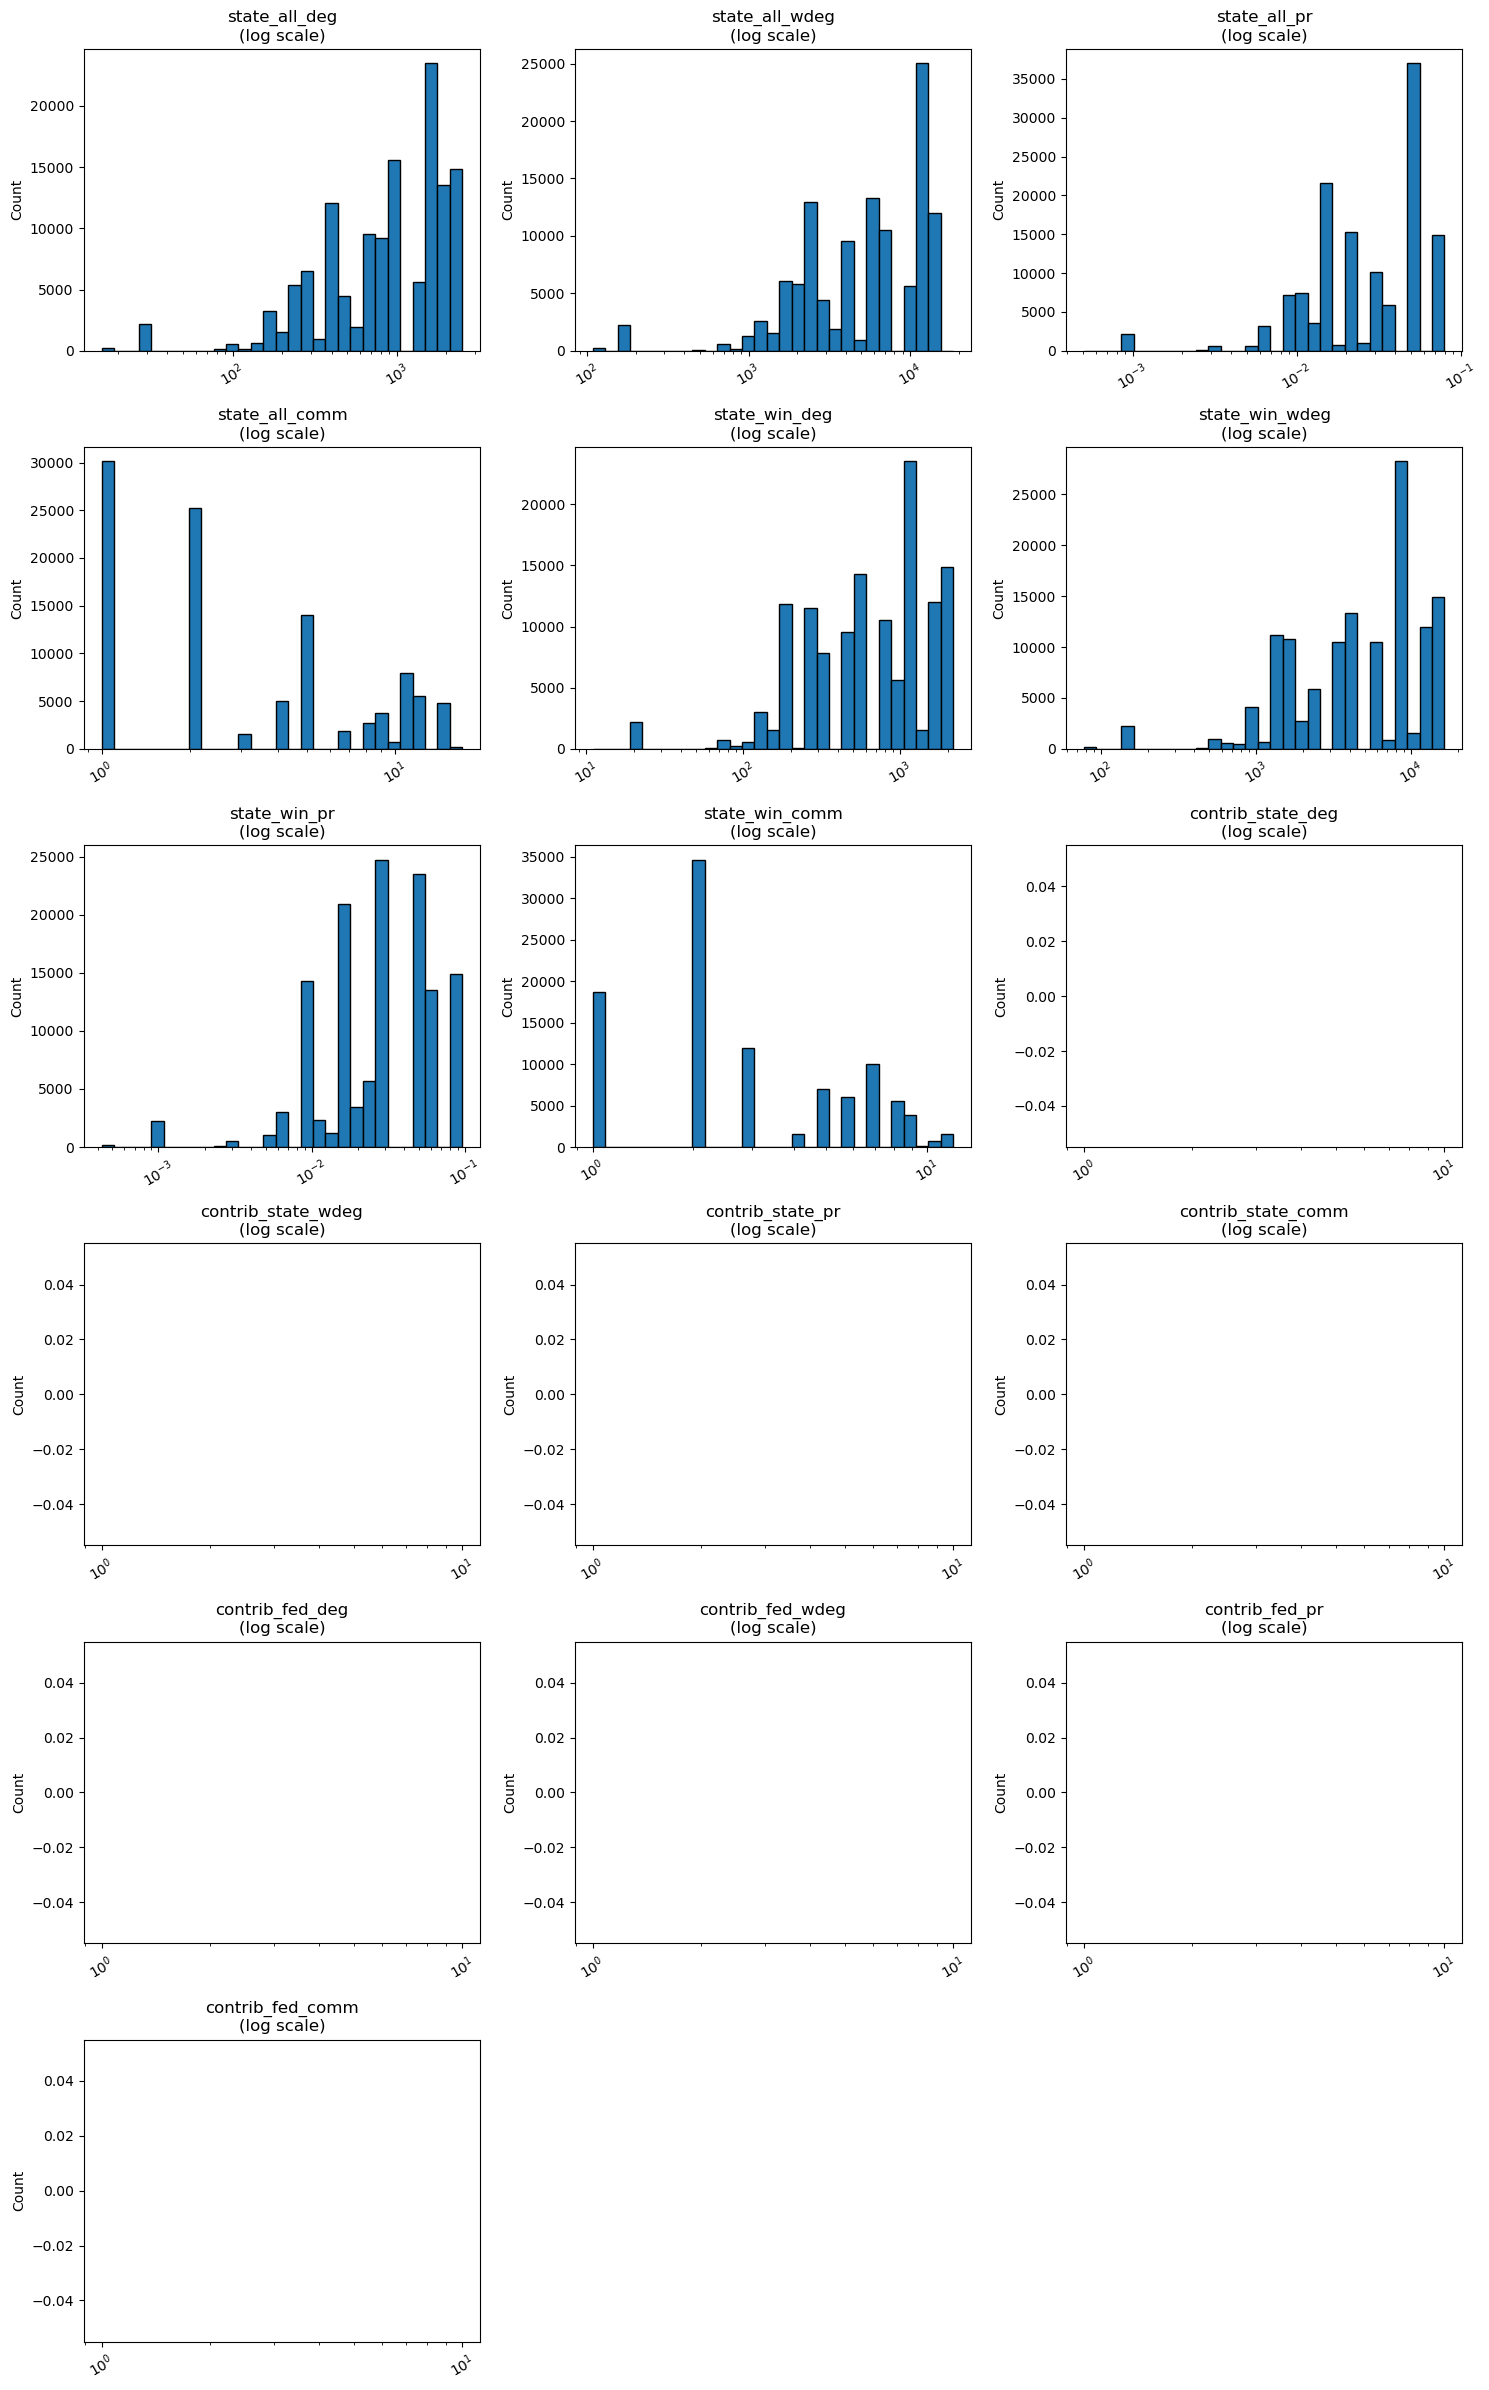

In [454]:

network_cols = [
    'state_all_deg', 'state_all_wdeg', 'state_all_pr', 'state_all_comm',
    'state_win_deg', 'state_win_wdeg', 'state_win_pr', 'state_win_comm',
    'contrib_state_deg', 'contrib_state_wdeg', 'contrib_state_pr', 'contrib_state_comm',
    'contrib_fed_deg',  'contrib_fed_wdeg',  'contrib_fed_pr',  'contrib_fed_comm'
]

plot_histograms(train, network_cols)


In [455]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PowerTransformer



# ---------------------------------
# 2. Drop columns with zero variance
# ---------------------------------
non_constant = [c for c in network_cols if train[c].std(skipna=True) > 0]
print(f"Dropping {len(network_cols) - len(non_constant)} constant columns")

# ---------------------------------
# 3. Apply a skew‑reducing transform
#    a) log1p  (good for strictly‑positive features with many zeros)
#    b) Yeo‑Johnson (handles negatives too; uncomment if needed)
# ---------------------------------
X = train[non_constant].copy()

# a) log1p
X_log  = np.log1p(X)

# b) Yeo‑Johnson – uncomment if you have negatives
# pt     = PowerTransformer(method="yeo-johnson", standardize=False)
# X_log  = pd.DataFrame(pt.fit_transform(X), columns=non_constant, index=train.index)

# ---------------------------------
# 4. Correlation with the target
# ---------------------------------
y = train['winner_ratio']

pearson  = X_log.apply(lambda col: col.corr(y, method='pearson')).sort_values(ascending=False)
spearman = X.apply  (lambda col: col.corr(y, method='spearman')).sort_values(ascending=False)

print("\n=== Pearson (after log1p) ===")
print(pearson)

print("\n=== Spearman (rank‑based, raw values) ===")
print(spearman)


Dropping 8 constant columns

=== Pearson (after log1p) ===
state_win_comm    0.007294
state_all_comm    0.005211
state_all_wdeg   -0.014533
state_win_wdeg   -0.015299
state_all_deg    -0.016563
state_win_deg    -0.017559
state_win_pr     -0.032553
state_all_pr     -0.038107
dtype: float64

=== Spearman (rank‑based, raw values) ===
state_win_comm    0.010178
state_all_comm   -0.003357
state_all_deg    -0.012748
state_win_wdeg   -0.012795
state_win_deg    -0.013261
state_all_wdeg   -0.013273
state_win_pr     -0.015181
state_all_pr     -0.017983
dtype: float64


In [456]:
from sklearn.preprocessing import PowerTransformer

# 1) fit Yeo-Johnson
pt = PowerTransformer(method="yeo-johnson", standardize=False)
X_yeo = pd.DataFrame(pt.fit_transform(train[non_constant]),
                     columns=non_constant, index=train.index)

# 2) Pearson corr on Yeo‑Johnson
pearson_yeo = X_yeo.apply(lambda col: col.corr(train['winner_ratio'], method='pearson'))
print("Pearson after Yeo‑Johnson:\n", pearson_yeo.sort_values(ascending=False))


Pearson after Yeo‑Johnson:
 state_win_comm    0.004449
state_all_comm   -0.003177
state_all_wdeg   -0.029796
state_win_wdeg   -0.029854
state_win_deg    -0.030521
state_all_deg    -0.030768
state_win_pr     -0.041155
state_all_pr     -0.041959
dtype: float64


#### Dropping network related metrics, since they're found to be very less correlated with winner_ratio

In [457]:
train.drop(network_cols, axis=1, inplace= True)
test.drop(network_cols, axis=1, inplace= True)

In [458]:
for col in network_cols:
    features['train_num_vars'].remove(col)
    # features['test_num_vars'].remove(col)

In [459]:
train['contribution_total_sum_2010_usd'] = train['contribution_democratic_sum_2010_usd'] + train['contribution_republican_sum_2010_usd']
test['contribution_total_sum_2010_usd'] = test['contribution_democratic_sum_2010_usd'] + test['contribution_republican_sum_2010_usd']

features['train_num_vars'].append("contribution_total_sum_2010_usd")
# features['test_num_vars'].append("contribution_total_sum_2010_usd")

In [460]:
def dropZeroRecords(df, cols):
    for col in cols:
        print(f'# Zero records in {col} are {df[df[col]==0 ].shape}')
        df = df[df[col]>0]
    return df

cols = ["contribution_total_sum_2010_usd"]
train = dropZeroRecords(train, cols)
test = dropZeroRecords(train, cols)

# Zero records in contribution_total_sum_2010_usd are (181, 23)
# Zero records in contribution_total_sum_2010_usd are (0, 23)


In [461]:
def dropNegRecords(df, col):
    for col in cols:
        print(f'# Neg records in {col} are {df[df[col]<0 ].shape}')
        df = df[df[col]>0]
    return df

cols = ["contribution_democratic_sum_2010_usd", "contribution_republican_sum_2010_usd"]
train = dropNegRecords(train, cols)
print("\n\n")
test = dropNegRecords(test, cols)

# Neg records in contribution_democratic_sum_2010_usd are (23, 23)
# Neg records in contribution_republican_sum_2010_usd are (36, 23)



# Neg records in contribution_democratic_sum_2010_usd are (23, 23)
# Neg records in contribution_republican_sum_2010_usd are (36, 23)


In [462]:
import numpy as np
import pandas as pd

money_sums = [
    "contribution_democratic_sum_2010_usd",
    "contribution_republican_sum_2010_usd",
    "contribution_total_sum_2010_usd",
]

def add_share_features(df, money_sums, eps=1e-6):
    # 1) raw sums → log (we dropped total_sum zeros upstream)
    for col in money_sums:
        df[f"{col}_log"] = np.log1p(df[col])
    
    # 2) zero‐flags only for dem & rep sums
    for col in money_sums[:-1]:  # skip the total_sum
        df[f"{col}_is_zero"] = (df[col] == 0).astype(int)

    # 3) compute share ratios directly
    df["dem_sum_ratio"] = (
        df["contribution_democratic_sum_2010_usd"]
        / df["contribution_total_sum_2010_usd"]
    )
    df["rep_sum_ratio"] = (
        df["contribution_republican_sum_2010_usd"]
        / df["contribution_total_sum_2010_usd"]
    )

    # 4) flags for ratio boundaries
    df["dem_sum_ratio_is_zero"] = (df["dem_sum_ratio"] == 0).astype(int)
    df["dem_sum_ratio_is_one"]  = (df["dem_sum_ratio"] == 1).astype(int)
    df["rep_sum_ratio_is_zero"] = (df["rep_sum_ratio"] == 0).astype(int)
    df["rep_sum_ratio_is_one"]  = (df["rep_sum_ratio"] == 1).astype(int)

    # 5) logit‐transform the ratios (safe since denom≠0)
    for col in ["dem_sum_ratio", "rep_sum_ratio"]:
        r = df[col].clip(eps, 1 - eps)
        df[f"{col}_logit"] = np.log(r / (1 - r))

    return df

# Apply to both train and test (after you’ve dropped total_sum == 0 rows)
train = add_share_features(train, money_sums)
test  = add_share_features(test,  money_sums)


In [463]:
features['cat_vars']

['state', 'contributor_type', 'general_sector_new']

In [464]:
# Linear or GLM (no penalty)
linear_keep = [
    "contribution_total_sum_2010_usd_log",
    "dem_sum_ratio_logit",
    "dem_sum_ratio_is_zero", "dem_sum_ratio_is_one",
    "contribution_democratic_sum_2010_usd_is_zero",
    "contribution_republican_sum_2010_usd_is_zero",
]

# Linear with Ridge/Lasso
linear_keep_penalised = [
    # 1) magnitude of money (compressed)
    "contribution_democratic_sum_2010_usd_log",
    "contribution_republican_sum_2010_usd_log",
    "contribution_total_sum_2010_usd_log",

     # 2) wasn’t zero? (flag)
    "dem_sum_ratio_is_zero", "dem_sum_ratio_is_one",
    "contribution_democratic_sum_2010_usd_is_zero",
    "contribution_republican_sum_2010_usd_is_zero",

    # 3) partisan dollar share (dem only), logit‐transformed
    "dem_sum_ratio_logit",
    
]

# Tree‑based
tree_keep = [
    # 1. raw sums — trees love them
    "contribution_democratic_sum_2010_usd",
    "contribution_republican_sum_2010_usd",
    "contribution_total_sum_2010_usd",
    # 2. raw share ratio
    "dem_sum_ratio",
]

# Neural network (after StandardScaler)
nn_keep = [
    "contribution_democratic_sum_2010_usd_log",
    "contribution_republican_sum_2010_usd_log",
    "contribution_total_sum_2010_usd_log",
    "dem_sum_ratio",
    "dem_sum_ratio_is_zero", "dem_sum_ratio_is_one",
    "contribution_democratic_sum_2010_usd_is_zero",
    "contribution_republican_sum_2010_usd_is_zero",
]

######### Linear Models ########
# features_keep_penalised = create_feature_lists(train)
# features["train_num_vars"] = [c for c in nn_keep if c in train.columns]

# features["train_num_vars"] += [col for col in features_keep_penalised["train_num_vars"]
#                                if col not in features["train_num_vars"]]

# features["binary_flag_vars"] += [col for col in features_keep_penalised["binary_flag_vars"]
#                                if col not in features["binary_flag_vars"]]

# features["logit_vars"] += [col for col in features_keep_penalised["logit_vars"]
#                                if col not in features["logit_vars"]]

####### tree models
# features_tree = create_feature_lists(train)
# features["train_num_vars"] = [c for c in nn_keep if c in train.columns]

# features["train_num_vars"] += [col for col in features_tree["train_num_vars"]
#                                if col not in features["train_num_vars"]]

# features["binary_flag_vars"] += [col for col in features_tree["binary_flag_vars"]
#                                if col not in features["binary_flag_vars"]]

# features["logit_vars"] += [col for col in features_tree["logit_vars"]
#                                if col not in features["logit_vars"]]



# 2) build your feature dict from scratch
features_nn = create_feature_lists(train)
features["train_num_vars"] += [col for col in features_nn["train_num_vars"]
                               if col not in features["train_num_vars"]]

features["binary_flag_vars"] += [col for col in features_nn["binary_flag_vars"]
                               if col not in features["binary_flag_vars"]]

features["logit_vars"] += [col for col in features_nn["logit_vars"]
                               if col not in features["logit_vars"]]


In [465]:
"contribution_republican_sum_2010_usd_log" in features["train_num_vars"]

True

In [466]:
"contribution_democratic_sum_2010_usd_log" in features["train_num_vars"]

True

In [467]:
"rep_sum_ratio" in features["train_num_vars"] 

True

In [468]:
## Dropping redundance columns

def drop_extra_cols(df, features, cols):
    features["train_num_vars"] = [c for c in features["train_num_vars"] if c not in cols]
    df.drop(columns=[c for c in cols if c in df.columns], inplace=True)
    return df, features

cols = ["dem_sum_ratio", "rep_sum_ratio"]
train, features = drop_extra_cols(train, features, cols)
test, features = drop_extra_cols(test, features, cols)  

In [469]:
"contribution_democratic_sum_2010_usd_log" in features["train_num_vars"], "contribution_republican_sum_2010_usd_log" in features["train_num_vars"]

(True, True)

In [470]:
set(features["train_num_vars"] + features["cat_vars"] + features["binary_flag_vars"] ) -set(train.columns)

set()

In [471]:
set(train.columns) - set(features["train_num_vars"] + features["cat_vars"] + features["binary_flag_vars"] ) 

{'winner_ratio'}

### Keep only relevant columns and drop redundant columns

In [472]:

# ───────────────────────────────
# For Neural‑Net Models (dense, gradient‑based)
# ───────────────────────────────
cols_to_drop_nn = [
    # raw total (we’ll use log1p(total) instead)
    "contribution_total_sum_2010_usd",

    # party‑specific sums → not needed once we have log(total) + dem_logit
    "contribution_democratic_sum_2010_usd",
    "contribution_republican_sum_2010_usd",

    # raw‑sum logs for the parties only
    "contribution_democratic_sum_2010_usd_log",
    "contribution_republican_sum_2010_usd_log",

    # rep_logit (anti‑corr with dem_logit)
    "rep_sum_ratio_logit"
]

# After dropping, set:
features["train_num_vars"] = [
    "candidacy_count",
    "contribution_count",
    "politician_count",
    "contribution_total_sum_2010_usd_log",
    "politician_challenger_ratio_logit",
    "politician_open_pos_ratio_logit",
    "politician_incumbency_ratio_logit",
    "governor_contribution_ratio_logit",
    "dem_sum_ratio_logit",
]

train.drop(columns=cols_to_drop_nn, errors="ignore", inplace=True)
test .drop(columns=cols_to_drop_nn, errors="ignore", inplace=True)


We drop the party‑specific log‑sums for the NN because once you have:

1. **`contribution_total_sum_2010_usd_log`** — which captures the overall scale of money  
2. **`dem_sum_ratio_logit`** (and its zero/one flags) — which captures the *share* of that total going to Democrats  

you don’t *need* both `contribution_democratic_sum_2010_usd_log` *and* `contribution_republican_sum_2010_usd_log`.  In fact, they’re almost perfectly collinear with:

- the total money (their sum ≈ total)  
- the ratio logit (their ratio = share)

Keeping them would introduce unnecessary redundancy (and hurt gradient‑based training), so for the NN we:

- **Keep** only the **total log** (magnitude)  
- **Keep** only the **share (logit)**  
- **Drop** the two party‐specific logs, since their information is already encoded by those two features.

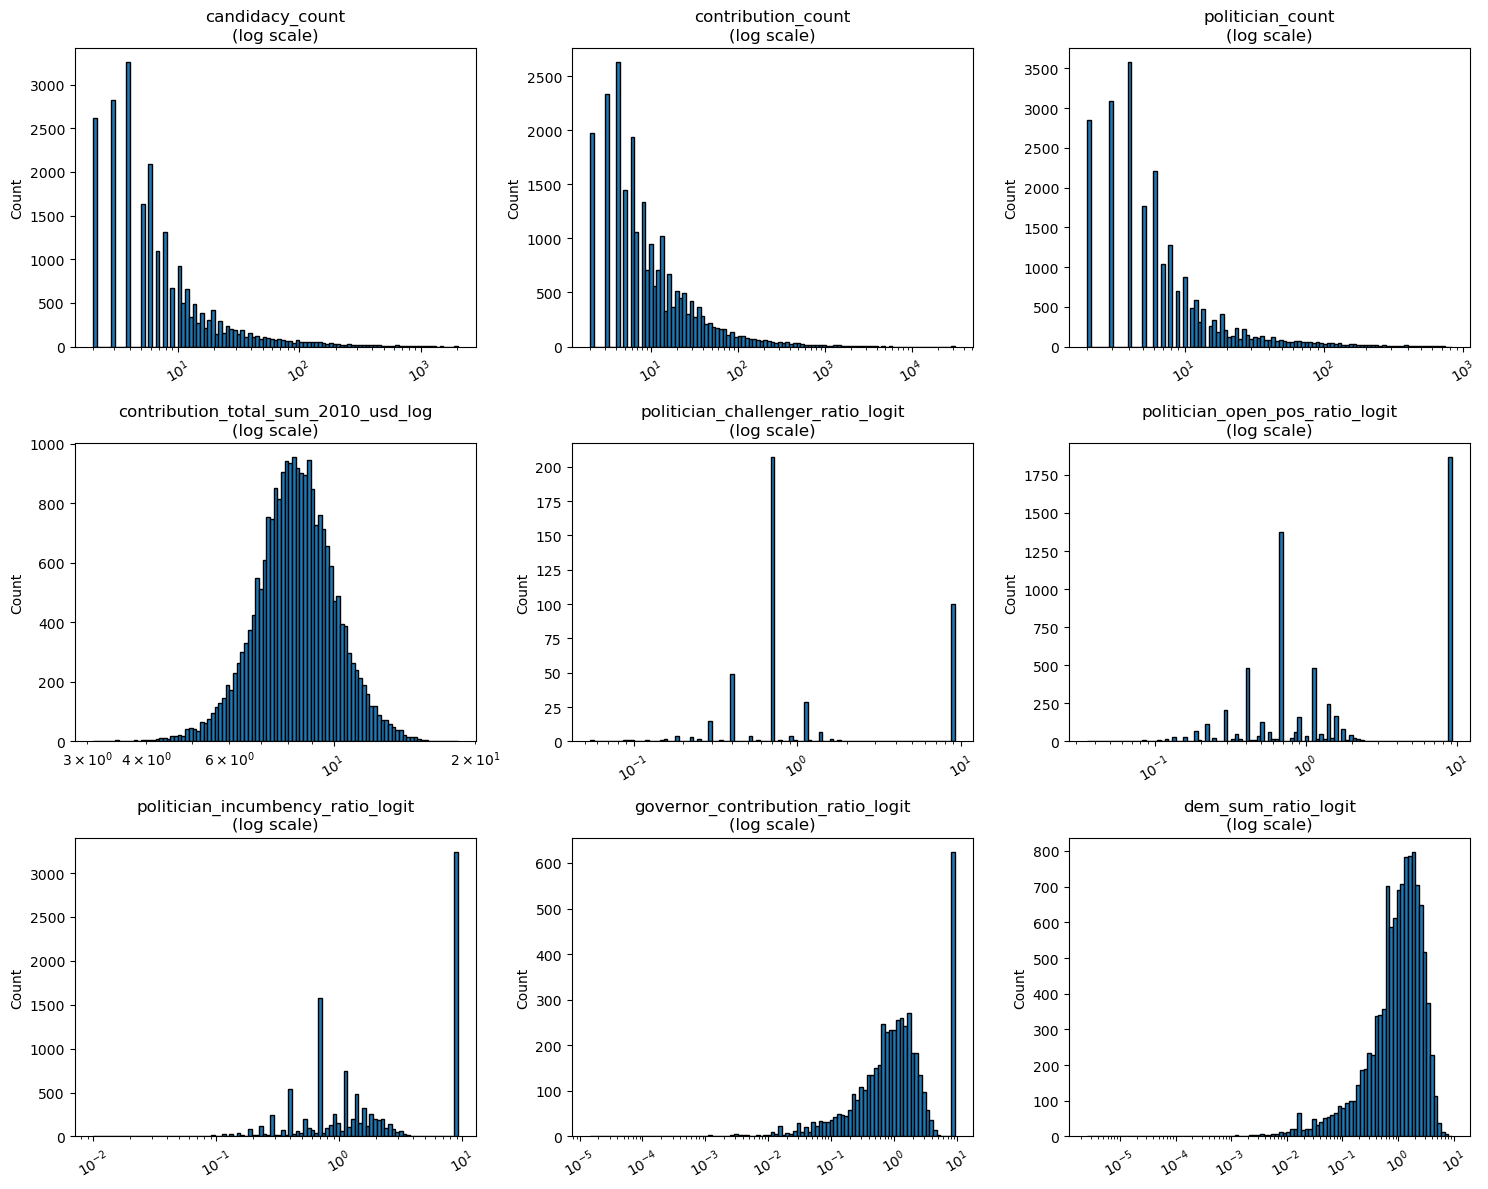

In [473]:


plot_histograms(train, features['train_num_vars'], bins=100, cols_per_row=3, figsize=(15, 4), wide_range_factor=100)

## Check skewness in features

In [474]:
train_bkp = train.copy()

In [475]:
import numpy as np
from scipy.stats import skew


# 2) Compute & print pre‑log1p skewness
print("Pre‑log1p skewness:")
pre = {c: skew(train[c].dropna()) for c in features['train_num_vars']}
for c,v in pre.items():
    print(f"  {c:20s}  {v:6.3f}")



Pre‑log1p skewness:
  candidacy_count       10.931
  contribution_count    94.286
  politician_count       8.328
  contribution_total_sum_2010_usd_log   0.584
  politician_challenger_ratio_logit   0.635
  politician_open_pos_ratio_logit   0.059
  politician_incumbency_ratio_logit  -0.067
  governor_contribution_ratio_logit   0.550
  dem_sum_ratio_logit    0.104


### Log transform count columns

In [476]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# 1) Define your columns
count_cols = ["candidacy_count", "contribution_count", "politician_count"]

def logTransform(df, features):

    # 2) Log‑transform the skewed counts & money total
    for col in count_cols:
        df[f"{col}_log"] = np.log1p(df[col])
        df.drop(columns=col, inplace=True)
        if col in features['train_num_vars']:
            features['train_num_vars'].remove(col)
    return df, features


train, features = logTransform(train, features)
test, features = logTransform(test, features)

In [477]:
train.columns

Index(['state', 'contributor_type', 'winner_ratio',
       'contribution_sum_2010_usd', 'general_sector_new',
       'politician_challenger_ratio_is_zero',
       'politician_challenger_ratio_is_one',
       'politician_challenger_ratio_logit',
       'politician_open_pos_ratio_is_zero', 'politician_open_pos_ratio_is_one',
       'politician_open_pos_ratio_logit',
       'politician_incumbency_ratio_is_zero',
       'politician_incumbency_ratio_is_one',
       'politician_incumbency_ratio_logit',
       'governor_contribution_ratio_is_zero',
       'governor_contribution_ratio_is_one',
       'governor_contribution_ratio_logit',
       'contribution_total_sum_2010_usd_log',
       'contribution_democratic_sum_2010_usd_is_zero',
       'contribution_republican_sum_2010_usd_is_zero', 'dem_sum_ratio_is_zero',
       'dem_sum_ratio_is_one', 'rep_sum_ratio_is_zero', 'rep_sum_ratio_is_one',
       'dem_sum_ratio_logit', 'candidacy_count_log', 'contribution_count_log',
       'politician_coun

## Check VIF among numerical columns

In [478]:
# 2) Compute VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = train[features['train_num_vars']].dropna().astype(float)
vif_data = pd.DataFrame({
    "feature": features['train_num_vars'], 
    "VIF": [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
})

print("\nVariance Inflation Factors:")
print(vif_data.sort_values("VIF", ascending=False))


Variance Inflation Factors:
                               feature       VIF
0  contribution_total_sum_2010_usd_log  4.655893
1    politician_challenger_ratio_logit  3.664598
2      politician_open_pos_ratio_logit  3.482784
3    politician_incumbency_ratio_logit  3.131281
4    governor_contribution_ratio_logit  2.074725
5                  dem_sum_ratio_logit  1.004979


## Check correlation of numerical variables with target variable

In [479]:

# Calculate correlations
correlations = train[features['train_num_vars']].corrwith(train['winner_ratio']).sort_values(key=abs, ascending=False)

# Display top correlations
print("🔍 Correlation of Predictors with winner_ratio:")
print(correlations)

🔍 Correlation of Predictors with winner_ratio:
politician_incumbency_ratio_logit      0.536305
politician_open_pos_ratio_logit       -0.366763
politician_challenger_ratio_logit     -0.257657
contribution_total_sum_2010_usd_log    0.251592
governor_contribution_ratio_logit     -0.231964
dem_sum_ratio_logit                   -0.061244
dtype: float64


In [480]:
# Compute Spearman correlation between each train_num_var and the target
spearman = train[features["train_num_vars"]].apply(
    lambda col: col.corr(train["winner_ratio"], method="spearman")
).sort_values(ascending=False)

spearman


politician_incumbency_ratio_logit      0.597792
contribution_total_sum_2010_usd_log    0.216085
dem_sum_ratio_logit                   -0.068200
governor_contribution_ratio_logit     -0.245674
politician_challenger_ratio_logit     -0.292907
politician_open_pos_ratio_logit       -0.436844
dtype: float64

### Below column is found to be least correlated with tar var

In [481]:
"dem_sum_ratio_logit" in train.columns

True

In [482]:
# to_drop = ["dem_sum_ratio_logit"]
# train.drop(columns=to_drop, inplace=True, errors="ignore")
# test .drop(columns=to_drop, inplace=True, errors="ignore")

# features['train_num_vars'].remove(to_drop[0])

In [483]:
"dem_sum_ratio_logit" in train.columns

True

In [484]:
# features['train_num_vars'].remove("dem_sum_ratio_logit")

In [485]:
"dem_sum_ratio_logit" in features['train_num_vars']

True

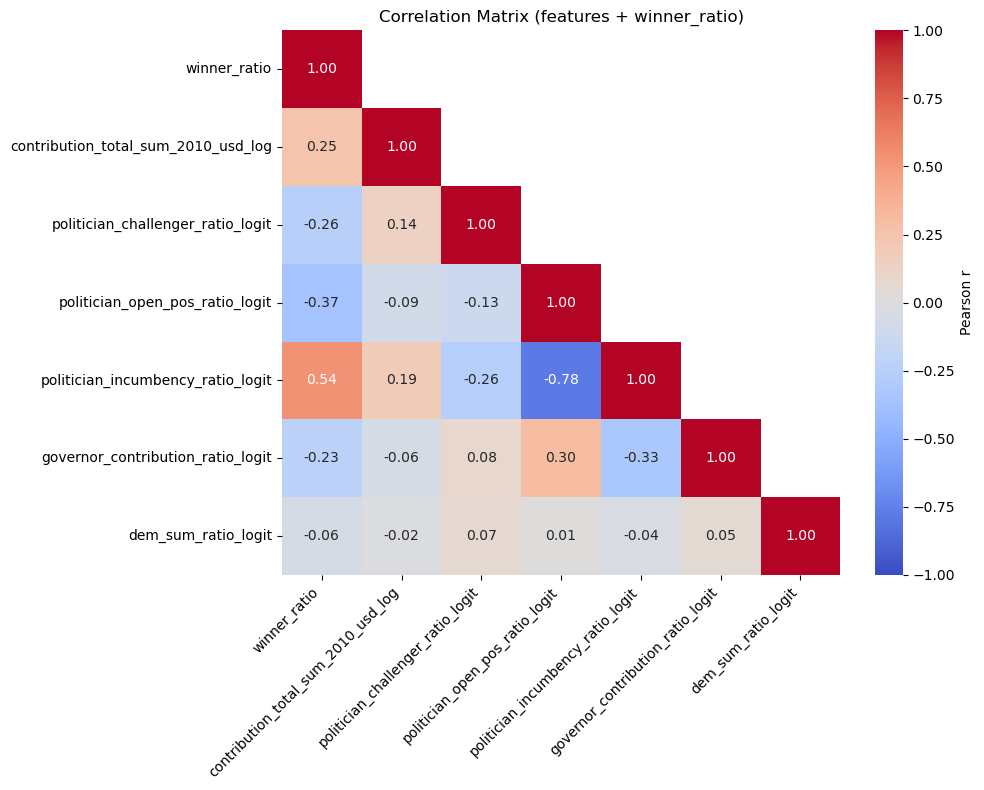

In [486]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Build list with winner_ratio first so its correlations sit on the diagonal
vars_for_corr = [features["tar_var"]] + features["train_num_vars"]

# 2) Compute Pearson correlation matrix
corr = train[vars_for_corr].corr()

# 3) Create a mask for the upper triangle (k=1 masks above the diagonal)
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

# 4) Plot heatmap with annotations
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr,
    mask=mask,
    annot=True,         # show the correlation coefficients
    fmt=".2f",          # two decimal places
    cmap="coolwarm",
    vmin=-1, vmax=1,
    cbar_kws={"label": "Pearson r"}
)

# 5) Tidy up labels
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.title("Correlation Matrix (features + winner_ratio)")
plt.tight_layout()
plt.show()


### Pipeline to split data, encode categorical columns, and then model building

In [487]:
train_bkp = train.copy()

[   0.0s] Preparing target & predictors
[   0.0s] Splitting 80/20 train–val
[   0.0s] Building preprocessing pipeline
[   0.0s] Fitting Elastic‑Net CV …


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 10 concurrent workers.
......................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

[   4.0s] Model fit complete
[   4.0s] Validation MSE = 0.042064
   best α       = 0.0001
   best ℓ₁‑ratio = 0.9


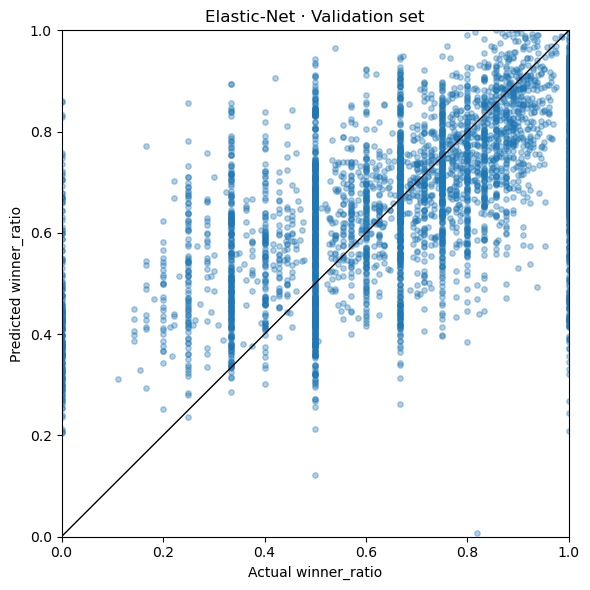

[   4.2s] Finished


In [488]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection   import train_test_split
from sklearn.preprocessing     import OneHotEncoder, StandardScaler
from sklearn.compose           import ColumnTransformer
from sklearn.pipeline          import Pipeline
from sklearn.linear_model      import ElasticNetCV
from sklearn.metrics           import mean_squared_error
from time import perf_counter

# ---------------------------------------------------------
# 0 · basic timing helper
# ---------------------------------------------------------
t0 = perf_counter()
def tick(msg):
    print(f"[{perf_counter()-t0:6.1f}s] {msg}")

# ---------------------------------------------------------
# 1 · target / predictors
# ---------------------------------------------------------
tick("Preparing target & predictors")
y = train.pop("winner_ratio")
X = train

cat_cols = ["state", "contributor_type", "general_sector_new"]
num_cols = X.columns.difference(cat_cols)

# ---------------------------------------------------------
# 2 · train / validation split
# ---------------------------------------------------------
tick("Splitting 80/20 train–val")
X_tr, X_val, y_tr, y_val = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=None)

# ---------------------------------------------------------
# 3 · preprocessing + model
# ---------------------------------------------------------
tick("Building preprocessing pipeline")
pre = ColumnTransformer(
      [("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
       ("num", StandardScaler(),                     num_cols)],
      sparse_threshold=0.3)

enet = ElasticNetCV(
        l1_ratio=[0.1, 0.3, 0.5, 0.7, 0.9, 1.0],
        alphas=np.logspace(-4, 1, 30),
        cv=15,
        max_iter=20_000,
        n_jobs=-1,
        verbose=1,          # <‑‑ prints CV progress
        random_state=42)

pipe = Pipeline([("pre", pre), ("enet", enet)])

# ---------------------------------------------------------
# 4 · fit
# ---------------------------------------------------------
tick("Fitting Elastic‑Net CV …")
pipe.fit(X_tr, y_tr)
tick("Model fit complete")

# ---------------------------------------------------------
# 5 · evaluate
# ---------------------------------------------------------
y_pred = pipe.predict(X_val)
mse_val = mean_squared_error(y_val, y_pred)
tick(f"Validation MSE = {mse_val:.6f}")
print(f"   best α       = {pipe.named_steps['enet'].alpha_:.4f}")
print(f"   best ℓ₁‑ratio = {pipe.named_steps['enet'].l1_ratio_}")

# ---------------------------------------------------------
# 6 · diagnostic plot
# ---------------------------------------------------------
plt.figure(figsize=(6, 6))
plt.scatter(y_val, y_pred, alpha=0.35, s=15)
lim = [0, 1]
plt.plot(lim, lim, c="k", lw=1)
plt.xlim(lim); plt.ylim(lim)
plt.xlabel("Actual winner_ratio")
plt.ylabel("Predicted winner_ratio")
plt.title("Elastic‑Net · Validation set")
plt.tight_layout()
plt.show()
tick("Finished")


In [489]:
train = train_bkp.copy()

In [490]:
from sklearn.linear_model import ElasticNet

# ----------------------------------------------
# 1 · Extract full feature names after OHE + scale
# ----------------------------------------------
ohe = pipe.named_steps["pre"].named_transformers_["cat"]
num = pipe.named_steps["pre"].named_transformers_["num"]
cat_feature_names = ohe.get_feature_names_out(cat_cols)
full_feature_names = np.concatenate([cat_feature_names, num_cols])

# ----------------------------------------------
# 2 · Get coefficients
# ----------------------------------------------
coef = pipe.named_steps["enet"].coef_

feature_importance = pd.Series(coef, index=full_feature_names)
important_feats = feature_importance[feature_importance.abs() > 1e-4].sort_values(ascending=False)

print("Top features:\n", important_feats.head(10))

# ----------------------------------------------
# 3 · Rebuild pipeline using only top features
# ----------------------------------------------
top_feats = important_feats.index.tolist()

# Build a new transformer for only these
pre_reduced = ColumnTransformer([
    ("cat", OneHotEncoder(handle_unknown="ignore"), [c for c in cat_cols if any(f.startswith("state_") or f.startswith("contributor_type_") or f.startswith("general_sector_new_") for f in top_feats)]),
    ("num", StandardScaler(), [f for f in top_feats if f in num_cols])
], sparse_threshold=0.3)

enet_final = ElasticNet(
    alpha=pipe.named_steps["enet"].alpha_,
    l1_ratio=pipe.named_steps["enet"].l1_ratio_,
    max_iter=20000
)

pipe_reduced = Pipeline([("pre", pre_reduced), ("enet", enet_final)])

# ----------------------------------------------
# 4 · Refit and evaluate
# ----------------------------------------------
pipe_reduced.fit(X_tr, y_tr)
y_pred_reduced = pipe_reduced.predict(X_val)
mse_reduced = mean_squared_error(y_val, y_pred_reduced)

print(f"\n📉 Refined model MSE: {mse_reduced:.6f} using {len(top_feats)} features")


Top features:
 politician_incumbency_ratio_logit      0.333537
candidacy_count_log                    0.203167
politician_incumbency_ratio_is_zero    0.146993
state_CO                               0.054916
state_CT                               0.028651
state_NC                               0.020442
state_WA                               0.020103
contributor_type_Non-Individual        0.018835
contribution_total_sum_2010_usd_log    0.017907
politician_challenger_ratio_is_one     0.016204
dtype: float64

📉 Refined model MSE: 0.042064 using 53 features


In [491]:
important_feats

politician_incumbency_ratio_logit                  0.333537
candidacy_count_log                                0.203167
politician_incumbency_ratio_is_zero                0.146993
state_CO                                           0.054916
state_CT                                           0.028651
state_NC                                           0.020442
state_WA                                           0.020103
contributor_type_Non-Individual                    0.018835
contribution_total_sum_2010_usd_log                0.017907
politician_challenger_ratio_is_one                 0.016204
state_NY                                           0.015102
state_NM                                           0.013857
general_sector_new_Construction & Manufacturing    0.011077
state_LA                                           0.009172
state_MT                                           0.008377
state_OH                                           0.005119
general_sector_new_Other / Misc         

In [501]:
train = train_bkp.copy()


/var/folders/h5/yfvk0l4921v0kg94n8qt42wc0000gn/T/ipykernel_59575/2570631980.py:26: RuntimeWarning: divide by zero encountered in log10
  edges = np.logspace(np.log10(low), np.log10(mx), bins)


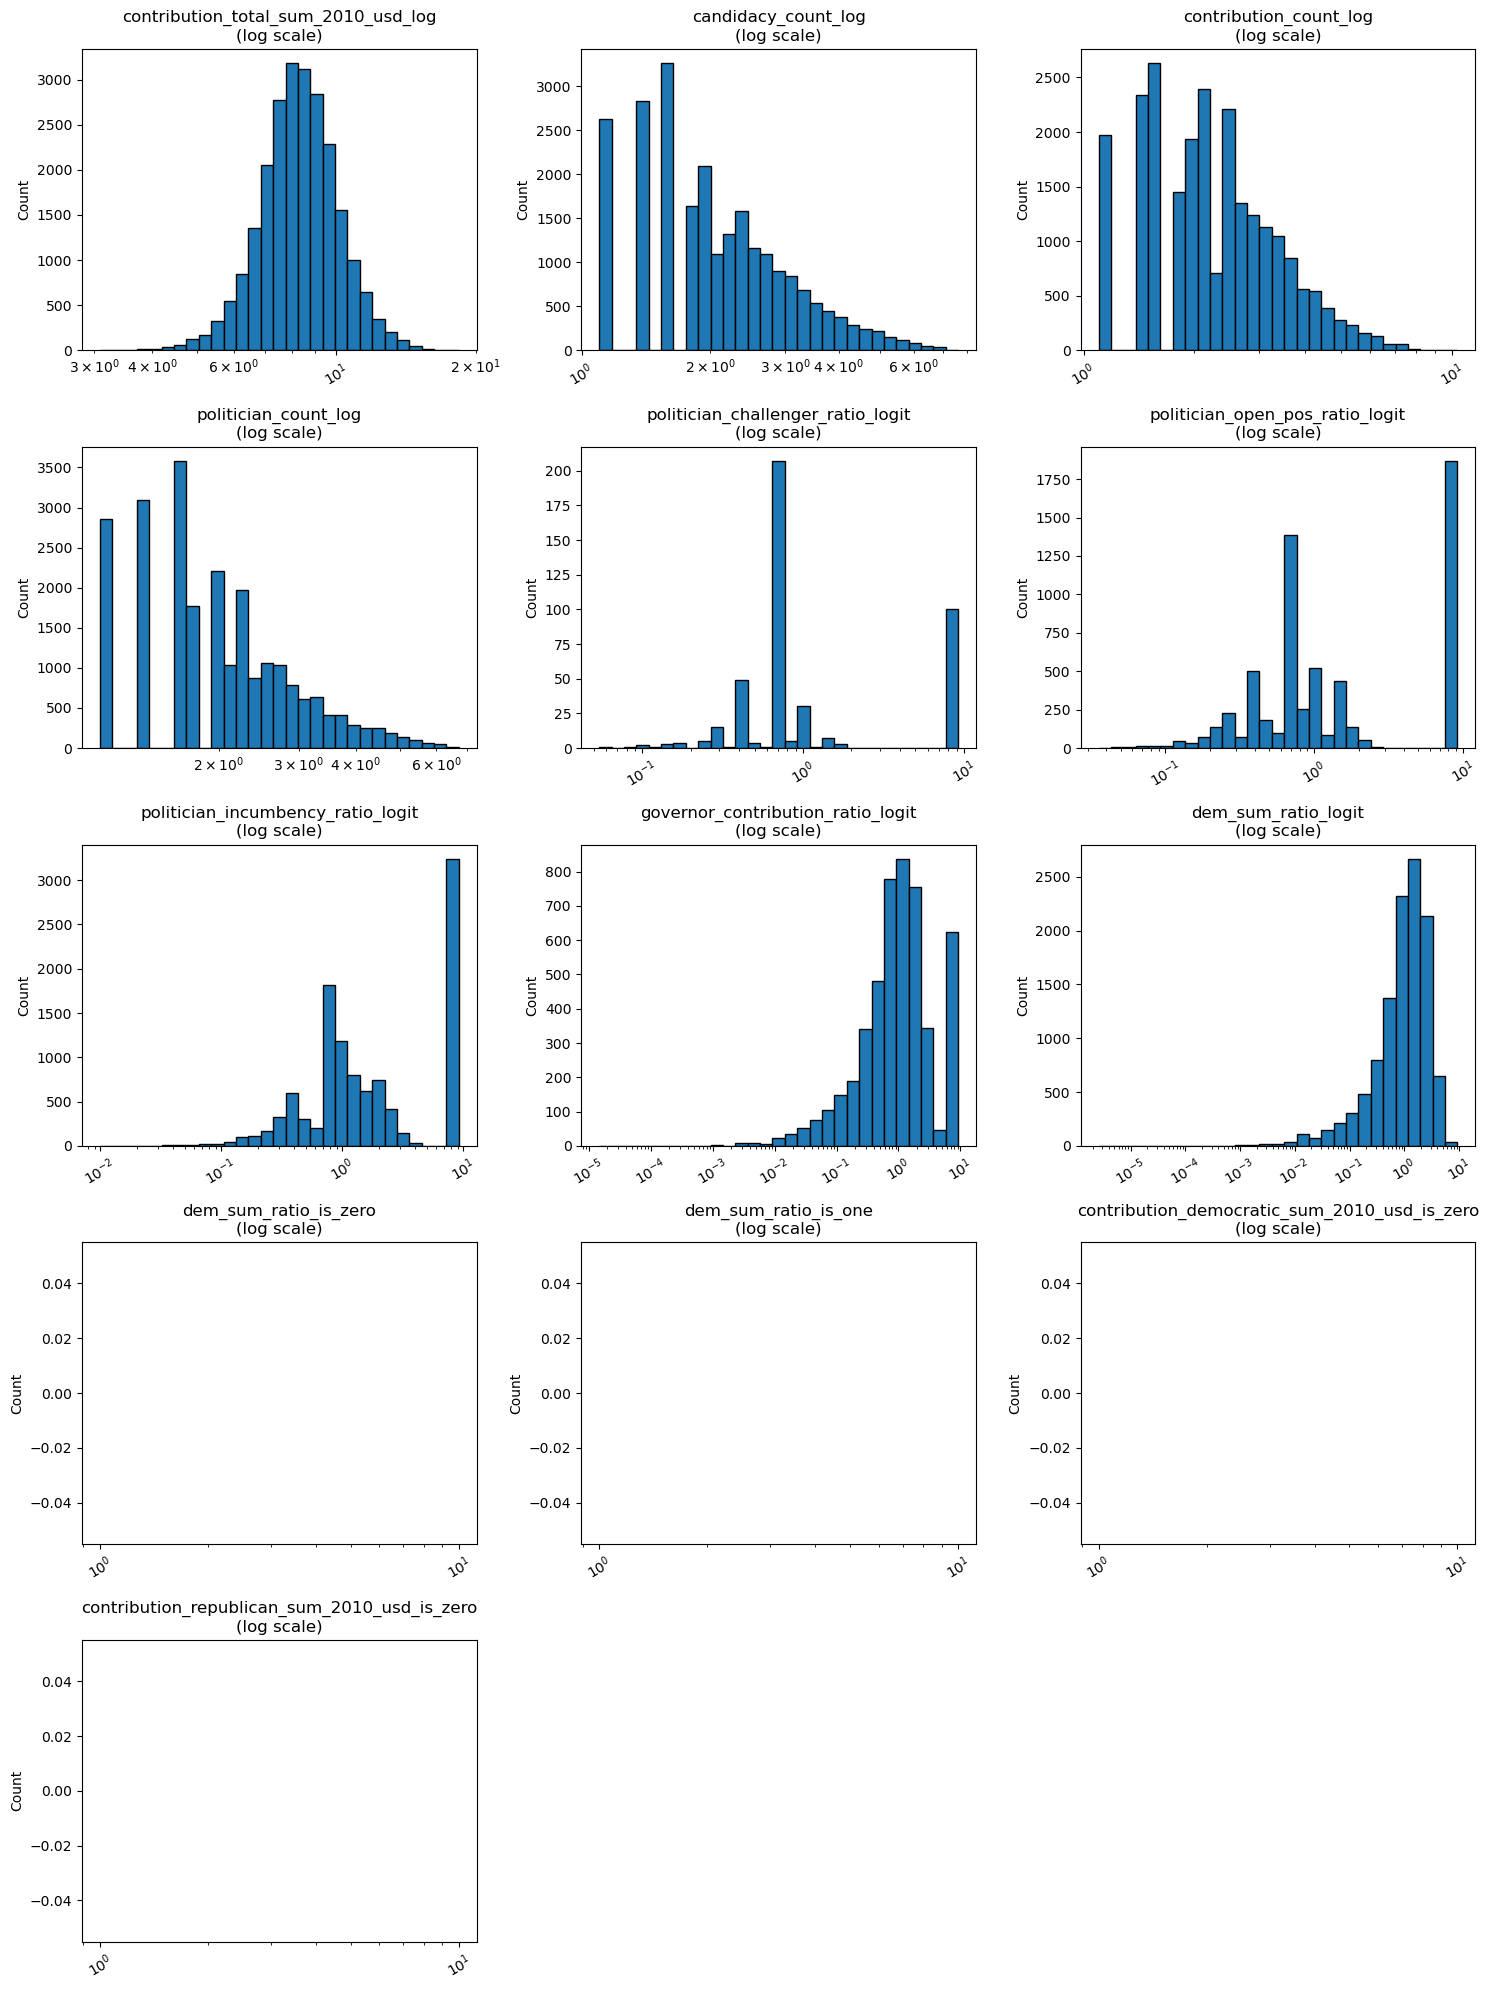

In [496]:
num_cols = [
    # scaled log‑counts & money magnitude
    "contribution_total_sum_2010_usd_log",
    "candidacy_count_log",
    "contribution_count_log",
    "politician_count_log",
    # logit ratios
    "politician_challenger_ratio_logit",
    "politician_open_pos_ratio_logit",
    "politician_incumbency_ratio_logit",
    "governor_contribution_ratio_logit",
    "dem_sum_ratio_logit",
    # binary flags (treat as numeric 0/1)
    "dem_sum_ratio_is_zero", "dem_sum_ratio_is_one",
    "contribution_democratic_sum_2010_usd_is_zero",
    "contribution_republican_sum_2010_usd_is_zero",
]
plot_histograms(train, num_cols, bins=30, cols_per_row=3, figsize=(15, 4), wide_range_factor=100)

In [500]:
train.columns

Index(['state', 'contributor_type', 'contribution_sum_2010_usd',
       'general_sector_new', 'politician_challenger_ratio_is_zero',
       'politician_challenger_ratio_is_one',
       'politician_challenger_ratio_logit',
       'politician_open_pos_ratio_is_zero', 'politician_open_pos_ratio_is_one',
       'politician_open_pos_ratio_logit',
       'politician_incumbency_ratio_is_zero',
       'politician_incumbency_ratio_is_one',
       'politician_incumbency_ratio_logit',
       'governor_contribution_ratio_is_zero',
       'governor_contribution_ratio_is_one',
       'governor_contribution_ratio_logit',
       'contribution_total_sum_2010_usd_log',
       'contribution_democratic_sum_2010_usd_is_zero',
       'contribution_republican_sum_2010_usd_is_zero', 'dem_sum_ratio_is_zero',
       'dem_sum_ratio_is_one', 'rep_sum_ratio_is_zero', 'rep_sum_ratio_is_one',
       'dem_sum_ratio_logit', 'candidacy_count_log', 'contribution_count_log',
       'politician_count_log'],
      dtype='o

In [499]:
from sklearn.compose       import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
import numpy as np
import joblib, time, os


time0 = time.perf_counter()
msg   = lambda s: print(f"[{time.perf_counter()-time0:6.1f}s] {s}")


# 1) Define your column groups
count_cols   = ["candidacy_count_log", "contribution_count_log", "politician_count_log"]
money_cols   = ["contribution_total_sum_2010_usd"]
ratio_cols   = [
    "politician_challenger_ratio_logit",
    "politician_open_pos_ratio_logit",
    "politician_incumbency_ratio_logit",
    "governor_contribution_ratio_logit",
    "dem_sum_ratio_logit"
]
binary_cols  = [
    "dem_sum_ratio_is_zero", "dem_sum_ratio_is_one",
    "contribution_democratic_sum_2010_usd_is_zero",
    "contribution_republican_sum_2010_usd_is_zero"
]
cat_cols     = ["state", "contributor_type", "general_sector_new"]

# 2) Build sub‐pipelines
#  – log+scale for truly continuous skewed features
cont_pre = Pipeline([
    ("log1p",    FunctionTransformer(np.log1p, validate=False)),
    ("scale",    StandardScaler())
])

# No transformer needed for binary flags or ratios
#  – ratios already in logit‐space, we can scale those if we like
ratio_pre = StandardScaler()  # optional: you can also passthrough these

# 3) Put it together
pre = ColumnTransformer([
    ("cont",   cont_pre,   count_cols + money_cols),
    ("ratio",  ratio_pre,  ratio_cols),
    ("binary", "passthrough", binary_cols),
    ("cat",    OneHotEncoder(handle_unknown="ignore"), cat_cols),
], remainder="drop")

# 4) Fit & transform
X_tr_pre  = pre.fit_transform(X_tr)
X_val_pre = pre.transform(X_val)

msg(f"Pre‑processed shapes  train: {X_tr_pre.shape}   val: {X_val_pre.shape}")

input_dim = X_tr_pre.shape[1]

# ╔════════════════════════════════════════════════════════════════════╗
# 3 · BUILD & TRAIN KERAS MODEL
# ╚════════════════════════════════════════════════════════════════════╝
def build_model(dim):
    model = models.Sequential([
        layers.Input(shape=(dim,)),
        layers.Dense(128, activation="relu"),
        layers.Dense(64,  activation="relu"),
        layers.Dense(1,   activation="linear")
    ])
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
        loss="mse",
        metrics=["mse"]
    )
    return model

nn = build_model(input_dim)

early = callbacks.EarlyStopping(patience=10, restore_best_weights=True)

msg("Fitting neural network …")
hist = nn.fit(
    X_tr_pre, y_tr,
    validation_data=(X_val_pre, y_val),
    epochs=200,
    batch_size=512,
    callbacks=[early],
    verbose=0
)

mse_tr  = nn.evaluate(X_tr_pre,  y_tr,  verbose=0)[1]
mse_val = nn.evaluate(X_val_pre, y_val, verbose=0)[1]
msg(f"NN finished   MSE train/val = {mse_tr:.4f} / {mse_val:.4f}")

# ╔════════════════════════════════════════════════════════════════════╗
# 4 · SAVE PREPROCESSOR + MODEL
# ╚════════════════════════════════════════════════════════════════════╝
os.makedirs("nn_model", exist_ok=True)
nn.save("nn_model/keras_regressor")
joblib.dump(pre, "nn_model/preprocessor.pkl")
msg("Saved → nn_model/keras_regressor  and  nn_model/preprocessor.pkl")

# ╔════════════════════════════════════════════════════════════════════╗
# 5 · QUICK DIAGNOSTIC PLOT
# ╚════════════════════════════════════════════════════════════════════╝
import matplotlib.pyplot as plt
y_val_pred = nn.predict(X_val_pre, verbose=0).squeeze()

plt.figure(figsize=(5,5))
plt.scatter(y_val, y_val_pred, alpha=0.25, s=12)
plt.plot([0,1],[0,1],"k--")
plt.title(f"NN validation (MSE={mse_val:.4f})")
plt.xlabel("Actual winner_ratio"); plt.ylabel("Predicted")
plt.tight_layout(); plt.show()


ValueError: A given column is not a column of the dataframe

[   0.0s] Pre‑processed shapes  train: (18935, 67)   val: (4734, 67)
[   0.1s] Fitting neural network …
Epoch 1/200
33/37 [=========================>....] - ETA: 0s - loss: 0.1148 - mse: 0.1148

2025-04-18 22:24:22.370943: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


37/37 [==============================] - 0s 7ms/step - loss: 0.1088 - mse: 0.1088 - val_loss: 0.0589 - val_mse: 0.0589
Epoch 2/200
35/37 [===========================>..] - ETA: 0s - loss: 0.0505 - mse: 0.0505

2025-04-18 22:24:22.647249: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


37/37 [==============================] - 0s 4ms/step - loss: 0.0503 - mse: 0.0503 - val_loss: 0.0490 - val_mse: 0.0490
Epoch 3/200
37/37 [==============================] - 0s 4ms/step - loss: 0.0445 - mse: 0.0445 - val_loss: 0.0462 - val_mse: 0.0462
Epoch 4/200
37/37 [==============================] - 0s 4ms/step - loss: 0.0418 - mse: 0.0418 - val_loss: 0.0446 - val_mse: 0.0446
Epoch 5/200
37/37 [==============================] - 0s 4ms/step - loss: 0.0404 - mse: 0.0404 - val_loss: 0.0437 - val_mse: 0.0437
Epoch 6/200
37/37 [==============================] - 0s 4ms/step - loss: 0.0393 - mse: 0.0393 - val_loss: 0.0429 - val_mse: 0.0429
Epoch 7/200
37/37 [==============================] - 0s 4ms/step - loss: 0.0385 - mse: 0.0385 - val_loss: 0.0427 - val_mse: 0.0427
Epoch 8/200
37/37 [==============================] - 0s 4ms/step - loss: 0.0378 - mse: 0.0378 - val_loss: 0.0424 - val_mse: 0.0424
Epoch 9/200
37/37 [==============================] - 0s 4ms/step - loss: 0.0373 - mse: 0.0373 -

2025-04-18 22:24:29.045808: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


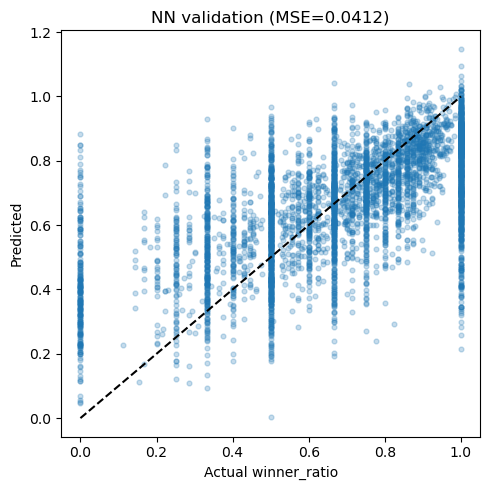

In [502]:
# ╔════════════════════════════════════════════════════════════════════╗
# 0 · IMPORTS & BASIC SET‑UP
# ╚════════════════════════════════════════════════════════════════════╝
import os
import time
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection   import train_test_split
from sklearn.preprocessing     import OneHotEncoder, StandardScaler
from sklearn.compose           import ColumnTransformer
from sklearn.metrics           import mean_squared_error

import tensorflow as tf
from tensorflow.keras import layers, models, callbacks

time0 = time.perf_counter()
msg   = lambda s: print(f"[{time.perf_counter()-time0:6.1f}s] {s}")

# assume `train_bkp` is your original DataFrame
train = train_bkp.copy()

# ╔════════════════════════════════════════════════════════════════════╗
# 1 · DEFINE FINAL FEATURE SETS
# ╚════════════════════════════════════════════════════════════════════╝
cat_cols = ["state", "contributor_type", "general_sector_new"]

cont_cols = [
    "contribution_total_sum_2010_usd_log",
    "candidacy_count_log",
    "contribution_count_log",
    "politician_count_log"
]

ratio_cols = [
    "politician_challenger_ratio_logit",
    "politician_open_pos_ratio_logit",
    "politician_incumbency_ratio_logit",
    "governor_contribution_ratio_logit",
    "dem_sum_ratio_logit",
]

binary_cols = [
    "dem_sum_ratio_is_zero", "dem_sum_ratio_is_one",
    "contribution_democratic_sum_2010_usd_is_zero",
    "contribution_republican_sum_2010_usd_is_zero",
]

target = "winner_ratio"

# ╔════════════════════════════════════════════════════════════════════╗
# 2 · SPLIT TRAIN / VAL,  BUILD PREPROCESSOR
# ╚════════════════════════════════════════════════════════════════════╝
y = train.pop(target).astype("float32")
X = train.copy()

X_tr, X_val, y_tr, y_val = train_test_split(
    X, y, test_size=0.20, random_state=42
)

pre = ColumnTransformer([
    # scale continuous logs
    ("cont",   StandardScaler(), cont_cols),
    # scale logit ratios
    ("ratio",  StandardScaler(), ratio_cols),
    # leave binary flags as 0/1
    ("bin",    "passthrough",     binary_cols),
    # one‑hot encode categoricals
    ("cat",    OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_cols),
], remainder="drop")

# fit & transform
X_tr_pre  = pre.fit_transform(X_tr)
X_val_pre = pre.transform(X_val)

msg(f"Pre‑processed shapes  train: {X_tr_pre.shape}   val: {X_val_pre.shape}")

input_dim = X_tr_pre.shape[1]

# ╔════════════════════════════════════════════════════════════════════╗
# 3 · BUILD & TRAIN KERAS MODEL (with progress)
# ╚════════════════════════════════════════════════════════════════════╝
def build_model(dim):
    model = models.Sequential([
        layers.Input(shape=(dim,)),
        layers.Dense(128, activation="relu"),
        layers.Dense(64,  activation="relu"),
        layers.Dense(1,   activation="linear")
    ])
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
        loss="mse",
        metrics=["mse"]
    )
    return model

nn = build_model(input_dim)

early = callbacks.EarlyStopping(patience=30, restore_best_weights=True)

msg("Fitting neural network …")
hist = nn.fit(
    X_tr_pre, y_tr,
    validation_data=(X_val_pre, y_val),
    epochs=200,
    batch_size=512,
    callbacks=[early],
    verbose=1            # show per‑epoch progress
)

mse_tr  = nn.evaluate(X_tr_pre,  y_tr,  verbose=0)[1]
mse_val = nn.evaluate(X_val_pre, y_val, verbose=0)[1]
msg(f"NN finished   MSE train/val = {mse_tr:.4f} / {mse_val:.4f}")

# ╔════════════════════════════════════════════════════════════════════╗
# 4 · SAVE PREPROCESSOR + MODEL
# ╚════════════════════════════════════════════════════════════════════╝
os.makedirs("nn_model", exist_ok=True)
nn.save("nn_model/keras_regressor")
joblib.dump(pre, "nn_model/preprocessor.pkl")
msg("Saved → nn_model/keras_regressor  and  nn_model/preprocessor.pkl")

# ╔════════════════════════════════════════════════════════════════════╗
# 5 · QUICK DIAGNOSTIC PLOT
# ╚════════════════════════════════════════════════════════════════════╝
y_val_pred = nn.predict(X_val_pre, verbose=0).squeeze()

plt.figure(figsize=(5,5))
plt.scatter(y_val, y_val_pred, alpha=0.25, s=12)
plt.plot([0,1],[0,1],"k--")
plt.title(f"NN validation (MSE={mse_val:.4f})")
plt.xlabel("Actual winner_ratio"); plt.ylabel("Predicted")
plt.tight_layout(); plt.show()


### NN model with custom #Neurons, #Hidden Layers, etc.

Your GPU may run slowly with dtype policy mixed_float16 because it does not have compute capability of at least 7.0. Your GPU:
  METAL, no compute capability (probably not an Nvidia GPU)
See https://developer.nvidia.com/cuda-gpus for a list of GPUs and their compute capabilities.
If you will use compatible GPU(s) not attached to this host, e.g. by running a multi-worker model, you can ignore this warning. This message will only be logged once
[Mixed precision enabled] (dtype=float16)
[GPU setup error: Physical devices cannot be modified after being initialized] (dtype=float16)
[   0.0s] Data split complete
[   0.0s] Preprocessed shapes → train: (18935, 67), val: (4734, 67)
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 256)               17408     
                                                                 
 batch_normalization (BatchN  (N

2025-04-18 22:29:24.717465: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


74/74 [==============================] - ETA: 0s - loss: 0.5074 - mse: 0.5074

2025-04-18 22:29:27.106659: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


74/74 [==============================] - 3s 24ms/step - loss: 0.5074 - mse: 0.5074 - val_loss: 0.4410 - val_mse: 0.4410 - lr: 5.0000e-04
Epoch 2/300
74/74 [==============================] - 1s 18ms/step - loss: 0.4607 - mse: 0.4607 - val_loss: 0.4743 - val_mse: 0.4743 - lr: 5.0000e-04
Epoch 3/300
74/74 [==============================] - 1s 18ms/step - loss: 0.4178 - mse: 0.4178 - val_loss: 13.3477 - val_mse: 13.3477 - lr: 5.0000e-04
Epoch 4/300
74/74 [==============================] - 1s 19ms/step - loss: 0.3786 - mse: 0.3786 - val_loss: 340.0926 - val_mse: 340.0926 - lr: 5.0000e-04
Epoch 5/300
74/74 [==============================] - 1s 18ms/step - loss: 0.3427 - mse: 0.3427 - val_loss: 5740.7070 - val_mse: 5740.7070 - lr: 5.0000e-04
Epoch 6/300
74/74 [==============================] - 1s 18ms/step - loss: 0.3101 - mse: 0.3101 - val_loss: 73039.8984 - val_mse: 73039.8984 - lr: 5.0000e-04
Epoch 7/300
74/74 [==============================] - 1s 18ms/step - loss: 0.2874 - mse: 0.2874 - v

2025-04-18 22:29:52.771227: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


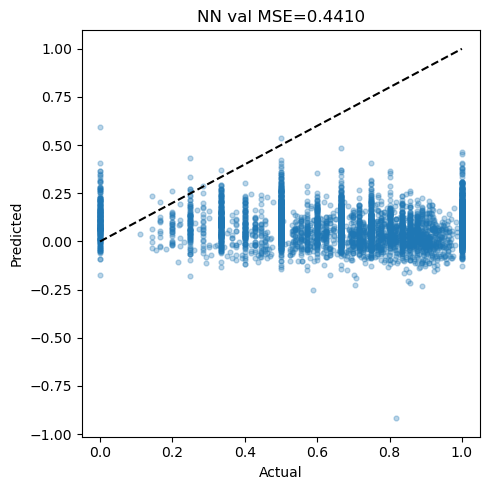

In [503]:
# ╔════════════════════════════════════════════════════════════════════╗
# 0 · IMPORTS & SETUP (with GPU & mixed precision)
# ╚════════════════════════════════════════════════════════════════════╝
import os, time, joblib
import numpy as np, pandas as pd, matplotlib.pyplot as plt

from sklearn.model_selection   import train_test_split
from sklearn.preprocessing     import OneHotEncoder, StandardScaler
from sklearn.compose           import ColumnTransformer
from sklearn.metrics           import mean_squared_error

import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
from tensorflow.keras.mixed_precision import Policy, set_global_policy

# enable mixed‑precision if available (speeds up Apple GPU)
try:
    policy = Policy('mixed_float16')
    set_global_policy(policy)
    compute_dtype = policy.compute_dtype
    msg = lambda s: print(f"[{s}] (dtype={compute_dtype})")
    msg("Mixed precision enabled")
except Exception:
    msg = lambda s: print(f"[{s}]")
    msg("Mixed precision not available, using default floats")

# ensure GPU memory growth
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        msg(f"Using GPU(s): {gpus}")
    except Exception as e:
        msg(f"GPU setup error: {e}")
else:
    msg("No GPU found, using CPU only")

time0 = time.perf_counter()

# ╔════════════════════════════════════════════════════════════════════╗
# 1 · DEFINE FEATURES & SPLIT
# ╚════════════════════════════════════════════════════════════════════╝
train = train_bkp.copy()
target = "winner_ratio"

cat_cols = ["state", "contributor_type", "general_sector_new"]
cont_cols = [
    "contribution_total_sum_2010_usd_log",
    "candidacy_count_log",
    "contribution_count_log",
    "politician_count_log"
]
ratio_cols = [
    "politician_challenger_ratio_logit",
    "politician_open_pos_ratio_logit",
    "politician_incumbency_ratio_logit",
    "governor_contribution_ratio_logit",
    "dem_sum_ratio_logit"
]
binary_cols = [
    "dem_sum_ratio_is_zero", "dem_sum_ratio_is_one",
    "contribution_democratic_sum_2010_usd_is_zero",
    "contribution_republican_sum_2010_usd_is_zero"
]

y = train.pop(target).astype('float32')
X = train.copy()

X_tr, X_val, y_tr, y_val = train_test_split(
    X, y, test_size=0.20, random_state=42
)
msg = lambda s: print(f"[{time.perf_counter()-time0:6.1f}s] {s}")
msg("Data split complete")

# ╔════════════════════════════════════════════════════════════════════╗
# 2 · PREPROCESSING: SCALE & ENCODE
# ╚════════════════════════════════════════════════════════════════════╝
pre = ColumnTransformer([
    ("cont",  StandardScaler(),      cont_cols),
    ("ratio", StandardScaler(),      ratio_cols),
    ("bin",   "passthrough",         binary_cols),
    ("cat",   OneHotEncoder(handle_unknown="ignore",
                            sparse_output=False), cat_cols),
], remainder="drop")

X_tr_pre  = pre.fit_transform(X_tr)
X_val_pre = pre.transform(X_val)
msg(f"Preprocessed shapes → train: {X_tr_pre.shape}, val: {X_val_pre.shape}")

input_dim = X_tr_pre.shape[1]

# ╔════════════════════════════════════════════════════════════════════╗
# 3 · BUILD A DEEPER DENSE NETWORK
# ╚════════════════════════════════════════════════════════════════════╝
def build_deep_model(dim):
    mdl = models.Sequential([
        layers.Input(shape=(dim,)),
        layers.Dense(256, activation="swish"),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        layers.Dense(128, activation="swish"),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        layers.Dense(64, activation="swish"),
        layers.BatchNormalization(),
        layers.Dropout(0.2),
        layers.Dense(32, activation="swish"),
        layers.BatchNormalization(),
        layers.Dropout(0.2),
        layers.Dense(1, activation="linear", dtype="float32")
    ])
    mdl.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=5e-4),
        loss="mse",
        metrics=["mse"]
    )
    return mdl

nn = build_deep_model(input_dim)
nn.summary()

# ╔════════════════════════════════════════════════════════════════════╗
# 4 · TRAIN WITH CALLBACKS & PROGRESS
# ╚════════════════════════════════════════════════════════════════════╝
early_stop = callbacks.EarlyStopping(
    monitor="val_loss", patience=PATIENCE, restore_best_weights=True
)
reduce_lr = callbacks.ReduceLROnPlateau(
    monitor="val_loss", factor=0.5, patience=PATIENCE, min_lr=1e-6
)

msg("Starting training …")
history = nn.fit(
    X_tr_pre, y_tr,
    validation_data=(X_val_pre, y_val),
    epochs=300,
    batch_size=256,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

# evaluate
mse_tr  = nn.evaluate(X_tr_pre,  y_tr,  verbose=0)[1]
mse_val = nn.evaluate(X_val_pre, y_val, verbose=0)[1]
msg(f"Training complete  MSE train/val = {mse_tr:.4f} / {mse_val:.4f}")

# ╔════════════════════════════════════════════════════════════════════╗
# 5 · SAVE PREPROCESSOR & MODEL
# ╚════════════════════════════════════════════════════════════════════╝
os.makedirs("nn_model", exist_ok=True)
nn.save("nn_model/keras_regressor")
joblib.dump(pre, "nn_model/preprocessor.pkl")
msg("Saved preprocessor + model to nn_model/")

# ╔════════════════════════════════════════════════════════════════════╗
# 6 · DIAGNOSTIC PLOT
# ╚════════════════════════════════════════════════════════════════════╝
y_val_pred = nn.predict(X_val_pre, verbose=0).squeeze()
plt.figure(figsize=(5,5))
plt.scatter(y_val, y_val_pred, alpha=0.3, s=12)
plt.plot([0,1],[0,1],"k--")
plt.title(f"NN val MSE={mse_val:.4f}")
plt.xlabel("Actual"); plt.ylabel("Predicted"); plt.tight_layout()
plt.show()


### NN Model Training before building deeper network

In [ ]:
cols = ['winner_ratio']
plot_histograms(df, cols, bins=30, cols_per_row=3, figsize=(15, 4), wide_range_factor=100):

In [516]:
# ╔════════════════════════════════════════════════════════════════════╗
# 0 · PREP  (logit–target + GridSearch)
# ╚════════════════════════════════════════════════════════════════════╝
import numpy as np, matplotlib.pyplot as plt
from tensorflow.keras        import layers, models, callbacks
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics         import mean_squared_error
import tensorflow as tf


# ---------------------------------------------------------
# 2 · train / validation split
# ---------------------------------------------------------
tick("Splitting 80/20 train–val")
X_tr, X_val, y_tr, y_val = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=None)

# ---------------------------------------------------------------------
# 1)  logit‑transform the target
# ---------------------------------------------------------------------
eps = 1e-6
y_tr_logit  = np.log((y_tr  + eps) / (1 - y_tr  + eps)).astype("float32")
y_val_logit = np.log((y_val + eps) / (1 - y_val + eps)).astype("float32")

# ---------------------------------------------------------------------
# 2)  model builder  (predicts logit → linear output)
# ---------------------------------------------------------------------
def build_model(n_hidden=1, n_units=64, lr=1e-3, dropout=0.1):
    m = models.Sequential()
    m.add(layers.Input(shape=(input_dim,)))
    for _ in range(n_hidden):
        m.add(layers.Dense(n_units, activation="relu"))
        if dropout > 0:
            m.add(layers.Dropout(dropout))
    m.add(layers.Dense(1, activation="linear"))         # ← logit
    opt = tf.keras.optimizers.Adam(learning_rate=lr, clipnorm=1.0)
    m.compile(loss="mse", optimizer=opt, metrics=["mse"])
    return m

# ---------------------------------------------------------------------
# 3)  wrap for scikit‑learn
# ---------------------------------------------------------------------
keras_reg = KerasRegressor(build_fn=build_model, verbose=1)

param_grid = {
    "n_hidden":   [1, 2],
    "n_units":    [32, 64, 128],
    "lr":         [1e-3, 1e-4],
    "dropout":    [0.0, 0.1, 0.2],
    "batch_size": [64, 128],
    "epochs":     [60]          # small so grid stays quick
}

early = callbacks.EarlyStopping(
    monitor="val_loss", patience=8, restore_best_weights=True
)

grid = GridSearchCV(
    estimator=keras_reg,
    param_grid=param_grid,
    scoring="neg_mean_squared_error",   # MSE in logit space
    cv=3,
    refit=True,
    verbose=1,
    n_jobs=1                            # keep serial to avoid pickling issues
)

# ---------------------------------------------------------------------
# 4)  fit
# ---------------------------------------------------------------------
grid.fit(
    X_tr_pre, y_tr_logit,
    validation_data=(X_val_pre, y_val_logit),
    callbacks=[early]
)

print("▶ Best params:", grid.best_params_)
print("▶ CV MSE (logit space):", -grid.best_score_)

# ---------------------------------------------------------------------
# 5)  evaluate on hold‑out in ORIGINAL scale
# ---------------------------------------------------------------------
best_net = grid.best_estimator_.model
y_val_pred_logit = best_net.predict(X_val_pre).squeeze()
y_val_pred       = 1 / (1 + np.exp(-y_val_pred_logit))     # inverse logit
mse_val = mean_squared_error(y_val, y_val_pred)
print(f"Validation MSE on original scale: {mse_val:.5f}")

# ---------------------------------------------------------------------
# 6)  scatter plot
# ---------------------------------------------------------------------
plt.figure(figsize=(5,5))
plt.scatter(y_val, y_val_pred, alpha=0.25, s=12)
plt.plot([0,1],[0,1],"k--")
plt.title(f"NN (logit target)  val MSE={mse_val:.5f}")
plt.xlabel("Actual winner_ratio"); plt.ylabel("Predicted")
plt.tight_layout(); plt.show()


Fitting 3 folds for each of 72 candidates, totalling 216 fits
Epoch 1/60


/var/folders/h5/yfvk0l4921v0kg94n8qt42wc0000gn/T/ipykernel_59575/566163411.py:36: DeprecationWarning:

KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.

2025-04-18 23:04:35.474349: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


198/198 [==============================] - ETA: 0s - loss: 45.0016 - mse: 45.0018

2025-04-18 23:04:37.187123: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


198/198 [==============================] - 2s 9ms/step - loss: 45.0016 - mse: 45.0018 - val_loss: 44.2427 - val_mse: 44.2445
Epoch 2/60
198/198 [==============================] - 1s 7ms/step - loss: 45.0030 - mse: 45.0018 - val_loss: 44.2427 - val_mse: 44.2445
Epoch 3/60
198/198 [==============================] - 1s 7ms/step - loss: 45.0006 - mse: 45.0018 - val_loss: 44.2427 - val_mse: 44.2445
Epoch 4/60
198/198 [==============================] - 1s 7ms/step - loss: 45.0003 - mse: 45.0018 - val_loss: 44.2427 - val_mse: 44.2445
Epoch 5/60
198/198 [==============================] - 1s 7ms/step - loss: 45.0016 - mse: 45.0018 - val_loss: 44.2427 - val_mse: 44.2445
Epoch 6/60
198/198 [==============================] - 1s 7ms/step - loss: 44.9995 - mse: 45.0018 - val_loss: 44.2427 - val_mse: 44.2445
Epoch 7/60
198/198 [==============================] - 1s 7ms/step - loss: 45.0021 - mse: 45.0018 - val_loss: 44.2427 - val_mse: 44.2445
Epoch 8/60
198/198 [==============================] - 1s 7m

2025-04-18 23:04:48.938842: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/60


2025-04-18 23:04:49.405815: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


198/198 [==============================] - ETA: 0s - loss: 45.0697 - mse: 45.0678

2025-04-18 23:04:51.887863: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


198/198 [==============================] - 3s 13ms/step - loss: 45.0697 - mse: 45.0678 - val_loss: 44.2427 - val_mse: 44.2445
Epoch 2/60
198/198 [==============================] - 1s 7ms/step - loss: 45.0683 - mse: 45.0678 - val_loss: 44.2427 - val_mse: 44.2445
Epoch 3/60
198/198 [==============================] - 2s 8ms/step - loss: 45.0674 - mse: 45.0678 - val_loss: 44.2427 - val_mse: 44.2445
Epoch 4/60
198/198 [==============================] - 1s 7ms/step - loss: 45.0680 - mse: 45.0678 - val_loss: 44.2427 - val_mse: 44.2445
Epoch 5/60
198/198 [==============================] - 1s 7ms/step - loss: 45.0684 - mse: 45.0678 - val_loss: 44.2427 - val_mse: 44.2445
Epoch 6/60
198/198 [==============================] - 1s 7ms/step - loss: 45.0681 - mse: 45.0678 - val_loss: 44.2427 - val_mse: 44.2445
Epoch 7/60
198/198 [==============================] - 2s 9ms/step - loss: 45.0687 - mse: 45.0678 - val_loss: 44.2427 - val_mse: 44.2445
Epoch 8/60
198/198 [==============================] - 2s 8

2025-04-18 23:05:04.377987: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/60


2025-04-18 23:05:04.819189: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


196/198 [============================>.] - ETA: 0s - loss: 45.3833 - mse: 45.3829

2025-04-18 23:05:06.403110: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


198/198 [==============================] - 2s 8ms/step - loss: 45.4287 - mse: 45.4285 - val_loss: 44.2427 - val_mse: 44.2445
Epoch 2/60
198/198 [==============================] - 2s 8ms/step - loss: 45.4276 - mse: 45.4285 - val_loss: 44.2427 - val_mse: 44.2445
Epoch 3/60
198/198 [==============================] - 2s 8ms/step - loss: 45.4302 - mse: 45.4285 - val_loss: 44.2427 - val_mse: 44.2445
Epoch 4/60
198/198 [==============================] - 2s 8ms/step - loss: 45.4278 - mse: 45.4285 - val_loss: 44.2427 - val_mse: 44.2445
Epoch 5/60
198/198 [==============================] - 2s 8ms/step - loss: 45.4293 - mse: 45.4285 - val_loss: 44.2427 - val_mse: 44.2445
Epoch 6/60
198/198 [==============================] - 2s 8ms/step - loss: 45.4295 - mse: 45.4285 - val_loss: 44.2427 - val_mse: 44.2445
Epoch 7/60
198/198 [==============================] - 1s 7ms/step - loss: 45.4285 - mse: 45.4285 - val_loss: 44.2427 - val_mse: 44.2445
Epoch 8/60
198/198 [==============================] - 1s 8m

2025-04-18 23:05:18.818131: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


99/99 [==============================] - 0s 2ms/step
Epoch 1/60


2025-04-18 23:05:19.353102: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


198/198 [==============================] - ETA: 0s - loss: 44.9855 - mse: 44.9855

2025-04-18 23:05:20.902409: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


198/198 [==============================] - 2s 8ms/step - loss: 44.9855 - mse: 44.9855 - val_loss: 44.2148 - val_mse: 44.2143
Epoch 2/60
198/198 [==============================] - 1s 7ms/step - loss: 44.9857 - mse: 44.9855 - val_loss: 44.2148 - val_mse: 44.2143
Epoch 3/60
198/198 [==============================] - 1s 7ms/step - loss: 44.9845 - mse: 44.9855 - val_loss: 44.2148 - val_mse: 44.2143
Epoch 4/60
198/198 [==============================] - 1s 8ms/step - loss: 44.9849 - mse: 44.9855 - val_loss: 44.2148 - val_mse: 44.2143
Epoch 5/60
198/198 [==============================] - 1s 7ms/step - loss: 44.9853 - mse: 44.9855 - val_loss: 44.2148 - val_mse: 44.2143
Epoch 6/60
198/198 [==============================] - 1s 7ms/step - loss: 44.9857 - mse: 44.9855 - val_loss: 44.2148 - val_mse: 44.2143
Epoch 7/60
198/198 [==============================] - 1s 7ms/step - loss: 44.9845 - mse: 44.9855 - val_loss: 44.2148 - val_mse: 44.2143
Epoch 8/60
198/198 [==============================] - 2s 8m

2025-04-18 23:05:32.931575: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/60


2025-04-18 23:05:33.344878: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


194/198 [============================>.] - ETA: 0s - loss: 44.9852 - mse: 44.9864

2025-04-18 23:05:34.866826: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


198/198 [==============================] - 2s 8ms/step - loss: 45.0052 - mse: 45.0065 - val_loss: 44.2148 - val_mse: 44.2143
Epoch 2/60
198/198 [==============================] - 2s 8ms/step - loss: 45.0090 - mse: 45.0065 - val_loss: 44.2148 - val_mse: 44.2143
Epoch 3/60
198/198 [==============================] - 1s 7ms/step - loss: 45.0054 - mse: 45.0065 - val_loss: 44.2148 - val_mse: 44.2143
Epoch 4/60
198/198 [==============================] - 1s 7ms/step - loss: 45.0068 - mse: 45.0065 - val_loss: 44.2148 - val_mse: 44.2143
Epoch 5/60
198/198 [==============================] - 1s 7ms/step - loss: 45.0059 - mse: 45.0065 - val_loss: 44.2148 - val_mse: 44.2143
Epoch 6/60
198/198 [==============================] - 1s 7ms/step - loss: 45.0071 - mse: 45.0065 - val_loss: 44.2148 - val_mse: 44.2143
Epoch 7/60
198/198 [==============================] - 1s 7ms/step - loss: 45.0077 - mse: 45.0065 - val_loss: 44.2148 - val_mse: 44.2143
Epoch 8/60
198/198 [==============================] - 1s 7m

2025-04-18 23:05:46.337989: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/60


2025-04-18 23:05:46.750101: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


194/198 [============================>.] - ETA: 0s - loss: 45.4195 - mse: 45.4211

2025-04-18 23:05:48.214880: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


198/198 [==============================] - 2s 8ms/step - loss: 45.4105 - mse: 45.4121 - val_loss: 44.2148 - val_mse: 44.2143
Epoch 2/60
198/198 [==============================] - 1s 7ms/step - loss: 45.4111 - mse: 45.4122 - val_loss: 44.2148 - val_mse: 44.2143
Epoch 3/60
198/198 [==============================] - 1s 7ms/step - loss: 45.4106 - mse: 45.4121 - val_loss: 44.2148 - val_mse: 44.2143
Epoch 4/60
198/198 [==============================] - 1s 7ms/step - loss: 45.4123 - mse: 45.4121 - val_loss: 44.2148 - val_mse: 44.2143
Epoch 5/60
198/198 [==============================] - 1s 7ms/step - loss: 45.4107 - mse: 45.4122 - val_loss: 44.2148 - val_mse: 44.2143
Epoch 6/60
198/198 [==============================] - 1s 6ms/step - loss: 45.4106 - mse: 45.4122 - val_loss: 44.2148 - val_mse: 44.2143
Epoch 7/60
198/198 [==============================] - 1s 7ms/step - loss: 45.4119 - mse: 45.4122 - val_loss: 44.2148 - val_mse: 44.2143
Epoch 8/60
198/198 [==============================] - 1s 7m

2025-04-18 23:05:59.529611: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/60


2025-04-18 23:05:59.939046: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


196/198 [============================>.] - ETA: 0s - loss: 46.2343 - mse: 46.2351

2025-04-18 23:06:01.517746: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


198/198 [==============================] - 2s 8ms/step - loss: 46.1753 - mse: 46.1760 - val_loss: 45.3371 - val_mse: 45.3354
Epoch 2/60
198/198 [==============================] - 2s 8ms/step - loss: 46.1767 - mse: 46.1760 - val_loss: 45.3371 - val_mse: 45.3354
Epoch 3/60
198/198 [==============================] - 2s 8ms/step - loss: 46.1745 - mse: 46.1760 - val_loss: 45.3371 - val_mse: 45.3354
Epoch 4/60
198/198 [==============================] - 1s 7ms/step - loss: 46.1753 - mse: 46.1760 - val_loss: 45.3371 - val_mse: 45.3354
Epoch 5/60
198/198 [==============================] - 1s 7ms/step - loss: 46.1771 - mse: 46.1760 - val_loss: 45.3371 - val_mse: 45.3354
Epoch 6/60
198/198 [==============================] - 2s 9ms/step - loss: 46.1761 - mse: 46.1760 - val_loss: 45.3371 - val_mse: 45.3354
Epoch 7/60
198/198 [==============================] - 2s 8ms/step - loss: 46.1735 - mse: 46.1760 - val_loss: 45.3371 - val_mse: 45.3354
Epoch 8/60
198/198 [==============================] - 2s 8m

2025-04-18 23:06:14.109943: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/60


2025-04-18 23:06:14.598910: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


193/198 [============================>.] - ETA: 0s - loss: 46.1806 - mse: 46.1806

2025-04-18 23:06:16.204056: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


198/198 [==============================] - 2s 8ms/step - loss: 46.1999 - mse: 46.1997 - val_loss: 45.3371 - val_mse: 45.3354
Epoch 2/60
198/198 [==============================] - 2s 8ms/step - loss: 46.2014 - mse: 46.1997 - val_loss: 45.3371 - val_mse: 45.3354
Epoch 3/60
198/198 [==============================] - 1s 7ms/step - loss: 46.1998 - mse: 46.1997 - val_loss: 45.3371 - val_mse: 45.3354
Epoch 4/60
198/198 [==============================] - 2s 8ms/step - loss: 46.1982 - mse: 46.1997 - val_loss: 45.3371 - val_mse: 45.3354
Epoch 5/60
198/198 [==============================] - 2s 8ms/step - loss: 46.1994 - mse: 46.1997 - val_loss: 45.3371 - val_mse: 45.3354
Epoch 6/60
198/198 [==============================] - 1s 7ms/step - loss: 46.1975 - mse: 46.1997 - val_loss: 45.3371 - val_mse: 45.3354
Epoch 7/60
198/198 [==============================] - 1s 8ms/step - loss: 46.2010 - mse: 46.1997 - val_loss: 45.3371 - val_mse: 45.3354
Epoch 8/60
198/198 [==============================] - 2s 8m

2025-04-18 23:06:28.606455: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/60


2025-04-18 23:06:29.025230: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


196/198 [============================>.] - ETA: 0s - loss: 46.6445 - mse: 46.6437

2025-04-18 23:06:30.561920: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


198/198 [==============================] - 2s 8ms/step - loss: 46.6153 - mse: 46.6145 - val_loss: 45.3371 - val_mse: 45.3354
Epoch 2/60
198/198 [==============================] - 2s 9ms/step - loss: 46.6142 - mse: 46.6145 - val_loss: 45.3371 - val_mse: 45.3354
Epoch 3/60
198/198 [==============================] - 1s 7ms/step - loss: 46.6132 - mse: 46.6145 - val_loss: 45.3371 - val_mse: 45.3354
Epoch 4/60
198/198 [==============================] - 2s 8ms/step - loss: 46.6132 - mse: 46.6145 - val_loss: 45.3371 - val_mse: 45.3354
Epoch 5/60
198/198 [==============================] - 2s 8ms/step - loss: 46.6162 - mse: 46.6145 - val_loss: 45.3371 - val_mse: 45.3354
Epoch 6/60
198/198 [==============================] - 2s 8ms/step - loss: 46.6145 - mse: 46.6145 - val_loss: 45.3371 - val_mse: 45.3354
Epoch 7/60
198/198 [==============================] - 1s 7ms/step - loss: 46.6141 - mse: 46.6145 - val_loss: 45.3371 - val_mse: 45.3354
Epoch 8/60
198/198 [==============================] - 1s 7m

2025-04-18 23:06:43.141122: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/60


2025-04-18 23:06:43.626801: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


195/198 [============================>.] - ETA: 0s - loss: 44.7596 - mse: 44.7611

2025-04-18 23:06:45.372749: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


198/198 [==============================] - 2s 9ms/step - loss: 44.7085 - mse: 44.7101 - val_loss: 44.0982 - val_mse: 44.0995
Epoch 2/60
198/198 [==============================] - 2s 8ms/step - loss: 44.7075 - mse: 44.7101 - val_loss: 44.0982 - val_mse: 44.0995
Epoch 3/60
198/198 [==============================] - 2s 8ms/step - loss: 44.7095 - mse: 44.7101 - val_loss: 44.0982 - val_mse: 44.0995
Epoch 4/60
198/198 [==============================] - 2s 8ms/step - loss: 44.7078 - mse: 44.7101 - val_loss: 44.0982 - val_mse: 44.0995
Epoch 5/60
198/198 [==============================] - 1s 7ms/step - loss: 44.7076 - mse: 44.7101 - val_loss: 44.0982 - val_mse: 44.0995
Epoch 6/60
198/198 [==============================] - 1s 7ms/step - loss: 44.7071 - mse: 44.7101 - val_loss: 44.0982 - val_mse: 44.0995
Epoch 7/60
198/198 [==============================] - 1s 7ms/step - loss: 44.7106 - mse: 44.7101 - val_loss: 44.0982 - val_mse: 44.0995
Epoch 8/60
198/198 [==============================] - 1s 8m

2025-04-18 23:06:57.845582: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/60


2025-04-18 23:06:58.298690: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


198/198 [==============================] - ETA: 0s - loss: 44.7255 - mse: 44.7276

2025-04-18 23:07:00.101221: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


198/198 [==============================] - 2s 9ms/step - loss: 44.7255 - mse: 44.7276 - val_loss: 44.0982 - val_mse: 44.0995
Epoch 2/60
198/198 [==============================] - 2s 8ms/step - loss: 44.7256 - mse: 44.7276 - val_loss: 44.0982 - val_mse: 44.0995
Epoch 3/60
198/198 [==============================] - 2s 8ms/step - loss: 44.7270 - mse: 44.7276 - val_loss: 44.0982 - val_mse: 44.0995
Epoch 4/60
198/198 [==============================] - 2s 9ms/step - loss: 44.7279 - mse: 44.7276 - val_loss: 44.0982 - val_mse: 44.0995
Epoch 5/60
198/198 [==============================] - 2s 8ms/step - loss: 44.7263 - mse: 44.7276 - val_loss: 44.0982 - val_mse: 44.0995
Epoch 6/60
198/198 [==============================] - 1s 7ms/step - loss: 44.7274 - mse: 44.7276 - val_loss: 44.0982 - val_mse: 44.0995
Epoch 7/60
198/198 [==============================] - 1s 7ms/step - loss: 44.7258 - mse: 44.7276 - val_loss: 44.0982 - val_mse: 44.0995
Epoch 8/60
198/198 [==============================] - 2s 8m

2025-04-18 23:07:13.036233: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/60


2025-04-18 23:07:13.487183: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


198/198 [==============================] - ETA: 0s - loss: 45.1730 - mse: 45.1724

2025-04-18 23:07:15.343402: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


198/198 [==============================] - 2s 10ms/step - loss: 45.1730 - mse: 45.1724 - val_loss: 44.0982 - val_mse: 44.0995
Epoch 2/60
198/198 [==============================] - 2s 9ms/step - loss: 45.1712 - mse: 45.1724 - val_loss: 44.0982 - val_mse: 44.0995
Epoch 3/60
198/198 [==============================] - 2s 8ms/step - loss: 45.1719 - mse: 45.1724 - val_loss: 44.0982 - val_mse: 44.0995
Epoch 4/60
198/198 [==============================] - 2s 8ms/step - loss: 45.1705 - mse: 45.1724 - val_loss: 44.0982 - val_mse: 44.0995
Epoch 5/60
198/198 [==============================] - 2s 8ms/step - loss: 45.1716 - mse: 45.1724 - val_loss: 44.0982 - val_mse: 44.0995
Epoch 6/60
198/198 [==============================] - 2s 8ms/step - loss: 45.1699 - mse: 45.1724 - val_loss: 44.0982 - val_mse: 44.0995
Epoch 7/60
198/198 [==============================] - 2s 9ms/step - loss: 45.1719 - mse: 45.1724 - val_loss: 44.0982 - val_mse: 44.0995
Epoch 8/60
198/198 [==============================] - 2s 8

2025-04-18 23:07:28.967838: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/60


2025-04-18 23:07:29.462686: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


193/198 [============================>.] - ETA: 0s - loss: 46.6185 - mse: 46.6167

2025-04-18 23:07:31.418697: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


198/198 [==============================] - 2s 10ms/step - loss: 46.6546 - mse: 46.6528 - val_loss: 45.9690 - val_mse: 45.9679
Epoch 2/60
198/198 [==============================] - 2s 8ms/step - loss: 46.6555 - mse: 46.6528 - val_loss: 45.9690 - val_mse: 45.9679
Epoch 3/60
198/198 [==============================] - 2s 8ms/step - loss: 46.6531 - mse: 46.6528 - val_loss: 45.9690 - val_mse: 45.9679
Epoch 4/60
198/198 [==============================] - 2s 9ms/step - loss: 46.6542 - mse: 46.6528 - val_loss: 45.9690 - val_mse: 45.9679
Epoch 5/60
198/198 [==============================] - 1s 8ms/step - loss: 46.6537 - mse: 46.6528 - val_loss: 45.9690 - val_mse: 45.9679
Epoch 6/60
198/198 [==============================] - 2s 9ms/step - loss: 46.6534 - mse: 46.6528 - val_loss: 45.9690 - val_mse: 45.9679
Epoch 7/60
198/198 [==============================] - 2s 8ms/step - loss: 46.6529 - mse: 46.6528 - val_loss: 45.9690 - val_mse: 45.9679
Epoch 8/60
198/198 [==============================] - 2s 9

2025-04-18 23:07:45.057711: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/60


2025-04-18 23:07:46.744220: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


198/198 [==============================] - ETA: 0s - loss: 46.7855 - mse: 46.7843

2025-04-18 23:07:48.718973: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


198/198 [==============================] - 4s 10ms/step - loss: 46.7855 - mse: 46.7843 - val_loss: 45.9690 - val_mse: 45.9679
Epoch 2/60
198/198 [==============================] - 2s 10ms/step - loss: 46.7837 - mse: 46.7843 - val_loss: 45.9690 - val_mse: 45.9679
Epoch 3/60
198/198 [==============================] - 2s 9ms/step - loss: 46.7851 - mse: 46.7843 - val_loss: 45.9690 - val_mse: 45.9679
Epoch 4/60
198/198 [==============================] - 2s 9ms/step - loss: 46.7858 - mse: 46.7843 - val_loss: 45.9690 - val_mse: 45.9679
Epoch 5/60
198/198 [==============================] - 2s 9ms/step - loss: 46.7858 - mse: 46.7843 - val_loss: 45.9690 - val_mse: 45.9679
Epoch 6/60
198/198 [==============================] - 2s 9ms/step - loss: 46.7861 - mse: 46.7843 - val_loss: 45.9690 - val_mse: 45.9679
Epoch 7/60
198/198 [==============================] - 2s 8ms/step - loss: 46.7854 - mse: 46.7843 - val_loss: 45.9690 - val_mse: 45.9679
Epoch 8/60
198/198 [==============================] - 2s 

2025-04-18 23:08:03.903719: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/60


2025-04-18 23:08:04.396512: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


197/198 [============================>.] - ETA: 0s - loss: 47.2081 - mse: 47.2087

2025-04-18 23:08:06.203046: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


198/198 [==============================] - 2s 9ms/step - loss: 47.1803 - mse: 47.1808 - val_loss: 45.9690 - val_mse: 45.9679
Epoch 2/60
198/198 [==============================] - 2s 8ms/step - loss: 47.1818 - mse: 47.1808 - val_loss: 45.9690 - val_mse: 45.9679
Epoch 3/60
198/198 [==============================] - 2s 8ms/step - loss: 47.1808 - mse: 47.1808 - val_loss: 45.9690 - val_mse: 45.9679
Epoch 4/60
198/198 [==============================] - 2s 8ms/step - loss: 47.1820 - mse: 47.1808 - val_loss: 45.9690 - val_mse: 45.9679
Epoch 5/60
198/198 [==============================] - 2s 9ms/step - loss: 47.1812 - mse: 47.1808 - val_loss: 45.9690 - val_mse: 45.9679
Epoch 6/60
198/198 [==============================] - 2s 9ms/step - loss: 47.1821 - mse: 47.1808 - val_loss: 45.9690 - val_mse: 45.9679
Epoch 7/60
198/198 [==============================] - 2s 8ms/step - loss: 47.1815 - mse: 47.1808 - val_loss: 45.9690 - val_mse: 45.9679
Epoch 8/60
198/198 [==============================] - 2s 8m

2025-04-18 23:08:19.793615: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/60


2025-04-18 23:08:20.307930: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


196/198 [============================>.] - ETA: 0s - loss: 46.2665 - mse: 46.2667

2025-04-18 23:08:22.131813: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


198/198 [==============================] - 2s 9ms/step - loss: 46.2578 - mse: 46.2579 - val_loss: 45.5231 - val_mse: 45.5227
Epoch 2/60
198/198 [==============================] - 2s 8ms/step - loss: 46.2584 - mse: 46.2578 - val_loss: 45.5231 - val_mse: 45.5227
Epoch 3/60
198/198 [==============================] - 2s 8ms/step - loss: 46.2574 - mse: 46.2579 - val_loss: 45.5231 - val_mse: 45.5227
Epoch 4/60
198/198 [==============================] - 2s 9ms/step - loss: 46.2577 - mse: 46.2578 - val_loss: 45.5231 - val_mse: 45.5227
Epoch 5/60
198/198 [==============================] - 2s 9ms/step - loss: 46.2593 - mse: 46.2578 - val_loss: 45.5231 - val_mse: 45.5227
Epoch 6/60
198/198 [==============================] - 2s 10ms/step - loss: 46.2586 - mse: 46.2579 - val_loss: 45.5231 - val_mse: 45.5227
Epoch 7/60
198/198 [==============================] - 2s 8ms/step - loss: 46.2581 - mse: 46.2579 - val_loss: 45.5231 - val_mse: 45.5227
Epoch 8/60
198/198 [==============================] - 2s 8

2025-04-18 23:08:35.975420: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/60


2025-04-18 23:08:36.468453: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


193/198 [============================>.] - ETA: 0s - loss: 46.3645 - mse: 46.3637

2025-04-18 23:08:38.249889: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


198/198 [==============================] - 2s 9ms/step - loss: 46.3561 - mse: 46.3556 - val_loss: 45.5231 - val_mse: 45.5227
Epoch 2/60
198/198 [==============================] - 2s 8ms/step - loss: 46.3564 - mse: 46.3556 - val_loss: 45.5231 - val_mse: 45.5227
Epoch 3/60
198/198 [==============================] - 2s 8ms/step - loss: 46.3575 - mse: 46.3556 - val_loss: 45.5231 - val_mse: 45.5227
Epoch 4/60
198/198 [==============================] - 2s 9ms/step - loss: 46.3566 - mse: 46.3556 - val_loss: 45.5231 - val_mse: 45.5227
Epoch 5/60
198/198 [==============================] - 2s 9ms/step - loss: 46.3552 - mse: 46.3556 - val_loss: 45.5231 - val_mse: 45.5227
Epoch 6/60
198/198 [==============================] - 2s 8ms/step - loss: 46.3556 - mse: 46.3556 - val_loss: 45.5231 - val_mse: 45.5227
Epoch 7/60
198/198 [==============================] - 2s 8ms/step - loss: 46.3551 - mse: 46.3556 - val_loss: 45.5231 - val_mse: 45.5227
Epoch 8/60
198/198 [==============================] - 2s 8m

2025-04-18 23:08:51.848554: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


99/99 [==============================] - 0s 2ms/step
Epoch 1/60


2025-04-18 23:08:52.528248: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


198/198 [==============================] - ETA: 0s - loss: 46.7522 - mse: 46.7525

2025-04-18 23:08:54.773648: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


198/198 [==============================] - 3s 11ms/step - loss: 46.7522 - mse: 46.7525 - val_loss: 45.5231 - val_mse: 45.5227
Epoch 2/60
198/198 [==============================] - 2s 11ms/step - loss: 46.7497 - mse: 46.7525 - val_loss: 45.5231 - val_mse: 45.5227
Epoch 3/60
198/198 [==============================] - 2s 10ms/step - loss: 46.7530 - mse: 46.7525 - val_loss: 45.5231 - val_mse: 45.5227
Epoch 4/60
198/198 [==============================] - 2s 8ms/step - loss: 46.7521 - mse: 46.7525 - val_loss: 45.5231 - val_mse: 45.5227
Epoch 5/60
198/198 [==============================] - 2s 10ms/step - loss: 46.7514 - mse: 46.7525 - val_loss: 45.5231 - val_mse: 45.5227
Epoch 6/60
198/198 [==============================] - 2s 9ms/step - loss: 46.7530 - mse: 46.7525 - val_loss: 45.5231 - val_mse: 45.5227
Epoch 7/60
198/198 [==============================] - 2s 9ms/step - loss: 46.7542 - mse: 46.7525 - val_loss: 45.5231 - val_mse: 45.5227
Epoch 8/60
198/198 [==============================] - 2

2025-04-18 23:09:09.902614: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


99/99 [==============================] - 0s 2ms/step
Epoch 1/60


2025-04-18 23:09:10.463537: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


198/198 [==============================] - ETA: 0s - loss: 45.0018 - mse: 45.0018

2025-04-18 23:09:12.310494: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


198/198 [==============================] - 2s 9ms/step - loss: 45.0018 - mse: 45.0018 - val_loss: 44.2427 - val_mse: 44.2445
Epoch 2/60
198/198 [==============================] - 2s 8ms/step - loss: 45.0032 - mse: 45.0018 - val_loss: 44.2427 - val_mse: 44.2445
Epoch 3/60
198/198 [==============================] - 2s 8ms/step - loss: 45.0017 - mse: 45.0018 - val_loss: 44.2427 - val_mse: 44.2445
Epoch 4/60
198/198 [==============================] - 2s 9ms/step - loss: 45.0013 - mse: 45.0018 - val_loss: 44.2427 - val_mse: 44.2445
Epoch 5/60
198/198 [==============================] - 2s 9ms/step - loss: 45.0005 - mse: 45.0018 - val_loss: 44.2427 - val_mse: 44.2445
Epoch 6/60
198/198 [==============================] - 2s 8ms/step - loss: 45.0020 - mse: 45.0018 - val_loss: 44.2427 - val_mse: 44.2445
Epoch 7/60
198/198 [==============================] - 2s 8ms/step - loss: 45.0028 - mse: 45.0018 - val_loss: 44.2427 - val_mse: 44.2445
Epoch 8/60
198/198 [==============================] - 1s 7m

2025-04-18 23:09:25.220705: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/60


2025-04-18 23:09:25.647708: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


193/198 [============================>.] - ETA: 0s - loss: 45.1268 - mse: 45.1282

2025-04-18 23:09:27.258474: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


198/198 [==============================] - 2s 8ms/step - loss: 45.0664 - mse: 45.0678 - val_loss: 44.2427 - val_mse: 44.2445
Epoch 2/60
198/198 [==============================] - 1s 7ms/step - loss: 45.0672 - mse: 45.0678 - val_loss: 44.2427 - val_mse: 44.2445
Epoch 3/60
198/198 [==============================] - 1s 7ms/step - loss: 45.0687 - mse: 45.0678 - val_loss: 44.2427 - val_mse: 44.2445
Epoch 4/60
198/198 [==============================] - 2s 9ms/step - loss: 45.0669 - mse: 45.0678 - val_loss: 44.2427 - val_mse: 44.2445
Epoch 5/60
198/198 [==============================] - 2s 9ms/step - loss: 45.0692 - mse: 45.0678 - val_loss: 44.2427 - val_mse: 44.2445
Epoch 6/60
198/198 [==============================] - 1s 7ms/step - loss: 45.0683 - mse: 45.0678 - val_loss: 44.2427 - val_mse: 44.2445
Epoch 7/60
198/198 [==============================] - 1s 7ms/step - loss: 45.0692 - mse: 45.0678 - val_loss: 44.2427 - val_mse: 44.2445
Epoch 8/60
198/198 [==============================] - 1s 7m

2025-04-18 23:09:39.463367: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/60


2025-04-18 23:09:39.900602: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


197/198 [============================>.] - ETA: 0s - loss: 45.4266 - mse: 45.4235

2025-04-18 23:09:41.416164: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


198/198 [==============================] - 2s 8ms/step - loss: 45.4316 - mse: 45.4285 - val_loss: 44.2427 - val_mse: 44.2445
Epoch 2/60
198/198 [==============================] - 1s 7ms/step - loss: 45.4273 - mse: 45.4285 - val_loss: 44.2427 - val_mse: 44.2445
Epoch 3/60
198/198 [==============================] - 2s 8ms/step - loss: 45.4294 - mse: 45.4285 - val_loss: 44.2427 - val_mse: 44.2445
Epoch 4/60
198/198 [==============================] - 2s 10ms/step - loss: 45.4281 - mse: 45.4285 - val_loss: 44.2427 - val_mse: 44.2445
Epoch 5/60
198/198 [==============================] - 2s 8ms/step - loss: 45.4289 - mse: 45.4285 - val_loss: 44.2427 - val_mse: 44.2445
Epoch 6/60
198/198 [==============================] - 2s 8ms/step - loss: 45.4275 - mse: 45.4285 - val_loss: 44.2427 - val_mse: 44.2445
Epoch 7/60
198/198 [==============================] - 2s 8ms/step - loss: 45.4279 - mse: 45.4285 - val_loss: 44.2427 - val_mse: 44.2445
Epoch 8/60
198/198 [==============================] - 1s 7

2025-04-18 23:09:54.266368: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


99/99 [==============================] - 0s 2ms/step
Epoch 1/60


2025-04-18 23:09:54.870431: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


198/198 [==============================] - ETA: 0s - loss: 44.9862 - mse: 44.9855

2025-04-18 23:09:56.629425: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


198/198 [==============================] - 2s 9ms/step - loss: 44.9862 - mse: 44.9855 - val_loss: 44.2148 - val_mse: 44.2143
Epoch 2/60
198/198 [==============================] - 2s 10ms/step - loss: 44.9843 - mse: 44.9855 - val_loss: 44.2148 - val_mse: 44.2143
Epoch 3/60
198/198 [==============================] - 2s 8ms/step - loss: 44.9831 - mse: 44.9855 - val_loss: 44.2148 - val_mse: 44.2143
Epoch 4/60
198/198 [==============================] - 2s 8ms/step - loss: 44.9851 - mse: 44.9855 - val_loss: 44.2148 - val_mse: 44.2143
Epoch 5/60
198/198 [==============================] - 2s 8ms/step - loss: 44.9849 - mse: 44.9855 - val_loss: 44.2148 - val_mse: 44.2143
Epoch 6/60
198/198 [==============================] - 1s 7ms/step - loss: 44.9847 - mse: 44.9855 - val_loss: 44.2148 - val_mse: 44.2143
Epoch 7/60
198/198 [==============================] - 1s 7ms/step - loss: 44.9853 - mse: 44.9855 - val_loss: 44.2148 - val_mse: 44.2143
Epoch 8/60
198/198 [==============================] - 1s 7

2025-04-18 23:10:09.288166: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


99/99 [==============================] - 0s 2ms/step
Epoch 1/60


2025-04-18 23:10:09.835435: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


198/198 [==============================] - ETA: 0s - loss: 45.0065 - mse: 45.0065

2025-04-18 23:10:11.585049: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


198/198 [==============================] - 2s 9ms/step - loss: 45.0065 - mse: 45.0065 - val_loss: 44.2148 - val_mse: 44.2143
Epoch 2/60
198/198 [==============================] - 2s 8ms/step - loss: 45.0066 - mse: 45.0065 - val_loss: 44.2148 - val_mse: 44.2143
Epoch 3/60
198/198 [==============================] - 2s 11ms/step - loss: 45.0056 - mse: 45.0065 - val_loss: 44.2148 - val_mse: 44.2143
Epoch 4/60
198/198 [==============================] - 2s 8ms/step - loss: 45.0073 - mse: 45.0065 - val_loss: 44.2148 - val_mse: 44.2143
Epoch 5/60
198/198 [==============================] - 2s 8ms/step - loss: 45.0052 - mse: 45.0065 - val_loss: 44.2148 - val_mse: 44.2143
Epoch 6/60
198/198 [==============================] - 2s 8ms/step - loss: 45.0080 - mse: 45.0065 - val_loss: 44.2148 - val_mse: 44.2143
Epoch 7/60
198/198 [==============================] - 2s 8ms/step - loss: 45.0064 - mse: 45.0065 - val_loss: 44.2148 - val_mse: 44.2143
Epoch 8/60
198/198 [==============================] - 1s 7

2025-04-18 23:10:24.633609: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/60


2025-04-18 23:10:25.171177: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


198/198 [==============================] - ETA: 0s - loss: 45.4119 - mse: 45.4121

2025-04-18 23:10:26.897690: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


198/198 [==============================] - 2s 9ms/step - loss: 45.4119 - mse: 45.4121 - val_loss: 44.2148 - val_mse: 44.2143
Epoch 2/60
198/198 [==============================] - 2s 8ms/step - loss: 45.4118 - mse: 45.4121 - val_loss: 44.2148 - val_mse: 44.2143
Epoch 3/60
198/198 [==============================] - 2s 9ms/step - loss: 45.4122 - mse: 45.4122 - val_loss: 44.2148 - val_mse: 44.2143
Epoch 4/60
198/198 [==============================] - 2s 9ms/step - loss: 45.4113 - mse: 45.4121 - val_loss: 44.2148 - val_mse: 44.2143
Epoch 5/60
198/198 [==============================] - 2s 9ms/step - loss: 45.4115 - mse: 45.4121 - val_loss: 44.2148 - val_mse: 44.2143
Epoch 6/60
198/198 [==============================] - 1s 7ms/step - loss: 45.4126 - mse: 45.4122 - val_loss: 44.2148 - val_mse: 44.2143
Epoch 7/60
198/198 [==============================] - 1s 7ms/step - loss: 45.4099 - mse: 45.4122 - val_loss: 44.2148 - val_mse: 44.2143
Epoch 8/60
198/198 [==============================] - 1s 7m

2025-04-18 23:10:39.549755: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/60


2025-04-18 23:10:39.997188: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


198/198 [==============================] - ETA: 0s - loss: 46.1782 - mse: 46.1760

2025-04-18 23:10:41.561350: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


198/198 [==============================] - 2s 8ms/step - loss: 46.1782 - mse: 46.1760 - val_loss: 45.3371 - val_mse: 45.3354
Epoch 2/60
198/198 [==============================] - 2s 8ms/step - loss: 46.1764 - mse: 46.1760 - val_loss: 45.3371 - val_mse: 45.3354
Epoch 3/60
198/198 [==============================] - 2s 8ms/step - loss: 46.1762 - mse: 46.1760 - val_loss: 45.3371 - val_mse: 45.3354
Epoch 4/60
198/198 [==============================] - 2s 9ms/step - loss: 46.1748 - mse: 46.1760 - val_loss: 45.3371 - val_mse: 45.3354
Epoch 5/60
198/198 [==============================] - 1s 7ms/step - loss: 46.1761 - mse: 46.1760 - val_loss: 45.3371 - val_mse: 45.3354
Epoch 6/60
198/198 [==============================] - 2s 9ms/step - loss: 46.1749 - mse: 46.1760 - val_loss: 45.3371 - val_mse: 45.3354
Epoch 7/60
198/198 [==============================] - 2s 8ms/step - loss: 46.1756 - mse: 46.1760 - val_loss: 45.3371 - val_mse: 45.3354
Epoch 8/60
198/198 [==============================] - 1s 7m

2025-04-18 23:10:54.263847: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/60


2025-04-18 23:10:55.865620: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


196/198 [============================>.] - ETA: 0s - loss: 46.2361 - mse: 46.2344

2025-04-18 23:10:57.333289: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


198/198 [==============================] - 3s 7ms/step - loss: 46.2014 - mse: 46.1997 - val_loss: 45.3371 - val_mse: 45.3354
Epoch 2/60
198/198 [==============================] - 1s 7ms/step - loss: 46.2003 - mse: 46.1997 - val_loss: 45.3371 - val_mse: 45.3354
Epoch 3/60
198/198 [==============================] - 1s 7ms/step - loss: 46.1977 - mse: 46.1997 - val_loss: 45.3371 - val_mse: 45.3354
Epoch 4/60
198/198 [==============================] - 1s 7ms/step - loss: 46.1974 - mse: 46.1997 - val_loss: 45.3371 - val_mse: 45.3354
Epoch 5/60
198/198 [==============================] - 1s 7ms/step - loss: 46.1987 - mse: 46.1997 - val_loss: 45.3371 - val_mse: 45.3354
Epoch 6/60
198/198 [==============================] - 1s 7ms/step - loss: 46.2004 - mse: 46.1997 - val_loss: 45.3371 - val_mse: 45.3354
Epoch 7/60
198/198 [==============================] - 1s 7ms/step - loss: 46.1990 - mse: 46.1997 - val_loss: 45.3371 - val_mse: 45.3354
Epoch 8/60
198/198 [==============================] - 1s 7m

2025-04-18 23:11:08.793117: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/60


2025-04-18 23:11:09.234425: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


197/198 [============================>.] - ETA: 0s - loss: 46.5635 - mse: 46.5623

2025-04-18 23:11:10.920511: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


198/198 [==============================] - 2s 9ms/step - loss: 46.6157 - mse: 46.6145 - val_loss: 45.3371 - val_mse: 45.3354
Epoch 2/60
198/198 [==============================] - 1s 7ms/step - loss: 46.6126 - mse: 46.6145 - val_loss: 45.3371 - val_mse: 45.3354
Epoch 3/60
198/198 [==============================] - 1s 8ms/step - loss: 46.6141 - mse: 46.6145 - val_loss: 45.3371 - val_mse: 45.3354
Epoch 4/60
198/198 [==============================] - 1s 7ms/step - loss: 46.6129 - mse: 46.6145 - val_loss: 45.3371 - val_mse: 45.3354
Epoch 5/60
198/198 [==============================] - 1s 7ms/step - loss: 46.6132 - mse: 46.6145 - val_loss: 45.3371 - val_mse: 45.3354
Epoch 6/60
198/198 [==============================] - 1s 7ms/step - loss: 46.6162 - mse: 46.6145 - val_loss: 45.3371 - val_mse: 45.3354
Epoch 7/60
198/198 [==============================] - 2s 8ms/step - loss: 46.6137 - mse: 46.6145 - val_loss: 45.3371 - val_mse: 45.3354
Epoch 8/60
198/198 [==============================] - 2s 8m

2025-04-18 23:11:23.022019: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/60


2025-04-18 23:11:23.504092: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


197/198 [============================>.] - ETA: 0s - loss: 44.7182 - mse: 44.7178

2025-04-18 23:11:25.297377: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


198/198 [==============================] - 2s 9ms/step - loss: 44.7105 - mse: 44.7101 - val_loss: 44.0982 - val_mse: 44.0995
Epoch 2/60
198/198 [==============================] - 2s 8ms/step - loss: 44.7091 - mse: 44.7101 - val_loss: 44.0982 - val_mse: 44.0995
Epoch 3/60
198/198 [==============================] - 2s 8ms/step - loss: 44.7087 - mse: 44.7101 - val_loss: 44.0982 - val_mse: 44.0995
Epoch 4/60
198/198 [==============================] - 2s 11ms/step - loss: 44.7079 - mse: 44.7100 - val_loss: 44.0982 - val_mse: 44.0995
Epoch 5/60
198/198 [==============================] - 2s 10ms/step - loss: 44.7089 - mse: 44.7101 - val_loss: 44.0982 - val_mse: 44.0995
Epoch 6/60
198/198 [==============================] - 2s 9ms/step - loss: 44.7100 - mse: 44.7101 - val_loss: 44.0982 - val_mse: 44.0995
Epoch 7/60
198/198 [==============================] - 2s 8ms/step - loss: 44.7100 - mse: 44.7101 - val_loss: 44.0982 - val_mse: 44.0995
Epoch 8/60
198/198 [==============================] - 2s 

2025-04-18 23:11:40.158733: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


99/99 [==============================] - 0s 3ms/step
Epoch 1/60


2025-04-18 23:11:41.330930: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


197/198 [============================>.] - ETA: 0s - loss: 44.7333 - mse: 44.7360

2025-04-18 23:11:43.767194: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


198/198 [==============================] - 3s 11ms/step - loss: 44.7249 - mse: 44.7276 - val_loss: 44.0982 - val_mse: 44.0995
Epoch 2/60
198/198 [==============================] - 2s 9ms/step - loss: 44.7272 - mse: 44.7276 - val_loss: 44.0982 - val_mse: 44.0995
Epoch 3/60
198/198 [==============================] - 2s 10ms/step - loss: 44.7264 - mse: 44.7276 - val_loss: 44.0982 - val_mse: 44.0995
Epoch 4/60
198/198 [==============================] - 2s 9ms/step - loss: 44.7258 - mse: 44.7276 - val_loss: 44.0982 - val_mse: 44.0995
Epoch 5/60
198/198 [==============================] - 2s 9ms/step - loss: 44.7279 - mse: 44.7276 - val_loss: 44.0982 - val_mse: 44.0995
Epoch 6/60
198/198 [==============================] - 2s 9ms/step - loss: 44.7282 - mse: 44.7276 - val_loss: 44.0982 - val_mse: 44.0995
Epoch 7/60
198/198 [==============================] - 2s 9ms/step - loss: 44.7280 - mse: 44.7276 - val_loss: 44.0982 - val_mse: 44.0995
Epoch 8/60
198/198 [==============================] - 2s 

2025-04-18 23:11:58.632176: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


99/99 [==============================] - 0s 2ms/step
Epoch 1/60


2025-04-18 23:11:59.312031: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


198/198 [==============================] - ETA: 0s - loss: 45.1724 - mse: 45.1724

2025-04-18 23:12:00.996188: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


198/198 [==============================] - 2s 8ms/step - loss: 45.1724 - mse: 45.1724 - val_loss: 44.0982 - val_mse: 44.0995
Epoch 2/60
198/198 [==============================] - 1s 7ms/step - loss: 45.1729 - mse: 45.1724 - val_loss: 44.0982 - val_mse: 44.0995
Epoch 3/60
198/198 [==============================] - 1s 7ms/step - loss: 45.1707 - mse: 45.1724 - val_loss: 44.0982 - val_mse: 44.0995
Epoch 4/60
198/198 [==============================] - 1s 7ms/step - loss: 45.1722 - mse: 45.1724 - val_loss: 44.0982 - val_mse: 44.0995
Epoch 5/60
198/198 [==============================] - 2s 8ms/step - loss: 45.1728 - mse: 45.1724 - val_loss: 44.0982 - val_mse: 44.0995
Epoch 6/60
198/198 [==============================] - 2s 8ms/step - loss: 45.1721 - mse: 45.1724 - val_loss: 44.0982 - val_mse: 44.0995
Epoch 7/60
198/198 [==============================] - 2s 8ms/step - loss: 45.1711 - mse: 45.1724 - val_loss: 44.0982 - val_mse: 44.0995
Epoch 8/60
198/198 [==============================] - 2s 9m

2025-04-18 23:12:13.934798: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/60


2025-04-18 23:12:14.435280: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


197/198 [============================>.] - ETA: 0s - loss: 46.6766 - mse: 46.6780

2025-04-18 23:12:16.263953: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


198/198 [==============================] - 2s 9ms/step - loss: 46.6513 - mse: 46.6528 - val_loss: 45.9690 - val_mse: 45.9679
Epoch 2/60
198/198 [==============================] - 2s 8ms/step - loss: 46.6538 - mse: 46.6528 - val_loss: 45.9690 - val_mse: 45.9679
Epoch 3/60
198/198 [==============================] - 2s 8ms/step - loss: 46.6539 - mse: 46.6528 - val_loss: 45.9690 - val_mse: 45.9679
Epoch 4/60
198/198 [==============================] - 2s 8ms/step - loss: 46.6523 - mse: 46.6528 - val_loss: 45.9690 - val_mse: 45.9679
Epoch 5/60
198/198 [==============================] - 2s 8ms/step - loss: 46.6545 - mse: 46.6528 - val_loss: 45.9690 - val_mse: 45.9679
Epoch 6/60
198/198 [==============================] - 2s 9ms/step - loss: 46.6533 - mse: 46.6528 - val_loss: 45.9690 - val_mse: 45.9679
Epoch 7/60
198/198 [==============================] - 2s 9ms/step - loss: 46.6543 - mse: 46.6528 - val_loss: 45.9690 - val_mse: 45.9679
Epoch 8/60
198/198 [==============================] - 2s 10

2025-04-18 23:12:30.223650: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/60


2025-04-18 23:12:30.757841: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


196/198 [============================>.] - ETA: 0s - loss: 46.7757 - mse: 46.7781

2025-04-18 23:12:32.544212: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


198/198 [==============================] - 2s 9ms/step - loss: 46.7818 - mse: 46.7843 - val_loss: 45.9690 - val_mse: 45.9679
Epoch 2/60
198/198 [==============================] - 2s 8ms/step - loss: 46.7842 - mse: 46.7843 - val_loss: 45.9690 - val_mse: 45.9679
Epoch 3/60
198/198 [==============================] - 2s 9ms/step - loss: 46.7835 - mse: 46.7843 - val_loss: 45.9690 - val_mse: 45.9679
Epoch 4/60
198/198 [==============================] - 2s 8ms/step - loss: 46.7842 - mse: 46.7843 - val_loss: 45.9690 - val_mse: 45.9679
Epoch 5/60
198/198 [==============================] - 2s 8ms/step - loss: 46.7836 - mse: 46.7843 - val_loss: 45.9690 - val_mse: 45.9679
Epoch 6/60
198/198 [==============================] - 2s 8ms/step - loss: 46.7844 - mse: 46.7843 - val_loss: 45.9690 - val_mse: 45.9679
Epoch 7/60
198/198 [==============================] - 2s 8ms/step - loss: 46.7872 - mse: 46.7843 - val_loss: 45.9690 - val_mse: 45.9679
Epoch 8/60
198/198 [==============================] - 2s 8m

2025-04-18 23:12:45.945608: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/60


2025-04-18 23:12:46.436917: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


198/198 [==============================] - ETA: 0s - loss: 47.1806 - mse: 47.1808

2025-04-18 23:12:48.098361: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


198/198 [==============================] - 2s 8ms/step - loss: 47.1806 - mse: 47.1808 - val_loss: 45.9690 - val_mse: 45.9679
Epoch 2/60
198/198 [==============================] - 1s 7ms/step - loss: 47.1788 - mse: 47.1808 - val_loss: 45.9690 - val_mse: 45.9679
Epoch 3/60
198/198 [==============================] - 2s 8ms/step - loss: 47.1802 - mse: 47.1808 - val_loss: 45.9690 - val_mse: 45.9679
Epoch 4/60
198/198 [==============================] - 2s 8ms/step - loss: 47.1805 - mse: 47.1808 - val_loss: 45.9690 - val_mse: 45.9679
Epoch 5/60
198/198 [==============================] - 2s 9ms/step - loss: 47.1814 - mse: 47.1808 - val_loss: 45.9690 - val_mse: 45.9679
Epoch 6/60
198/198 [==============================] - 2s 9ms/step - loss: 47.1793 - mse: 47.1808 - val_loss: 45.9690 - val_mse: 45.9679
Epoch 7/60
198/198 [==============================] - 2s 10ms/step - loss: 47.1812 - mse: 47.1809 - val_loss: 45.9690 - val_mse: 45.9679
Epoch 8/60
198/198 [==============================] - 2s 8

2025-04-18 23:13:01.513515: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/60


2025-04-18 23:13:02.000861: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


197/198 [============================>.] - ETA: 0s - loss: 46.2356 - mse: 46.2347

2025-04-18 23:13:03.768780: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


198/198 [==============================] - 2s 9ms/step - loss: 46.2588 - mse: 46.2579 - val_loss: 45.5231 - val_mse: 45.5227
Epoch 2/60
198/198 [==============================] - 2s 8ms/step - loss: 46.2583 - mse: 46.2579 - val_loss: 45.5231 - val_mse: 45.5227
Epoch 3/60
198/198 [==============================] - 2s 8ms/step - loss: 46.2560 - mse: 46.2579 - val_loss: 45.5231 - val_mse: 45.5227
Epoch 4/60
198/198 [==============================] - 2s 8ms/step - loss: 46.2578 - mse: 46.2579 - val_loss: 45.5231 - val_mse: 45.5227
Epoch 5/60
198/198 [==============================] - 2s 8ms/step - loss: 46.2593 - mse: 46.2579 - val_loss: 45.5231 - val_mse: 45.5227
Epoch 6/60
198/198 [==============================] - 2s 8ms/step - loss: 46.2583 - mse: 46.2579 - val_loss: 45.5231 - val_mse: 45.5227
Epoch 7/60
198/198 [==============================] - 2s 8ms/step - loss: 46.2581 - mse: 46.2579 - val_loss: 45.5231 - val_mse: 45.5227
Epoch 8/60
198/198 [==============================] - 2s 10

2025-04-18 23:13:17.882696: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


99/99 [==============================] - 0s 2ms/step
Epoch 1/60


2025-04-18 23:13:18.471981: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


198/198 [==============================] - ETA: 0s - loss: 46.3570 - mse: 46.3556

2025-04-18 23:13:20.328974: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


198/198 [==============================] - 2s 9ms/step - loss: 46.3570 - mse: 46.3556 - val_loss: 45.5231 - val_mse: 45.5227
Epoch 2/60
198/198 [==============================] - 2s 10ms/step - loss: 46.3572 - mse: 46.3556 - val_loss: 45.5231 - val_mse: 45.5227
Epoch 3/60
198/198 [==============================] - 2s 9ms/step - loss: 46.3553 - mse: 46.3556 - val_loss: 45.5231 - val_mse: 45.5227
Epoch 4/60
198/198 [==============================] - 2s 8ms/step - loss: 46.3550 - mse: 46.3556 - val_loss: 45.5231 - val_mse: 45.5227
Epoch 5/60
198/198 [==============================] - 2s 9ms/step - loss: 46.3542 - mse: 46.3556 - val_loss: 45.5231 - val_mse: 45.5227
Epoch 6/60
198/198 [==============================] - 2s 9ms/step - loss: 46.3564 - mse: 46.3556 - val_loss: 45.5231 - val_mse: 45.5227
Epoch 7/60
198/198 [==============================] - 2s 9ms/step - loss: 46.3553 - mse: 46.3556 - val_loss: 45.5231 - val_mse: 45.5227
Epoch 8/60
198/198 [==============================] - 2s 9

2025-04-18 23:13:34.761318: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/60


2025-04-18 23:13:35.298849: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


194/198 [============================>.] - ETA: 0s - loss: 46.8627 - mse: 46.8614

2025-04-18 23:13:37.341980: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


198/198 [==============================] - 3s 10ms/step - loss: 46.7539 - mse: 46.7525 - val_loss: 45.5231 - val_mse: 45.5227
Epoch 2/60
198/198 [==============================] - 2s 10ms/step - loss: 46.7513 - mse: 46.7525 - val_loss: 45.5231 - val_mse: 45.5227
Epoch 3/60
198/198 [==============================] - 2s 9ms/step - loss: 46.7546 - mse: 46.7525 - val_loss: 45.5231 - val_mse: 45.5227
Epoch 4/60
198/198 [==============================] - 2s 9ms/step - loss: 46.7520 - mse: 46.7525 - val_loss: 45.5231 - val_mse: 45.5227
Epoch 5/60
198/198 [==============================] - 2s 9ms/step - loss: 46.7520 - mse: 46.7525 - val_loss: 45.5231 - val_mse: 45.5227
Epoch 6/60
198/198 [==============================] - 2s 9ms/step - loss: 46.7532 - mse: 46.7525 - val_loss: 45.5231 - val_mse: 45.5227
Epoch 7/60
198/198 [==============================] - 2s 9ms/step - loss: 46.7521 - mse: 46.7525 - val_loss: 45.5231 - val_mse: 45.5227
Epoch 8/60
198/198 [==============================] - 2s 

2025-04-18 23:13:51.641476: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/60


2025-04-18 23:13:53.318053: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


198/198 [==============================] - ETA: 0s - loss: 45.9248 - mse: 45.9315

2025-04-18 23:13:55.148259: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


198/198 [==============================] - 4s 9ms/step - loss: 45.9248 - mse: 45.9315 - val_loss: 44.2427 - val_mse: 44.2445
Epoch 2/60
198/198 [==============================] - 2s 9ms/step - loss: 45.9234 - mse: 45.9315 - val_loss: 44.2427 - val_mse: 44.2445
Epoch 3/60
198/198 [==============================] - 2s 8ms/step - loss: 45.9252 - mse: 45.9315 - val_loss: 44.2427 - val_mse: 44.2445
Epoch 4/60
198/198 [==============================] - 1s 7ms/step - loss: 45.9256 - mse: 45.9315 - val_loss: 44.2427 - val_mse: 44.2445
Epoch 5/60
198/198 [==============================] - 1s 7ms/step - loss: 45.9268 - mse: 45.9315 - val_loss: 44.2427 - val_mse: 44.2445
Epoch 6/60
198/198 [==============================] - 1s 7ms/step - loss: 45.9247 - mse: 45.9315 - val_loss: 44.2427 - val_mse: 44.2445
Epoch 7/60
198/198 [==============================] - 1s 7ms/step - loss: 45.9251 - mse: 45.9315 - val_loss: 44.2427 - val_mse: 44.2445
Epoch 8/60
198/198 [==============================] - 1s 7m

2025-04-18 23:14:07.412868: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/60


2025-04-18 23:14:07.859022: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


193/198 [============================>.] - ETA: 0s - loss: 45.8323 - mse: 45.8379

2025-04-18 23:14:09.418775: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


198/198 [==============================] - 2s 8ms/step - loss: 46.0055 - mse: 46.0110 - val_loss: 44.2427 - val_mse: 44.2445
Epoch 2/60
198/198 [==============================] - 1s 7ms/step - loss: 46.0048 - mse: 46.0110 - val_loss: 44.2427 - val_mse: 44.2445
Epoch 3/60
198/198 [==============================] - 1s 7ms/step - loss: 46.0045 - mse: 46.0110 - val_loss: 44.2427 - val_mse: 44.2445
Epoch 4/60
198/198 [==============================] - 1s 7ms/step - loss: 46.0036 - mse: 46.0110 - val_loss: 44.2427 - val_mse: 44.2445
Epoch 5/60
198/198 [==============================] - 1s 7ms/step - loss: 46.0052 - mse: 46.0110 - val_loss: 44.2427 - val_mse: 44.2445
Epoch 6/60
198/198 [==============================] - 1s 7ms/step - loss: 46.0040 - mse: 46.0110 - val_loss: 44.2427 - val_mse: 44.2445
Epoch 7/60
198/198 [==============================] - 1s 8ms/step - loss: 46.0048 - mse: 46.0110 - val_loss: 44.2427 - val_mse: 44.2445
Epoch 8/60
198/198 [==============================] - 2s 8m

2025-04-18 23:14:21.436649: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/60


2025-04-18 23:14:21.868506: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


198/198 [==============================] - ETA: 0s - loss: 46.4055 - mse: 46.4127

2025-04-18 23:14:23.434112: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


198/198 [==============================] - 2s 8ms/step - loss: 46.4055 - mse: 46.4127 - val_loss: 44.2427 - val_mse: 44.2445
Epoch 2/60
198/198 [==============================] - 2s 8ms/step - loss: 46.4058 - mse: 46.4127 - val_loss: 44.2427 - val_mse: 44.2445
Epoch 3/60
198/198 [==============================] - 2s 9ms/step - loss: 46.4047 - mse: 46.4127 - val_loss: 44.2427 - val_mse: 44.2445
Epoch 4/60
198/198 [==============================] - 2s 8ms/step - loss: 46.4049 - mse: 46.4127 - val_loss: 44.2427 - val_mse: 44.2445
Epoch 5/60
198/198 [==============================] - 1s 7ms/step - loss: 46.4063 - mse: 46.4127 - val_loss: 44.2427 - val_mse: 44.2445
Epoch 6/60
198/198 [==============================] - 2s 9ms/step - loss: 46.4073 - mse: 46.4127 - val_loss: 44.2427 - val_mse: 44.2445
Epoch 7/60
198/198 [==============================] - 2s 8ms/step - loss: 46.4057 - mse: 46.4127 - val_loss: 44.2427 - val_mse: 44.2445
Epoch 8/60
198/198 [==============================] - 2s 8m

2025-04-18 23:14:36.506994: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


99/99 [==============================] - 0s 2ms/step
Epoch 1/60


2025-04-18 23:14:37.144507: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


195/198 [============================>.] - ETA: 0s - loss: 46.0272 - mse: 46.0329

2025-04-18 23:14:39.056694: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


198/198 [==============================] - 2s 10ms/step - loss: 45.9257 - mse: 45.9315 - val_loss: 44.2148 - val_mse: 44.2143
Epoch 2/60
198/198 [==============================] - 2s 8ms/step - loss: 45.9249 - mse: 45.9315 - val_loss: 44.2148 - val_mse: 44.2143
Epoch 3/60
198/198 [==============================] - 1s 8ms/step - loss: 45.9237 - mse: 45.9315 - val_loss: 44.2148 - val_mse: 44.2143
Epoch 4/60
198/198 [==============================] - 1s 7ms/step - loss: 45.9232 - mse: 45.9315 - val_loss: 44.2148 - val_mse: 44.2143
Epoch 5/60
198/198 [==============================] - 1s 7ms/step - loss: 45.9249 - mse: 45.9315 - val_loss: 44.2148 - val_mse: 44.2143
Epoch 6/60
198/198 [==============================] - 1s 7ms/step - loss: 45.9232 - mse: 45.9315 - val_loss: 44.2148 - val_mse: 44.2143
Epoch 7/60
198/198 [==============================] - 1s 7ms/step - loss: 45.9247 - mse: 45.9315 - val_loss: 44.2148 - val_mse: 44.2143
Epoch 8/60
198/198 [==============================] - 1s 7

2025-04-18 23:14:51.152764: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/60


2025-04-18 23:14:51.589042: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


194/198 [============================>.] - ETA: 0s - loss: 46.1364 - mse: 46.1431

2025-04-18 23:14:53.413468: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


198/198 [==============================] - 2s 10ms/step - loss: 46.0043 - mse: 46.0110 - val_loss: 44.2148 - val_mse: 44.2143
Epoch 2/60
198/198 [==============================] - 2s 9ms/step - loss: 46.0037 - mse: 46.0110 - val_loss: 44.2148 - val_mse: 44.2143
Epoch 3/60
198/198 [==============================] - 2s 9ms/step - loss: 46.0031 - mse: 46.0110 - val_loss: 44.2148 - val_mse: 44.2143
Epoch 4/60
198/198 [==============================] - 2s 8ms/step - loss: 46.0049 - mse: 46.0110 - val_loss: 44.2148 - val_mse: 44.2143
Epoch 5/60
198/198 [==============================] - 1s 7ms/step - loss: 46.0048 - mse: 46.0110 - val_loss: 44.2148 - val_mse: 44.2143
Epoch 6/60
198/198 [==============================] - 1s 7ms/step - loss: 46.0043 - mse: 46.0110 - val_loss: 44.2148 - val_mse: 44.2143
Epoch 7/60
198/198 [==============================] - 1s 7ms/step - loss: 46.0041 - mse: 46.0110 - val_loss: 44.2148 - val_mse: 44.2143
Epoch 8/60
198/198 [==============================] - 1s 7

2025-04-18 23:15:07.143941: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


99/99 [==============================] - 0s 3ms/step
Epoch 1/60


2025-04-18 23:15:08.103098: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


198/198 [==============================] - ETA: 0s - loss: 46.4064 - mse: 46.4127

2025-04-18 23:15:11.055201: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


198/198 [==============================] - 4s 14ms/step - loss: 46.4064 - mse: 46.4127 - val_loss: 44.2148 - val_mse: 44.2143
Epoch 2/60
198/198 [==============================] - 2s 8ms/step - loss: 46.4054 - mse: 46.4127 - val_loss: 44.2148 - val_mse: 44.2143
Epoch 3/60
198/198 [==============================] - 1s 7ms/step - loss: 46.4051 - mse: 46.4127 - val_loss: 44.2148 - val_mse: 44.2143
Epoch 4/60
198/198 [==============================] - 1s 7ms/step - loss: 46.4057 - mse: 46.4127 - val_loss: 44.2148 - val_mse: 44.2143
Epoch 5/60
198/198 [==============================] - 2s 8ms/step - loss: 46.4060 - mse: 46.4127 - val_loss: 44.2148 - val_mse: 44.2143
Epoch 6/60
198/198 [==============================] - 4s 18ms/step - loss: 46.4071 - mse: 46.4127 - val_loss: 44.2148 - val_mse: 44.2143
Epoch 7/60
198/198 [==============================] - 2s 10ms/step - loss: 46.4063 - mse: 46.4127 - val_loss: 44.2148 - val_mse: 44.2143
Epoch 8/60
198/198 [==============================] - 2s

2025-04-18 23:15:26.027709: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


99/99 [==============================] - 0s 2ms/step
Epoch 1/60


2025-04-18 23:15:26.600415: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


197/198 [============================>.] - ETA: 0s - loss: 45.9154 - mse: 45.9232

2025-04-18 23:15:28.367444: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


198/198 [==============================] - 2s 9ms/step - loss: 45.9237 - mse: 45.9315 - val_loss: 45.3371 - val_mse: 45.3354
Epoch 2/60
198/198 [==============================] - 1s 7ms/step - loss: 45.9249 - mse: 45.9315 - val_loss: 45.3371 - val_mse: 45.3354
Epoch 3/60
198/198 [==============================] - 1s 8ms/step - loss: 45.9253 - mse: 45.9315 - val_loss: 45.3371 - val_mse: 45.3354
Epoch 4/60
198/198 [==============================] - 2s 9ms/step - loss: 45.9264 - mse: 45.9315 - val_loss: 45.3371 - val_mse: 45.3354
Epoch 5/60
198/198 [==============================] - 2s 8ms/step - loss: 45.9258 - mse: 45.9315 - val_loss: 45.3371 - val_mse: 45.3354
Epoch 6/60
198/198 [==============================] - 2s 8ms/step - loss: 45.9255 - mse: 45.9315 - val_loss: 45.3371 - val_mse: 45.3354
Epoch 7/60
198/198 [==============================] - 1s 7ms/step - loss: 45.9233 - mse: 45.9315 - val_loss: 45.3371 - val_mse: 45.3354
Epoch 8/60
198/198 [==============================] - 1s 7m

2025-04-18 23:15:40.956169: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/60


2025-04-18 23:15:41.380634: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


198/198 [==============================] - ETA: 0s - loss: 46.0046 - mse: 46.0110

2025-04-18 23:15:42.948774: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


198/198 [==============================] - 2s 8ms/step - loss: 46.0046 - mse: 46.0110 - val_loss: 45.3371 - val_mse: 45.3354
Epoch 2/60
198/198 [==============================] - 2s 8ms/step - loss: 46.0048 - mse: 46.0110 - val_loss: 45.3371 - val_mse: 45.3354
Epoch 3/60
198/198 [==============================] - 2s 9ms/step - loss: 46.0030 - mse: 46.0110 - val_loss: 45.3371 - val_mse: 45.3354
Epoch 4/60
198/198 [==============================] - 2s 8ms/step - loss: 46.0036 - mse: 46.0110 - val_loss: 45.3371 - val_mse: 45.3354
Epoch 5/60
198/198 [==============================] - 2s 8ms/step - loss: 46.0056 - mse: 46.0110 - val_loss: 45.3371 - val_mse: 45.3354
Epoch 6/60
198/198 [==============================] - 1s 7ms/step - loss: 46.0061 - mse: 46.0110 - val_loss: 45.3371 - val_mse: 45.3354
Epoch 7/60
198/198 [==============================] - 1s 7ms/step - loss: 46.0059 - mse: 46.0110 - val_loss: 45.3371 - val_mse: 45.3354
Epoch 8/60
198/198 [==============================] - 2s 8m

2025-04-18 23:15:55.830118: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/60


2025-04-18 23:15:56.386735: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


198/198 [==============================] - ETA: 0s - loss: 46.4063 - mse: 46.4127

2025-04-18 23:15:58.225483: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


198/198 [==============================] - 2s 9ms/step - loss: 46.4063 - mse: 46.4127 - val_loss: 45.3371 - val_mse: 45.3354
Epoch 2/60
198/198 [==============================] - 2s 8ms/step - loss: 46.4045 - mse: 46.4127 - val_loss: 45.3371 - val_mse: 45.3354
Epoch 3/60
198/198 [==============================] - 2s 8ms/step - loss: 46.4051 - mse: 46.4127 - val_loss: 45.3371 - val_mse: 45.3354
Epoch 4/60
198/198 [==============================] - 2s 8ms/step - loss: 46.4087 - mse: 46.4127 - val_loss: 45.3371 - val_mse: 45.3354
Epoch 5/60
198/198 [==============================] - 2s 9ms/step - loss: 46.4046 - mse: 46.4127 - val_loss: 45.3371 - val_mse: 45.3354
Epoch 6/60
198/198 [==============================] - 2s 9ms/step - loss: 46.4047 - mse: 46.4127 - val_loss: 45.3371 - val_mse: 45.3354
Epoch 7/60
198/198 [==============================] - 2s 8ms/step - loss: 46.4072 - mse: 46.4127 - val_loss: 45.3371 - val_mse: 45.3354
Epoch 8/60
198/198 [==============================] - 1s 7m

2025-04-18 23:16:11.182060: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/60


2025-04-18 23:16:11.668114: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


198/198 [==============================] - ETA: 0s - loss: 45.9264 - mse: 45.9315

2025-04-18 23:16:13.547746: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


198/198 [==============================] - 2s 9ms/step - loss: 45.9264 - mse: 45.9315 - val_loss: 44.0982 - val_mse: 44.0995
Epoch 2/60
198/198 [==============================] - 2s 9ms/step - loss: 45.9258 - mse: 45.9315 - val_loss: 44.0982 - val_mse: 44.0995
Epoch 3/60
198/198 [==============================] - 2s 9ms/step - loss: 45.9282 - mse: 45.9315 - val_loss: 44.0982 - val_mse: 44.0995
Epoch 4/60
198/198 [==============================] - 2s 10ms/step - loss: 45.9246 - mse: 45.9315 - val_loss: 44.0982 - val_mse: 44.0995
Epoch 5/60
198/198 [==============================] - 2s 9ms/step - loss: 45.9225 - mse: 45.9315 - val_loss: 44.0982 - val_mse: 44.0995
Epoch 6/60
198/198 [==============================] - 2s 9ms/step - loss: 45.9248 - mse: 45.9315 - val_loss: 44.0982 - val_mse: 44.0995
Epoch 7/60
198/198 [==============================] - 2s 10ms/step - loss: 45.9258 - mse: 45.9315 - val_loss: 44.0982 - val_mse: 44.0995
Epoch 8/60
198/198 [==============================] - 2s 

2025-04-18 23:16:28.787103: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/60


2025-04-18 23:16:29.332762: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


194/198 [============================>.] - ETA: 0s - loss: 45.8365 - mse: 45.8417

2025-04-18 23:16:31.196940: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


198/198 [==============================] - 2s 9ms/step - loss: 46.0056 - mse: 46.0110 - val_loss: 44.0982 - val_mse: 44.0995
Epoch 2/60
198/198 [==============================] - 2s 9ms/step - loss: 46.0057 - mse: 46.0110 - val_loss: 44.0982 - val_mse: 44.0995
Epoch 3/60
198/198 [==============================] - 2s 9ms/step - loss: 46.0048 - mse: 46.0110 - val_loss: 44.0982 - val_mse: 44.0995
Epoch 4/60
198/198 [==============================] - 2s 9ms/step - loss: 46.0049 - mse: 46.0110 - val_loss: 44.0982 - val_mse: 44.0995
Epoch 5/60
198/198 [==============================] - 2s 9ms/step - loss: 46.0036 - mse: 46.0110 - val_loss: 44.0982 - val_mse: 44.0995
Epoch 6/60
198/198 [==============================] - 2s 9ms/step - loss: 46.0046 - mse: 46.0110 - val_loss: 44.0982 - val_mse: 44.0995
Epoch 7/60
198/198 [==============================] - 2s 9ms/step - loss: 46.0027 - mse: 46.0110 - val_loss: 44.0982 - val_mse: 44.0995
Epoch 8/60
198/198 [==============================] - 2s 9m

2025-04-18 23:16:45.602199: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/60


2025-04-18 23:16:47.393760: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


198/198 [==============================] - ETA: 0s - loss: 46.4072 - mse: 46.4127

2025-04-18 23:16:49.449804: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


198/198 [==============================] - 4s 10ms/step - loss: 46.4072 - mse: 46.4127 - val_loss: 44.0982 - val_mse: 44.0995
Epoch 2/60
198/198 [==============================] - 2s 10ms/step - loss: 46.4075 - mse: 46.4127 - val_loss: 44.0982 - val_mse: 44.0995
Epoch 3/60
198/198 [==============================] - 2s 10ms/step - loss: 46.4076 - mse: 46.4127 - val_loss: 44.0982 - val_mse: 44.0995
Epoch 4/60
198/198 [==============================] - 2s 10ms/step - loss: 46.4069 - mse: 46.4127 - val_loss: 44.0982 - val_mse: 44.0995
Epoch 5/60
198/198 [==============================] - 2s 11ms/step - loss: 46.4050 - mse: 46.4127 - val_loss: 44.0982 - val_mse: 44.0995
Epoch 6/60
198/198 [==============================] - 2s 10ms/step - loss: 46.4061 - mse: 46.4127 - val_loss: 44.0982 - val_mse: 44.0995
Epoch 7/60
198/198 [==============================] - 2s 10ms/step - loss: 46.4060 - mse: 46.4127 - val_loss: 44.0982 - val_mse: 44.0995
Epoch 8/60
198/198 [==============================] 

2025-04-18 23:17:06.014485: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


99/99 [==============================] - 0s 2ms/step
Epoch 1/60


2025-04-18 23:17:06.684020: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


198/198 [==============================] - ETA: 0s - loss: 45.9232 - mse: 45.9315

2025-04-18 23:17:09.320192: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


198/198 [==============================] - 3s 13ms/step - loss: 45.9232 - mse: 45.9315 - val_loss: 45.9690 - val_mse: 45.9679
Epoch 2/60
198/198 [==============================] - 2s 9ms/step - loss: 45.9232 - mse: 45.9315 - val_loss: 45.9690 - val_mse: 45.9679
Epoch 3/60
198/198 [==============================] - 2s 10ms/step - loss: 45.9245 - mse: 45.9315 - val_loss: 45.9690 - val_mse: 45.9679
Epoch 4/60
198/198 [==============================] - 2s 10ms/step - loss: 45.9249 - mse: 45.9315 - val_loss: 45.9690 - val_mse: 45.9679
Epoch 5/60
198/198 [==============================] - 2s 11ms/step - loss: 45.9257 - mse: 45.9315 - val_loss: 45.9690 - val_mse: 45.9679
Epoch 6/60
198/198 [==============================] - 2s 12ms/step - loss: 45.9247 - mse: 45.9315 - val_loss: 45.9690 - val_mse: 45.9679
Epoch 7/60
198/198 [==============================] - 2s 10ms/step - loss: 45.9245 - mse: 45.9315 - val_loss: 45.9690 - val_mse: 45.9679
Epoch 8/60
198/198 [==============================] -

2025-04-18 23:17:25.770675: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


99/99 [==============================] - 0s 2ms/step
Epoch 1/60


2025-04-18 23:17:26.418565: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


197/198 [============================>.] - ETA: 0s - loss: 45.9818 - mse: 45.9891

2025-04-18 23:17:28.405262: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


198/198 [==============================] - 3s 10ms/step - loss: 46.0036 - mse: 46.0110 - val_loss: 45.9690 - val_mse: 45.9679
Epoch 2/60
198/198 [==============================] - 2s 9ms/step - loss: 46.0057 - mse: 46.0110 - val_loss: 45.9690 - val_mse: 45.9679
Epoch 3/60
198/198 [==============================] - 2s 12ms/step - loss: 46.0049 - mse: 46.0110 - val_loss: 45.9690 - val_mse: 45.9679
Epoch 4/60
198/198 [==============================] - 2s 9ms/step - loss: 46.0048 - mse: 46.0110 - val_loss: 45.9690 - val_mse: 45.9679
Epoch 5/60
198/198 [==============================] - 2s 9ms/step - loss: 46.0050 - mse: 46.0110 - val_loss: 45.9690 - val_mse: 45.9679
Epoch 6/60
198/198 [==============================] - 2s 9ms/step - loss: 46.0038 - mse: 46.0110 - val_loss: 45.9690 - val_mse: 45.9679
Epoch 7/60
198/198 [==============================] - 2s 9ms/step - loss: 46.0045 - mse: 46.0110 - val_loss: 45.9690 - val_mse: 45.9679
Epoch 8/60
198/198 [==============================] - 2s 

2025-04-18 23:17:43.237824: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/60


2025-04-18 23:17:43.786011: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


194/198 [============================>.] - ETA: 0s - loss: 46.4589 - mse: 46.4654

2025-04-18 23:17:45.689857: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


198/198 [==============================] - 2s 9ms/step - loss: 46.4064 - mse: 46.4127 - val_loss: 45.9690 - val_mse: 45.9679
Epoch 2/60
198/198 [==============================] - 2s 8ms/step - loss: 46.4049 - mse: 46.4127 - val_loss: 45.9690 - val_mse: 45.9679
Epoch 3/60
198/198 [==============================] - 2s 9ms/step - loss: 46.4076 - mse: 46.4127 - val_loss: 45.9690 - val_mse: 45.9679
Epoch 4/60
198/198 [==============================] - 3s 13ms/step - loss: 46.4069 - mse: 46.4127 - val_loss: 45.9690 - val_mse: 45.9679
Epoch 5/60
198/198 [==============================] - 2s 10ms/step - loss: 46.4060 - mse: 46.4127 - val_loss: 45.9690 - val_mse: 45.9679
Epoch 6/60
198/198 [==============================] - 2s 10ms/step - loss: 46.4047 - mse: 46.4127 - val_loss: 45.9690 - val_mse: 45.9679
Epoch 7/60
198/198 [==============================] - 2s 10ms/step - loss: 46.4049 - mse: 46.4127 - val_loss: 45.9690 - val_mse: 45.9679
Epoch 8/60
198/198 [==============================] - 2

2025-04-18 23:18:01.590461: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/60


2025-04-18 23:18:02.074767: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


195/198 [============================>.] - ETA: 0s - loss: 45.8698 - mse: 45.8772

2025-04-18 23:18:03.919199: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


198/198 [==============================] - 2s 10ms/step - loss: 45.9241 - mse: 45.9315 - val_loss: 45.5231 - val_mse: 45.5227
Epoch 2/60
198/198 [==============================] - 2s 12ms/step - loss: 45.9261 - mse: 45.9315 - val_loss: 45.5231 - val_mse: 45.5227
Epoch 3/60
198/198 [==============================] - 2s 9ms/step - loss: 45.9258 - mse: 45.9315 - val_loss: 45.5231 - val_mse: 45.5227
Epoch 4/60
198/198 [==============================] - 2s 9ms/step - loss: 45.9261 - mse: 45.9315 - val_loss: 45.5231 - val_mse: 45.5227
Epoch 5/60
198/198 [==============================] - 2s 11ms/step - loss: 45.9232 - mse: 45.9315 - val_loss: 45.5231 - val_mse: 45.5227
Epoch 6/60
198/198 [==============================] - 2s 10ms/step - loss: 45.9234 - mse: 45.9315 - val_loss: 45.5231 - val_mse: 45.5227
Epoch 7/60
198/198 [==============================] - 2s 9ms/step - loss: 45.9249 - mse: 45.9315 - val_loss: 45.5231 - val_mse: 45.5227
Epoch 8/60
198/198 [==============================] - 2

2025-04-18 23:18:20.470729: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/60


2025-04-18 23:18:20.974591: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


194/198 [============================>.] - ETA: 0s - loss: 46.3229 - mse: 46.3286

2025-04-18 23:18:22.857063: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


198/198 [==============================] - 2s 9ms/step - loss: 46.0054 - mse: 46.0110 - val_loss: 45.5231 - val_mse: 45.5227
Epoch 2/60
198/198 [==============================] - 2s 10ms/step - loss: 46.0046 - mse: 46.0110 - val_loss: 45.5231 - val_mse: 45.5227
Epoch 3/60
198/198 [==============================] - 2s 10ms/step - loss: 46.0036 - mse: 46.0110 - val_loss: 45.5231 - val_mse: 45.5227
Epoch 4/60
198/198 [==============================] - 2s 9ms/step - loss: 46.0042 - mse: 46.0110 - val_loss: 45.5231 - val_mse: 45.5227
Epoch 5/60
198/198 [==============================] - 2s 8ms/step - loss: 46.0054 - mse: 46.0110 - val_loss: 45.5231 - val_mse: 45.5227
Epoch 6/60
198/198 [==============================] - 2s 9ms/step - loss: 46.0049 - mse: 46.0110 - val_loss: 45.5231 - val_mse: 45.5227
Epoch 7/60
198/198 [==============================] - 2s 9ms/step - loss: 46.0021 - mse: 46.0110 - val_loss: 45.5231 - val_mse: 45.5227
Epoch 8/60
198/198 [==============================] - 2s 

2025-04-18 23:18:37.504138: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/60


2025-04-18 23:18:38.010104: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


197/198 [============================>.] - ETA: 0s - loss: 46.4025 - mse: 46.4097

2025-04-18 23:18:39.949683: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


198/198 [==============================] - 2s 10ms/step - loss: 46.4056 - mse: 46.4127 - val_loss: 45.5231 - val_mse: 45.5227
Epoch 2/60
198/198 [==============================] - 2s 12ms/step - loss: 46.4062 - mse: 46.4127 - val_loss: 45.5231 - val_mse: 45.5227
Epoch 3/60
198/198 [==============================] - 2s 9ms/step - loss: 46.4068 - mse: 46.4127 - val_loss: 45.5231 - val_mse: 45.5227
Epoch 4/60
198/198 [==============================] - 2s 9ms/step - loss: 46.4058 - mse: 46.4127 - val_loss: 45.5231 - val_mse: 45.5227
Epoch 5/60
198/198 [==============================] - 2s 9ms/step - loss: 46.4076 - mse: 46.4127 - val_loss: 45.5231 - val_mse: 45.5227
Epoch 6/60
198/198 [==============================] - 2s 9ms/step - loss: 46.4062 - mse: 46.4127 - val_loss: 45.5231 - val_mse: 45.5227
Epoch 7/60
198/198 [==============================] - 2s 9ms/step - loss: 46.4055 - mse: 46.4127 - val_loss: 45.5231 - val_mse: 45.5227
Epoch 8/60
198/198 [==============================] - 2s 

2025-04-18 23:18:55.143165: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


99/99 [==============================] - 0s 2ms/step
Epoch 1/60


2025-04-18 23:18:55.725038: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


198/198 [==============================] - ETA: 0s - loss: 45.9262 - mse: 45.9315

2025-04-18 23:18:57.555130: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


198/198 [==============================] - 2s 9ms/step - loss: 45.9262 - mse: 45.9315 - val_loss: 44.2427 - val_mse: 44.2445
Epoch 2/60
198/198 [==============================] - 2s 9ms/step - loss: 45.9251 - mse: 45.9315 - val_loss: 44.2427 - val_mse: 44.2445
Epoch 3/60
198/198 [==============================] - 1s 8ms/step - loss: 45.9258 - mse: 45.9315 - val_loss: 44.2427 - val_mse: 44.2445
Epoch 4/60
198/198 [==============================] - 2s 8ms/step - loss: 45.9261 - mse: 45.9315 - val_loss: 44.2427 - val_mse: 44.2445
Epoch 5/60
198/198 [==============================] - 2s 11ms/step - loss: 45.9260 - mse: 45.9315 - val_loss: 44.2427 - val_mse: 44.2445
Epoch 6/60
198/198 [==============================] - 2s 9ms/step - loss: 45.9248 - mse: 45.9315 - val_loss: 44.2427 - val_mse: 44.2445
Epoch 7/60
198/198 [==============================] - 2s 8ms/step - loss: 45.9232 - mse: 45.9315 - val_loss: 44.2427 - val_mse: 44.2445
Epoch 8/60
198/198 [==============================] - 2s 9

2025-04-18 23:19:11.627789: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/60


2025-04-18 23:19:12.111407: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


198/198 [==============================] - ETA: 0s - loss: 46.0036 - mse: 46.0110

2025-04-18 23:19:13.779424: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


198/198 [==============================] - 2s 8ms/step - loss: 46.0036 - mse: 46.0110 - val_loss: 44.2427 - val_mse: 44.2445
Epoch 2/60
198/198 [==============================] - 2s 8ms/step - loss: 46.0016 - mse: 46.0110 - val_loss: 44.2427 - val_mse: 44.2445
Epoch 3/60
198/198 [==============================] - 2s 11ms/step - loss: 46.0033 - mse: 46.0110 - val_loss: 44.2427 - val_mse: 44.2445
Epoch 4/60
198/198 [==============================] - 2s 10ms/step - loss: 46.0067 - mse: 46.0110 - val_loss: 44.2427 - val_mse: 44.2445
Epoch 5/60
198/198 [==============================] - 2s 10ms/step - loss: 46.0051 - mse: 46.0110 - val_loss: 44.2427 - val_mse: 44.2445
Epoch 6/60
198/198 [==============================] - 2s 8ms/step - loss: 46.0046 - mse: 46.0110 - val_loss: 44.2427 - val_mse: 44.2445
Epoch 7/60
198/198 [==============================] - 2s 8ms/step - loss: 46.0037 - mse: 46.0110 - val_loss: 44.2427 - val_mse: 44.2445
Epoch 8/60
198/198 [==============================] - 2s

2025-04-18 23:19:28.283897: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/60


2025-04-18 23:19:28.774245: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


195/198 [============================>.] - ETA: 0s - loss: 46.3034 - mse: 46.3094

2025-04-18 23:19:30.829541: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


198/198 [==============================] - 3s 11ms/step - loss: 46.4068 - mse: 46.4127 - val_loss: 44.2427 - val_mse: 44.2445
Epoch 2/60
198/198 [==============================] - 2s 9ms/step - loss: 46.4067 - mse: 46.4127 - val_loss: 44.2427 - val_mse: 44.2445
Epoch 3/60
198/198 [==============================] - 2s 9ms/step - loss: 46.4043 - mse: 46.4127 - val_loss: 44.2427 - val_mse: 44.2445
Epoch 4/60
198/198 [==============================] - 2s 9ms/step - loss: 46.4064 - mse: 46.4127 - val_loss: 44.2427 - val_mse: 44.2445
Epoch 5/60
198/198 [==============================] - 2s 9ms/step - loss: 46.4048 - mse: 46.4127 - val_loss: 44.2427 - val_mse: 44.2445
Epoch 6/60
198/198 [==============================] - 2s 10ms/step - loss: 46.4052 - mse: 46.4127 - val_loss: 44.2427 - val_mse: 44.2445
Epoch 7/60
198/198 [==============================] - 2s 9ms/step - loss: 46.4057 - mse: 46.4127 - val_loss: 44.2427 - val_mse: 44.2445
Epoch 8/60
198/198 [==============================] - 2s 

2025-04-18 23:19:45.500816: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/60


2025-04-18 23:19:45.947836: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


198/198 [==============================] - ETA: 0s - loss: 45.9222 - mse: 45.9315

2025-04-18 23:19:47.797634: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


198/198 [==============================] - 2s 9ms/step - loss: 45.9222 - mse: 45.9315 - val_loss: 44.2148 - val_mse: 44.2143
Epoch 2/60
198/198 [==============================] - 2s 8ms/step - loss: 45.9251 - mse: 45.9315 - val_loss: 44.2148 - val_mse: 44.2143
Epoch 3/60
198/198 [==============================] - 2s 8ms/step - loss: 45.9233 - mse: 45.9315 - val_loss: 44.2148 - val_mse: 44.2143
Epoch 4/60
198/198 [==============================] - 2s 9ms/step - loss: 45.9238 - mse: 45.9315 - val_loss: 44.2148 - val_mse: 44.2143
Epoch 5/60
198/198 [==============================] - 2s 8ms/step - loss: 45.9239 - mse: 45.9315 - val_loss: 44.2148 - val_mse: 44.2143
Epoch 6/60
198/198 [==============================] - 2s 9ms/step - loss: 45.9268 - mse: 45.9315 - val_loss: 44.2148 - val_mse: 44.2143
Epoch 7/60
198/198 [==============================] - 2s 9ms/step - loss: 45.9254 - mse: 45.9315 - val_loss: 44.2148 - val_mse: 44.2143
Epoch 8/60
198/198 [==============================] - 2s 8m

2025-04-18 23:20:01.477900: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/60


2025-04-18 23:20:03.251508: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


198/198 [==============================] - ETA: 0s - loss: 46.0036 - mse: 46.0110

2025-04-18 23:20:04.993737: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


198/198 [==============================] - 4s 9ms/step - loss: 46.0036 - mse: 46.0110 - val_loss: 44.2148 - val_mse: 44.2143
Epoch 2/60
198/198 [==============================] - 2s 8ms/step - loss: 46.0051 - mse: 46.0110 - val_loss: 44.2148 - val_mse: 44.2143
Epoch 3/60
198/198 [==============================] - 2s 8ms/step - loss: 46.0039 - mse: 46.0110 - val_loss: 44.2148 - val_mse: 44.2143
Epoch 4/60
198/198 [==============================] - 2s 9ms/step - loss: 46.0028 - mse: 46.0110 - val_loss: 44.2148 - val_mse: 44.2143
Epoch 5/60
198/198 [==============================] - 2s 11ms/step - loss: 46.0039 - mse: 46.0110 - val_loss: 44.2148 - val_mse: 44.2143
Epoch 6/60
198/198 [==============================] - 2s 8ms/step - loss: 46.0035 - mse: 46.0110 - val_loss: 44.2148 - val_mse: 44.2143
Epoch 7/60
198/198 [==============================] - 2s 8ms/step - loss: 46.0050 - mse: 46.0110 - val_loss: 44.2148 - val_mse: 44.2143
Epoch 8/60
198/198 [==============================] - 2s 9

2025-04-18 23:20:18.810034: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/60


2025-04-18 23:20:19.267176: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


197/198 [============================>.] - ETA: 0s - loss: 46.3883 - mse: 46.3944

2025-04-18 23:20:20.948104: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


198/198 [==============================] - 2s 9ms/step - loss: 46.4066 - mse: 46.4127 - val_loss: 44.2148 - val_mse: 44.2143
Epoch 2/60
198/198 [==============================] - 2s 8ms/step - loss: 46.4054 - mse: 46.4127 - val_loss: 44.2148 - val_mse: 44.2143
Epoch 3/60
198/198 [==============================] - 2s 10ms/step - loss: 46.4045 - mse: 46.4127 - val_loss: 44.2148 - val_mse: 44.2143
Epoch 4/60
198/198 [==============================] - 2s 9ms/step - loss: 46.4080 - mse: 46.4127 - val_loss: 44.2148 - val_mse: 44.2143
Epoch 5/60
198/198 [==============================] - 2s 9ms/step - loss: 46.4060 - mse: 46.4127 - val_loss: 44.2148 - val_mse: 44.2143
Epoch 6/60
198/198 [==============================] - 2s 8ms/step - loss: 46.4061 - mse: 46.4127 - val_loss: 44.2148 - val_mse: 44.2143
Epoch 7/60
198/198 [==============================] - 2s 9ms/step - loss: 46.4055 - mse: 46.4127 - val_loss: 44.2148 - val_mse: 44.2143
Epoch 8/60
198/198 [==============================] - 2s 8

2025-04-18 23:20:35.056786: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/60


2025-04-18 23:20:35.585555: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


194/198 [============================>.] - ETA: 0s - loss: 45.8135 - mse: 45.8210

2025-04-18 23:20:37.318598: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


198/198 [==============================] - 2s 9ms/step - loss: 45.9242 - mse: 45.9315 - val_loss: 45.3371 - val_mse: 45.3354
Epoch 2/60
198/198 [==============================] - 2s 8ms/step - loss: 45.9251 - mse: 45.9315 - val_loss: 45.3371 - val_mse: 45.3354
Epoch 3/60
198/198 [==============================] - 2s 8ms/step - loss: 45.9251 - mse: 45.9315 - val_loss: 45.3371 - val_mse: 45.3354
Epoch 4/60
198/198 [==============================] - 2s 9ms/step - loss: 45.9262 - mse: 45.9315 - val_loss: 45.3371 - val_mse: 45.3354
Epoch 5/60
198/198 [==============================] - 2s 11ms/step - loss: 45.9237 - mse: 45.9315 - val_loss: 45.3371 - val_mse: 45.3354
Epoch 6/60
198/198 [==============================] - 2s 9ms/step - loss: 45.9241 - mse: 45.9315 - val_loss: 45.3371 - val_mse: 45.3354
Epoch 7/60
198/198 [==============================] - 2s 8ms/step - loss: 45.9255 - mse: 45.9315 - val_loss: 45.3371 - val_mse: 45.3354
Epoch 8/60
198/198 [==============================] - 2s 8

2025-04-18 23:20:51.449205: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/60


2025-04-18 23:20:51.967726: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


196/198 [============================>.] - ETA: 0s - loss: 46.1324 - mse: 46.1403

2025-04-18 23:20:53.798320: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


198/198 [==============================] - 2s 9ms/step - loss: 46.0032 - mse: 46.0110 - val_loss: 45.3371 - val_mse: 45.3354
Epoch 2/60
198/198 [==============================] - 2s 9ms/step - loss: 46.0027 - mse: 46.0110 - val_loss: 45.3371 - val_mse: 45.3354
Epoch 3/60
198/198 [==============================] - 2s 9ms/step - loss: 46.0016 - mse: 46.0110 - val_loss: 45.3371 - val_mse: 45.3354
Epoch 4/60
198/198 [==============================] - 2s 9ms/step - loss: 46.0031 - mse: 46.0110 - val_loss: 45.3371 - val_mse: 45.3354
Epoch 5/60
198/198 [==============================] - 2s 8ms/step - loss: 46.0043 - mse: 46.0110 - val_loss: 45.3371 - val_mse: 45.3354
Epoch 6/60
198/198 [==============================] - 2s 10ms/step - loss: 46.0050 - mse: 46.0110 - val_loss: 45.3371 - val_mse: 45.3354
Epoch 7/60
198/198 [==============================] - 2s 8ms/step - loss: 46.0047 - mse: 46.0110 - val_loss: 45.3371 - val_mse: 45.3354
Epoch 8/60
198/198 [==============================] - 2s 8

2025-04-18 23:21:07.727195: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/60


2025-04-18 23:21:08.192798: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


198/198 [==============================] - ETA: 0s - loss: 46.4051 - mse: 46.4127

2025-04-18 23:21:09.865347: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


198/198 [==============================] - 2s 9ms/step - loss: 46.4051 - mse: 46.4127 - val_loss: 45.3371 - val_mse: 45.3354
Epoch 2/60
198/198 [==============================] - 2s 8ms/step - loss: 46.4058 - mse: 46.4127 - val_loss: 45.3371 - val_mse: 45.3354
Epoch 3/60
198/198 [==============================] - 1s 8ms/step - loss: 46.4056 - mse: 46.4127 - val_loss: 45.3371 - val_mse: 45.3354
Epoch 4/60
198/198 [==============================] - 2s 8ms/step - loss: 46.4086 - mse: 46.4127 - val_loss: 45.3371 - val_mse: 45.3354
Epoch 5/60
198/198 [==============================] - 2s 10ms/step - loss: 46.4067 - mse: 46.4127 - val_loss: 45.3371 - val_mse: 45.3354
Epoch 6/60
198/198 [==============================] - 2s 9ms/step - loss: 46.4047 - mse: 46.4127 - val_loss: 45.3371 - val_mse: 45.3354
Epoch 7/60
198/198 [==============================] - 2s 9ms/step - loss: 46.4057 - mse: 46.4127 - val_loss: 45.3371 - val_mse: 45.3354
Epoch 8/60
198/198 [==============================] - 2s 1

2025-04-18 23:21:24.416271: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/60


2025-04-18 23:21:25.018165: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


197/198 [============================>.] - ETA: 0s - loss: 45.9168 - mse: 45.9243

2025-04-18 23:21:27.233241: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


198/198 [==============================] - 3s 11ms/step - loss: 45.9240 - mse: 45.9315 - val_loss: 44.0982 - val_mse: 44.0995
Epoch 2/60
198/198 [==============================] - 2s 10ms/step - loss: 45.9257 - mse: 45.9315 - val_loss: 44.0982 - val_mse: 44.0995
Epoch 3/60
198/198 [==============================] - 3s 14ms/step - loss: 45.9251 - mse: 45.9315 - val_loss: 44.0982 - val_mse: 44.0995
Epoch 4/60
198/198 [==============================] - 2s 12ms/step - loss: 45.9253 - mse: 45.9315 - val_loss: 44.0982 - val_mse: 44.0995
Epoch 5/60
198/198 [==============================] - 2s 10ms/step - loss: 45.9225 - mse: 45.9315 - val_loss: 44.0982 - val_mse: 44.0995
Epoch 6/60
198/198 [==============================] - 2s 10ms/step - loss: 45.9260 - mse: 45.9315 - val_loss: 44.0982 - val_mse: 44.0995
Epoch 7/60
198/198 [==============================] - 2s 10ms/step - loss: 45.9255 - mse: 45.9315 - val_loss: 44.0982 - val_mse: 44.0995
Epoch 8/60
198/198 [==============================] 

2025-04-18 23:21:44.182033: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/60


2025-04-18 23:21:44.687858: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


194/198 [============================>.] - ETA: 0s - loss: 45.8798 - mse: 45.8880

2025-04-18 23:21:46.563284: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


198/198 [==============================] - 2s 9ms/step - loss: 46.0029 - mse: 46.0110 - val_loss: 44.0982 - val_mse: 44.0995
Epoch 2/60
198/198 [==============================] - 2s 8ms/step - loss: 46.0043 - mse: 46.0110 - val_loss: 44.0982 - val_mse: 44.0995
Epoch 3/60
198/198 [==============================] - 2s 8ms/step - loss: 46.0031 - mse: 46.0110 - val_loss: 44.0982 - val_mse: 44.0995
Epoch 4/60
198/198 [==============================] - 2s 9ms/step - loss: 46.0056 - mse: 46.0110 - val_loss: 44.0982 - val_mse: 44.0995
Epoch 5/60
198/198 [==============================] - 2s 9ms/step - loss: 46.0032 - mse: 46.0110 - val_loss: 44.0982 - val_mse: 44.0995
Epoch 6/60
198/198 [==============================] - 2s 10ms/step - loss: 46.0038 - mse: 46.0110 - val_loss: 44.0982 - val_mse: 44.0995
Epoch 7/60
198/198 [==============================] - 2s 10ms/step - loss: 46.0029 - mse: 46.0110 - val_loss: 44.0982 - val_mse: 44.0995
Epoch 8/60
198/198 [==============================] - 2s 

2025-04-18 23:22:00.957865: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/60


2025-04-18 23:22:01.486768: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


195/198 [============================>.] - ETA: 0s - loss: 46.3486 - mse: 46.3564

2025-04-18 23:22:03.338082: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


198/198 [==============================] - 2s 9ms/step - loss: 46.4049 - mse: 46.4127 - val_loss: 44.0982 - val_mse: 44.0995
Epoch 2/60
198/198 [==============================] - 2s 8ms/step - loss: 46.4047 - mse: 46.4127 - val_loss: 44.0982 - val_mse: 44.0995
Epoch 3/60
198/198 [==============================] - 2s 9ms/step - loss: 46.4052 - mse: 46.4127 - val_loss: 44.0982 - val_mse: 44.0995
Epoch 4/60
198/198 [==============================] - 2s 9ms/step - loss: 46.4064 - mse: 46.4127 - val_loss: 44.0982 - val_mse: 44.0995
Epoch 5/60
198/198 [==============================] - 2s 9ms/step - loss: 46.4066 - mse: 46.4127 - val_loss: 44.0982 - val_mse: 44.0995
Epoch 6/60
198/198 [==============================] - 2s 9ms/step - loss: 46.4071 - mse: 46.4127 - val_loss: 44.0982 - val_mse: 44.0995
Epoch 7/60
198/198 [==============================] - 2s 10ms/step - loss: 46.4057 - mse: 46.4127 - val_loss: 44.0982 - val_mse: 44.0995
Epoch 8/60
198/198 [==============================] - 2s 1

2025-04-18 23:22:18.456511: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/60


2025-04-18 23:22:18.980348: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


198/198 [==============================] - ETA: 0s - loss: 45.9222 - mse: 45.9315

2025-04-18 23:22:20.798805: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


198/198 [==============================] - 2s 9ms/step - loss: 45.9222 - mse: 45.9315 - val_loss: 45.9690 - val_mse: 45.9679
Epoch 2/60
198/198 [==============================] - 2s 8ms/step - loss: 45.9257 - mse: 45.9315 - val_loss: 45.9690 - val_mse: 45.9679
Epoch 3/60
198/198 [==============================] - 2s 11ms/step - loss: 45.9231 - mse: 45.9315 - val_loss: 45.9690 - val_mse: 45.9679
Epoch 4/60
198/198 [==============================] - 2s 11ms/step - loss: 45.9255 - mse: 45.9315 - val_loss: 45.9690 - val_mse: 45.9679
Epoch 5/60
198/198 [==============================] - 2s 11ms/step - loss: 45.9254 - mse: 45.9315 - val_loss: 45.9690 - val_mse: 45.9679
Epoch 6/60
198/198 [==============================] - 2s 10ms/step - loss: 45.9245 - mse: 45.9315 - val_loss: 45.9690 - val_mse: 45.9679
Epoch 7/60
198/198 [==============================] - 2s 9ms/step - loss: 45.9263 - mse: 45.9315 - val_loss: 45.9690 - val_mse: 45.9679
Epoch 8/60
198/198 [==============================] - 2

2025-04-18 23:22:37.046843: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


99/99 [==============================] - 0s 2ms/step
Epoch 1/60


2025-04-18 23:22:37.800496: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


198/198 [==============================] - ETA: 0s - loss: 46.0046 - mse: 46.0110

2025-04-18 23:22:40.324773: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


198/198 [==============================] - 3s 12ms/step - loss: 46.0046 - mse: 46.0110 - val_loss: 45.9690 - val_mse: 45.9679
Epoch 2/60
198/198 [==============================] - 2s 11ms/step - loss: 46.0069 - mse: 46.0110 - val_loss: 45.9690 - val_mse: 45.9679
Epoch 3/60
198/198 [==============================] - 2s 9ms/step - loss: 46.0030 - mse: 46.0110 - val_loss: 45.9690 - val_mse: 45.9679
Epoch 4/60
198/198 [==============================] - 2s 10ms/step - loss: 46.0046 - mse: 46.0110 - val_loss: 45.9690 - val_mse: 45.9679
Epoch 5/60
198/198 [==============================] - 2s 12ms/step - loss: 46.0055 - mse: 46.0110 - val_loss: 45.9690 - val_mse: 45.9679
Epoch 6/60
198/198 [==============================] - 3s 15ms/step - loss: 46.0045 - mse: 46.0110 - val_loss: 45.9690 - val_mse: 45.9679
Epoch 7/60
198/198 [==============================] - 2s 10ms/step - loss: 46.0052 - mse: 46.0110 - val_loss: 45.9690 - val_mse: 45.9679
Epoch 8/60
198/198 [==============================] -

2025-04-18 23:22:58.208966: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/60


2025-04-18 23:23:00.079443: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


197/198 [============================>.] - ETA: 0s - loss: 46.3736 - mse: 46.3798

2025-04-18 23:23:02.195804: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


198/198 [==============================] - 4s 11ms/step - loss: 46.4064 - mse: 46.4127 - val_loss: 45.9690 - val_mse: 45.9679
Epoch 2/60
198/198 [==============================] - 2s 11ms/step - loss: 46.4067 - mse: 46.4127 - val_loss: 45.9690 - val_mse: 45.9679
Epoch 3/60
198/198 [==============================] - 2s 11ms/step - loss: 46.4064 - mse: 46.4127 - val_loss: 45.9690 - val_mse: 45.9679
Epoch 4/60
198/198 [==============================] - 2s 10ms/step - loss: 46.4049 - mse: 46.4127 - val_loss: 45.9690 - val_mse: 45.9679
Epoch 5/60
198/198 [==============================] - 2s 10ms/step - loss: 46.4062 - mse: 46.4127 - val_loss: 45.9690 - val_mse: 45.9679
Epoch 6/60
198/198 [==============================] - 2s 11ms/step - loss: 46.4064 - mse: 46.4127 - val_loss: 45.9690 - val_mse: 45.9679
Epoch 7/60
198/198 [==============================] - 3s 13ms/step - loss: 46.4076 - mse: 46.4127 - val_loss: 45.9690 - val_mse: 45.9679
Epoch 8/60
198/198 [==============================] 

2025-04-18 23:23:21.245176: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


99/99 [==============================] - 0s 3ms/step
Epoch 1/60


2025-04-18 23:23:22.246168: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


197/198 [============================>.] - ETA: 0s - loss: 45.9181 - mse: 45.9245

2025-04-18 23:23:25.590944: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


198/198 [==============================] - 4s 16ms/step - loss: 45.9253 - mse: 45.9315 - val_loss: 45.5231 - val_mse: 45.5227
Epoch 2/60
 77/198 [==========>...................] - ETA: 1s - loss: 45.3091 - mse: 45.3167

KeyboardInterrupt: 

### Model training on optimal hyper-parameters found 

In [514]:
import time
import optuna
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import optuna.visualization as ov

# ─────────────────────────────────────────────────────────────────────────────
# Assumes X_tr_pre, X_val_pre, y_tr, y_val, and input_dim are already defined
# ─────────────────────────────────────────────────────────────────────────────
time0 = time.perf_counter()
log = lambda msg: print(f"[{time.perf_counter()-time0:6.1f}s] {msg}")

PATIENCE = 30
def objective(trial):
    # report trial number
    log(f"Starting trial {trial.number}")
    
    # 1) sample hyperparameters
    n_layers    = trial.suggest_int("n_layers",    2, 5)
    n_units     = trial.suggest_int("n_units",    32, 256, step=32)
    dropout     = trial.suggest_float("dropout",   0.0, 0.5, step=0.1)
    lr          = trial.suggest_loguniform("lr",   1e-4, 1e-2)
    batch_size  = trial.suggest_categorical("batch_size", [128, 256, 512])
    
    # 2) build model
    model = models.Sequential()
    model.add(layers.Input(shape=(input_dim,)))
    for _ in range(n_layers):
        model.add(layers.Dense(n_units, activation="relu"))
        model.add(layers.Dropout(dropout))
    model.add(layers.Dense(1, activation="linear"))
    
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr, clipnorm=1.0)
    model.compile(loss="mse", optimizer=optimizer)
    
    # 3) callbacks
    es = callbacks.EarlyStopping(monitor="val_loss", patience=30, restore_best_weights=True)
    prune_cb = optuna.integration.TFKerasPruningCallback(trial, "val_loss")
    
    # 4) train with verbose=1 to show progress
    history = model.fit(
        X_tr_pre, y_tr,
        validation_data=(X_val_pre, y_val),
        epochs=100,
        batch_size=batch_size,
        callbacks=[es, prune_cb],
        verbose=1
    )
    
    # 5) return best validation loss
    best_val = min(history.history["val_loss"])
    log(f"Trial {trial.number} best val_loss: {best_val:.4f}")
    return best_val

# ─────────────────────────────────────────────────────────────────────────────
# run the study
# ─────────────────────────────────────────────────────────────────────────────
study = optuna.create_study(
    direction="minimize",
    pruner=optuna.pruners.MedianPruner(n_warmup_steps=5)
)
log("Beginning optimization")
study.optimize(objective, n_trials=20, timeout=600)

log(f"Best trial #{study.best_trial.number}  params: {study.best_trial.params}")
log(f"Best val_loss: {study.best_value:.4f}")

# ─────────────────────────────────────────────────────────────────────────────
# Plot Optuna optimization history
# ─────────────────────────────────────────────────────────────────────────────
fig = ov.plot_optimization_history(study)
fig.show()

# ─────────────────────────────────────────────────────────────────────────────
# Retrain final model on best hyperparameters
# ─────────────────────────────────────────────────────────────────────────────
best = study.best_trial.params
final = models.Sequential()
final.add(layers.Input(shape=(input_dim,)))
for _ in range(best["n_layers"]):
    final.add(layers.Dense(best["n_units"], activation="relu"))
    final.add(layers.Dropout(best["dropout"]))
final.add(layers.Dense(1, activation="linear"))

opt = tf.keras.optimizers.Adam(learning_rate=best["lr"], clipnorm=1.0)
final.compile(loss="mse", optimizer=opt)

es_final = callbacks.EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)
log("Retraining final model with best hyperparams …")
final.fit(
    X_tr_pre, y_tr,
    validation_data=(X_val_pre, y_val),
    epochs=200,
    batch_size=best["batch_size"],
    callbacks=[es_final],
    verbose=1
)

# evaluate
m_tr  = final.evaluate(X_tr_pre,  y_tr,  verbose=0)
m_val = final.evaluate(X_val_pre, y_val, verbose=0)
log(f"Final MSE train/val = {m_tr:.4f} / {m_val:.4f}")

# ─────────────────────────────────────────────────────────────────────────────
# Actual vs Predicted scatter
# ─────────────────────────────────────────────────────────────────────────────
y_pred = final.predict(X_val_pre).squeeze()
plt.figure(figsize=(6,6))
plt.scatter(y_val, y_pred, alpha=0.3, s=15)
plt.plot([y_val.min(),y_val.max()],[y_val.min(),y_val.max()],"k--")
plt.xlabel("Actual winner_ratio")
plt.ylabel("Predicted winner_ratio")
plt.title(f"Final NN Val MSE = {m_val:.4f}")
plt.tight_layout()
plt.show()


[I 2025-04-18 23:01:41,189] A new study created in memory with name: no-name-77a6d0d8-6470-463d-a055-d3ee2b27f487


[   0.0s] Beginning optimization
[   0.0s] Starting trial 0
Epoch 1/100


/var/folders/h5/yfvk0l4921v0kg94n8qt42wc0000gn/T/ipykernel_59575/247755885.py:25: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

2025-04-18 23:01:41.542879: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


74/74 [==============================] - 2s 12ms/step - loss: 0.5317 - val_loss: 0.5630
Epoch 2/100
 7/74 [=>............................] - ETA: 0s - loss: 0.5334

2025-04-18 23:01:42.696443: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


74/74 [==============================] - 1s 11ms/step - loss: 0.5317 - val_loss: 0.5630
Epoch 3/100
74/74 [==============================] - 1s 10ms/step - loss: 0.5317 - val_loss: 0.5630
Epoch 4/100
74/74 [==============================] - 1s 11ms/step - loss: 0.5317 - val_loss: 0.5630
Epoch 5/100
74/74 [==============================] - 1s 9ms/step - loss: 0.5317 - val_loss: 0.5630
Epoch 6/100
74/74 [==============================] - 1s 9ms/step - loss: 0.5317 - val_loss: 0.5630
Epoch 7/100
74/74 [==============================] - 1s 9ms/step - loss: 0.5317 - val_loss: 0.5630
Epoch 8/100
74/74 [==============================] - 1s 9ms/step - loss: 0.5317 - val_loss: 0.5630
Epoch 9/100
74/74 [==============================] - 1s 9ms/step - loss: 0.5317 - val_loss: 0.5630
Epoch 10/100
74/74 [==============================] - 1s 12ms/step - loss: 0.5317 - val_loss: 0.5630
Epoch 11/100
74/74 [==============================] - 1s 10ms/step - loss: 0.5317 - val_loss: 0.5630
Epoch 12/100
74

[I 2025-04-18 23:02:05,560] Trial 0 finished with value: 0.5630052089691162 and parameters: {'n_layers': 3, 'n_units': 32, 'dropout': 0.5, 'lr': 0.0007635366724115082, 'batch_size': 256}. Best is trial 0 with value: 0.5630052089691162.


[  24.4s] Trial 0 best val_loss: 0.5630
[  24.4s] Starting trial 1
Epoch 1/100


2025-04-18 23:02:06.073603: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


37/37 [==============================] - 2s 20ms/step - loss: 0.5317 - val_loss: 0.4800
Epoch 2/100
 5/37 [===>..........................] - ETA: 0s - loss: 0.5326

2025-04-18 23:02:07.234453: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


37/37 [==============================] - 1s 15ms/step - loss: 0.5317 - val_loss: 0.4800
Epoch 3/100
37/37 [==============================] - 1s 16ms/step - loss: 0.5316 - val_loss: 0.4800
Epoch 4/100
37/37 [==============================] - 1s 15ms/step - loss: 0.5317 - val_loss: 0.4800
Epoch 5/100
37/37 [==============================] - 1s 15ms/step - loss: 0.5317 - val_loss: 0.4800
Epoch 6/100
37/37 [==============================] - 1s 15ms/step - loss: 0.5316 - val_loss: 0.4800
Epoch 7/100
37/37 [==============================] - 1s 16ms/step - loss: 0.5317 - val_loss: 0.4800
Epoch 8/100
37/37 [==============================] - 1s 14ms/step - loss: 0.5316 - val_loss: 0.4800
Epoch 9/100
37/37 [==============================] - 1s 15ms/step - loss: 0.5316 - val_loss: 0.4800
Epoch 10/100
37/37 [==============================] - 1s 16ms/step - loss: 0.5316 - val_loss: 0.4800
Epoch 11/100
37/37 [==============================] - 1s 15ms/step - loss: 0.5316 - val_loss: 0.4800
Epoch 12/1

[I 2025-04-18 23:02:24,604] Trial 1 finished with value: 0.4799657166004181 and parameters: {'n_layers': 5, 'n_units': 192, 'dropout': 0.1, 'lr': 0.00010586329330721632, 'batch_size': 512}. Best is trial 1 with value: 0.4799657166004181.


[  43.4s] Trial 1 best val_loss: 0.4800
[  43.4s] Starting trial 2
Epoch 1/100


2025-04-18 23:02:25.039627: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


148/148 [==============================] - 3s 15ms/step - loss: 0.5317 - val_loss: 0.5550
Epoch 2/100


2025-04-18 23:02:27.527201: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


148/148 [==============================] - 2s 15ms/step - loss: 0.5317 - val_loss: 0.5550
Epoch 3/100
 60/148 [===========>..................] - ETA: 1s - loss: 0.5374

[W 2025-04-18 23:02:30,874] Trial 2 failed with parameters: {'n_layers': 5, 'n_units': 256, 'dropout': 0.2, 'lr': 0.0017491330312166744, 'batch_size': 128} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "/opt/anaconda3/envs/tf_macos/lib/python3.10/site-packages/optuna/study/_optimize.py", line 197, in _run_trial
    value_or_values = func(trial)
  File "/var/folders/h5/yfvk0l4921v0kg94n8qt42wc0000gn/T/ipykernel_59575/247755885.py", line 44, in objective
    history = model.fit(
  File "/opt/anaconda3/envs/tf_macos/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
    try:
  File "/opt/anaconda3/envs/tf_macos/lib/python3.10/site-packages/keras/engine/training.py", line 1409, in fit
    The model is not trained for a number of iterations
  File "/opt/anaconda3/envs/tf_macos/lib/python3.10/site-packages/tensorflow/python/util/traceback_utils.py", line 150, in error_handler
    return fn(*args, **kwargs)


KeyboardInterrupt: 